# Análisis Integrado: Matrimonios, Violencia Intrafamiliar y Defunciones por Violencia

**Problema de Investigación:**  
*"Matrimonios que terminan en violencia intrafamiliar y que termine en defunciones por violencia"*

---

## Objetivos del Análisis

Este notebook integra los tres datasets (Matrimonios, Violencia Intrafamiliar y Defunciones) para:

1. **Inciso D:** Formular y validar 5 hipótesis de investigación basadas en supuestos preliminares
2. **Inciso E:** Realizar gráficos exploratorios que revelen el estado y patrones en los datos
3. **Relaciones entre variables:** Identificar correlaciones, tendencias y patrones que conecten los tres fenómenos

---

## Datasets Utilizados

- **Defunciones (2009-2020):** Registros de defunciones en Guatemala
- **Matrimonios (2009-2020):** Registros de matrimonios civiles
- **Violencia Intrafamiliar (2009-2020):** Denuncias de violencia intrafamiliar

---

**Fecha de análisis:** Febrero 2026  
**Fuente de datos:** Instituto Nacional de Estadística (INE) de Guatemala

## 1. Configuración Inicial e Importación de Librerías

In [40]:
%pip install pandas matplotlib seaborn scikit-learn xgboost lightgbm catboost 


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [41]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from pathlib import Path
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización y guardado automático de figuras
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Crear directorio para guardar imágenes
import os
output_dir = "imagenes_casobase"
os.makedirs(output_dir, exist_ok=True)

# Contador global para numeración de imágenes
imagen_counter = 1

def guardar_figura(nombre_base, descripcion=""):
    """Guarda la figura actual con numeración automática"""
    global imagen_counter
    nombre_archivo = f"{imagen_counter:02d}_{nombre_base}.png"
    ruta_completa = os.path.join(output_dir, nombre_archivo)
    plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"Imagen guardada: {nombre_archivo} - {descripcion}")
    imagen_counter += 1

def guardar_tabla(df, nombre_base, descripcion=""):
    """Guarda una tabla como imagen PNG"""
    global imagen_counter
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight')
    ax.axis('off')
    
    # Crear tabla
    tabla = ax.table(cellText=df.values, colLabels=df.columns, 
                     cellLoc='center', loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(9)
    tabla.scale(1.2, 1.5)
    
    # Estilo
    for i in range(len(df.columns)):
        tabla[(0, i)].set_facecolor('#4CAF50')
        tabla[(0, i)].set_text_props(weight='bold', color='white')
    
    nombre_archivo = f"{imagen_counter:02d}_tabla_{nombre_base}.png"
    ruta_completa = os.path.join(output_dir, nombre_archivo)
    plt.savefig(ruta_completa, dpi=300, bbox_inches='tight', facecolor='white')
    plt.close()
    print(f"Tabla guardada: {nombre_archivo} - {descripcion}")
    imagen_counter += 1

print("Configuracion completa - Sistema de guardado automatico activado")
print(f"Las imagenes se guardaran en: {output_dir}/")
print("Libreras importadas correctamente")

Configuracion completa - Sistema de guardado automatico activado
Las imagenes se guardaran en: imagenes_casobase/
Libreras importadas correctamente


## 2. Carga de Datasets

### 2.1 Cargar Datos de Defunciones

In [42]:
print("="*80)
print("CARGANDO DATASET DE DEFUNCIONES")
print("="*80)

# Cargar archivos de defunciones
data_path_defunciones = Path('data/defunciones/sav')
archivos_defunciones = sorted(list(data_path_defunciones.glob('*.sav')))

df_defunciones_list = []
for archivo in archivos_defunciones:
    year = archivo.stem.split('-')[0]
    df_temp, _ = pyreadstat.read_sav(str(archivo))
    df_temp['ANIO'] = int(year)
    df_defunciones_list.append(df_temp)
    print(f"  {year}: {len(df_temp):,} registros")

df_defunciones = pd.concat(df_defunciones_list, axis=0, ignore_index=True)

print(f"\n{'='*80}")
print(f"DEFUNCIONES - Total: {len(df_defunciones):,} registros, {df_defunciones.shape[1]} variables")
print(f"Periodo: {df_defunciones['ANIO'].min()}-{df_defunciones['ANIO'].max()}")
print(f"{'='*80}")

CARGANDO DATASET DE DEFUNCIONES
  2009: 81,726 registros
  2010: 72,748 registros
  2009: 81,726 registros
  2010: 72,748 registros
  2011: 72,354 registros
  2012: 72,657 registros
  2011: 72,354 registros
  2012: 72,657 registros
  2013: 76,639 registros
  2014: 77,807 registros
  2013: 76,639 registros
  2014: 77,807 registros
  2015: 80,876 registros
  2016: 82,565 registros
  2015: 80,876 registros
  2016: 82,565 registros
  2017: 81,726 registros
  2018: 83,071 registros
  2017: 81,726 registros
  2018: 83,071 registros
  2019: 85,600 registros
  2019: 85,600 registros
  2020: 96,001 registros

DEFUNCIONES - Total: 963,770 registros, 36 variables
Periodo: 2009-2020
  2020: 96,001 registros

DEFUNCIONES - Total: 963,770 registros, 36 variables
Periodo: 2009-2020


### 2.2 Cargar Datos de Matrimonios

In [43]:
print("\n" + "="*80)
print("CARGANDO DATASET DE MATRIMONIOS")
print("="*80)

# Cargar archivos de matrimonios
data_path_matrimonios = Path('data/matrimonios/sav')
archivos_matrimonios = sorted(list(data_path_matrimonios.glob('*.sav')))

df_matrimonios_list = []
for archivo in archivos_matrimonios:
    year = archivo.stem.split('-')[0]
    df_temp, _ = pyreadstat.read_sav(str(archivo))
    df_temp['año'] = int(year)
    df_matrimonios_list.append(df_temp)
    print(f"  {year}: {len(df_temp):,} registros")

df_matrimonios = pd.concat(df_matrimonios_list, axis=0, ignore_index=True)

print(f"\n{'='*80}")
print(f"MATRIMONIOS - Total: {len(df_matrimonios):,} registros, {df_matrimonios.shape[1]} variables")
print(f"Periodo: {df_matrimonios['año'].min()}-{df_matrimonios['año'].max()}")
print(f"{'='*80}")


CARGANDO DATASET DE MATRIMONIOS
  2009: 62,104 registros
  2009: 62,104 registros
  2010: 73,124 registros
  2010: 73,124 registros
  2011: 78,286 registros
  2011: 78,286 registros
  2012: 84,253 registros
  2012: 84,253 registros
  2013: 80,750 registros
  2013: 80,750 registros
  2014: 79,496 registros
  2014: 79,496 registros
  2015: 79,177 registros
  2015: 79,177 registros
  2016: 69,613 registros
  2017: 71,597 registros
  2016: 69,613 registros
  2017: 71,597 registros
  2018: 74,777 registros
  2018: 74,777 registros
  2019: 76,928 registros
  2020: 57,387 registros
  2019: 76,928 registros
  2020: 57,387 registros

MATRIMONIOS - Total: 887,492 registros, 52 variables
Periodo: 2009-2020

MATRIMONIOS - Total: 887,492 registros, 52 variables
Periodo: 2009-2020


### 2.3 Cargar Datos de Violencia Intrafamiliar

In [44]:
print("\n" + "="*80)
print("CARGANDO DATASET DE VIOLENCIA INTRAFAMILIAR")
print("="*80)

# Cargar archivos de violencia intrafamiliar
data_path_violencia = Path('data/violencia-intrafamiliar')
archivos_violencia = sorted(list(data_path_violencia.glob('*.sav')))

df_violencia_list = []
for archivo in archivos_violencia:
    year = archivo.stem.split('-')[0]
    df_temp, _ = pyreadstat.read_sav(str(archivo))
    df_temp['ANIO'] = int(year)
    df_violencia_list.append(df_temp)
    print(f"  {year}: {len(df_temp):,} registros")

df_violencia = pd.concat(df_violencia_list, axis=0, ignore_index=True)

print(f"\n{'='*80}")
print(f"VIOLENCIA INTRAFAMILIAR - Total: {len(df_violencia):,} registros, {df_violencia.shape[1]} variables")
print(f"Periodo: {df_violencia['ANIO'].min()}-{df_violencia['ANIO'].max()}")
print(f"{'='*80}")


CARGANDO DATASET DE VIOLENCIA INTRAFAMILIAR
  2009: 31,497 registros
  2010: 32,017 registros
  2011: 33,484 registros
  2012: 36,107 registros
  2013: 36,170 registros
  2011: 33,484 registros
  2012: 36,107 registros
  2013: 36,170 registros
  2014: 34,330 registros
  2015: 31,929 registros
  2016: 31,190 registros
  2014: 34,330 registros
  2015: 31,929 registros
  2016: 31,190 registros
  2017: 30,384 registros
  2018: 29,992 registros
  2017: 30,384 registros
  2018: 29,992 registros
  2019: 31,898 registros
  2020: 28,259 registros

VIOLENCIA INTRAFAMILIAR - Total: 387,257 registros, 75 variables
Periodo: 2009-2020
  2019: 31,898 registros
  2020: 28,259 registros

VIOLENCIA INTRAFAMILIAR - Total: 387,257 registros, 75 variables
Periodo: 2009-2020


### 2.4 Verificación de Variables Clave en Cada Dataset

In [45]:
print("="*80)
print("EXPLORACIÓN DE VARIABLES CLAVE EN CADA DATASET")
print("="*80)

print("\n1. DEFUNCIONES - Variables disponibles:")
print(f"   Total de columnas: {len(df_defunciones.columns)}")
print(f"   Primeras 20 columnas: {df_defunciones.columns.tolist()[:20]}")

print("\n2. MATRIMONIOS - Variables disponibles:")
print(f"   Total de columnas: {len(df_matrimonios.columns)}")
print(f"   Primeras 20 columnas: {df_matrimonios.columns.tolist()[:20]}")

print("\n3. VIOLENCIA INTRAFAMILIAR - Variables disponibles:")
print(f"   Total de columnas: {len(df_violencia.columns)}")
print(f"   Primeras 20 columnas: {df_violencia.columns.tolist()[:20]}")

# Identificar variables comunes para cruces
print("\n" + "="*80)
print("VARIABLES COMUNES PARA CRUCES DE DATOS")
print("="*80)

print("\nVariables temporales:")
print(f"  • Defunciones: ANIO")
print(f"  • Matrimonios: año")
print(f"  • Violencia: ANIO")

print("\nVariables geográficas (ejemplos):")
depto_def = [col for col in df_defunciones.columns if 'DEP' in col.upper()][:5]
depto_mat = [col for col in df_matrimonios.columns if 'DEP' in col.upper()][:5]
depto_vio = [col for col in df_violencia.columns if 'DEP' in col.upper()][:5]
print(f"  • Defunciones: {depto_def}")
print(f"  • Matrimonios: {depto_mat}")
print(f"  • Violencia: {depto_vio}")

EXPLORACIÓN DE VARIABLES CLAVE EN CADA DATASET

1. DEFUNCIONES - Variables disponibles:
   Total de columnas: 36
   Primeras 20 columnas: ['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag', 'Sexo', 'Diaocu', 'Mesocu', 'Añoocu', 'Edadif', 'Perdif', 'Puedif', 'Ecidif', 'Escodif', 'Ciuodif', 'Pnadif', 'Dnadif', 'Mnadif']

2. MATRIMONIOS - Variables disponibles:
   Total de columnas: 52
   Primeras 20 columnas: ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'CLAUNI', 'EDADHOM', 'EDADMUJ', 'GETHOM', 'GETMUJ', 'NACHOM', 'NACMUJ', 'OCUHOM', 'OCUMUJ', 'NUPHON', 'NUPMUJ', 'DEPOCU', 'MUPOCU', 'MESOCU', 'AÑOOCU', 'AREAG']

3. VIOLENCIA INTRAFAMILIAR - Variables disponibles:
   Total de columnas: 75
   Primeras 20 columnas: ['ANO_EMISION', 'MES_EMISION', 'DIA_EMISION', 'DEPTO_MCPIO', 'QUIEN_REPORTA', 'VIC_SEXO', 'VIC_EDAD', 'TOTAL_HIJOS', 'NUM_HIJ_HOM', 'NUM_HIJ_MUJ', 'VIC_ALFAB', 'VIC_ESCOLARIDAD', 'VIC_EST_CIV', 'VIC_GRUPET', 'VIC_NACIONAL', 'VIC_TRABAJA', 'VIC_OCUP', 'VIC_DEDICA', '

---

# INCISO D: Formulación y Validación de Hipótesis

## Introducción

Se formularán **5 preguntas de investigación** basadas en supuestos y creencias preliminares sobre el fenómeno estudiado. Cada hipótesis será validada o refutada mediante análisis de datos, tablas y gráficos.

### Marco Conceptual

La violencia intrafamiliar es un problema complejo que puede tener raíces en:
- Desbalances de poder en las relaciones
- Factores socioeconómicos
- Patrones culturales y regionales
- Factores de riesgo individuales (edad, educación)

---

## HIPÓTESIS 1: Tendencia Temporal

### Supuesto Inicial:
**"La violencia intrafamiliar ha aumentado consistentemente en los últimos años, lo que se refleja en un incremento paralelo de defunciones por violencia"**

### Creencia Preliminar:
Se espera observar una tendencia creciente tanto en denuncias de violencia intrafamiliar como en defunciones relacionadas con violencia a lo largo del período 2009-2020.

In [46]:
print("="*80)
print("HIPÓTESIS 1: ANÁLISIS DE TENDENCIAS TEMPORALES")
print("="*80)

# 1.1 Tendencia de matrimonios por año
matrimonios_por_año = df_matrimonios.groupby('año').size()

# 1.2 Tendencia de violencia intrafamiliar por año
violencia_por_año = df_violencia.groupby('ANIO').size()

# 1.3 Tendencia de defunciones por año
defunciones_por_año = df_defunciones.groupby('ANIO').size()

# Crear DataFrame consolidado
df_tendencias = pd.DataFrame({
    'Año': range(2009, 2021),
    'Matrimonios': [matrimonios_por_año.get(año, 0) for año in range(2009, 2021)],
    'Violencia_Intrafamiliar': [violencia_por_año.get(año, 0) for año in range(2009, 2021)],
    'Defunciones_Total': [defunciones_por_año.get(año, 0) for año in range(2009, 2021)]
})

print("\nTabla de Tendencias Anuales:")
print(df_tendencias)

# Calcular tasas de cambio
cambio_matrimonios = ((df_tendencias['Matrimonios'].iloc[-1] - df_tendencias['Matrimonios'].iloc[0]) / 
                       df_tendencias['Matrimonios'].iloc[0] * 100)
cambio_violencia = ((df_tendencias['Violencia_Intrafamiliar'].iloc[-1] - df_tendencias['Violencia_Intrafamiliar'].iloc[0]) / 
                    df_tendencias['Violencia_Intrafamiliar'].iloc[0] * 100)
cambio_defunciones = ((df_tendencias['Defunciones_Total'].iloc[-1] - df_tendencias['Defunciones_Total'].iloc[0]) / 
                      df_tendencias['Defunciones_Total'].iloc[0] * 100)

print(f"\n{'='*80}")
print("TASAS DE CAMBIO 2009-2020:")
print(f"{'='*80}")
print(f"Matrimonios: {cambio_matrimonios:+.2f}%")
print(f"Violencia Intrafamiliar: {cambio_violencia:+.2f}%")
print(f"Defunciones Totales: {cambio_defunciones:+.2f}%")

HIPÓTESIS 1: ANÁLISIS DE TENDENCIAS TEMPORALES

Tabla de Tendencias Anuales:
     Año  Matrimonios  Violencia_Intrafamiliar  Defunciones_Total
0   2009        62104                    31497              81726
1   2010        73124                    32017              72748
2   2011        78286                    33484              72354
3   2012        84253                    36107              72657
4   2013        80750                    36170              76639
5   2014        79496                    34330              77807
6   2015        79177                    31929              80876
7   2016        69613                    31190              82565
8   2017        71597                    30384              81726
9   2018        74777                    29992              83071
10  2019        76928                    31898              85600
11  2020        57387                    28259              96001

TASAS DE CAMBIO 2009-2020:
Matrimonios: -7.60%
Violencia Intrafa

Imagen guardada: 01_tendencias_comparadas_matrimonios_violencia_defunciones.png - Analisis comparativo de tendencias temporales de matrimonios, violencia intrafamiliar y defunciones


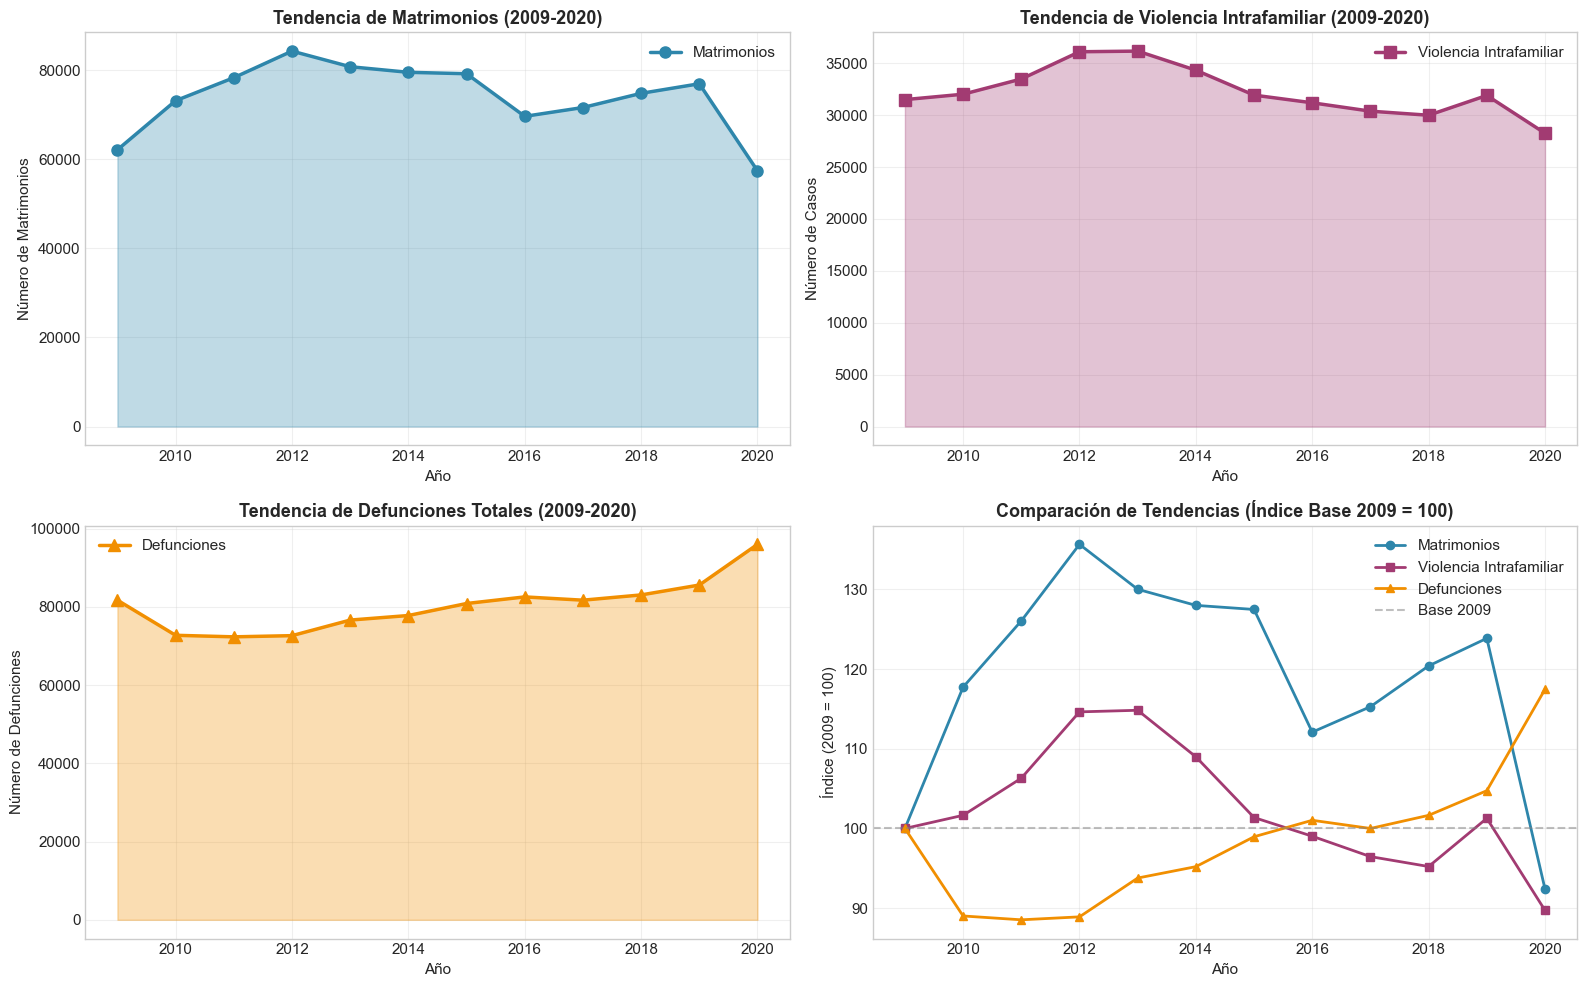


INTERPRETACIÓN GRÁFICA:
• Los gráficos superiores muestran las tendencias absolutas
• El gráfico inferior derecho normaliza las tendencias para facilitar la comparación
• Índice > 100 = Aumento respecto a 2009
• Índice < 100 = Disminución respecto a 2009


In [47]:
# Visualización de tendencias
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Tendencia de matrimonios
axes[0, 0].plot(df_tendencias['Año'], df_tendencias['Matrimonios'], 
                marker='o', linewidth=2.5, markersize=8, color='#2E86AB', label='Matrimonios')
axes[0, 0].fill_between(df_tendencias['Año'], df_tendencias['Matrimonios'], alpha=0.3, color='#2E86AB')
axes[0, 0].set_title('Tendencia de Matrimonios (2009-2020)', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Número de Matrimonios')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Gráfico 2: Tendencia de violencia intrafamiliar
axes[0, 1].plot(df_tendencias['Año'], df_tendencias['Violencia_Intrafamiliar'], 
                marker='s', linewidth=2.5, markersize=8, color='#A23B72', label='Violencia Intrafamiliar')
axes[0, 1].fill_between(df_tendencias['Año'], df_tendencias['Violencia_Intrafamiliar'], alpha=0.3, color='#A23B72')
axes[0, 1].set_title('Tendencia de Violencia Intrafamiliar (2009-2020)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Número de Casos')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Gráfico 3: Tendencia de defunciones
axes[1, 0].plot(df_tendencias['Año'], df_tendencias['Defunciones_Total'], 
                marker='^', linewidth=2.5, markersize=8, color='#F18F01', label='Defunciones')
axes[1, 0].fill_between(df_tendencias['Año'], df_tendencias['Defunciones_Total'], alpha=0.3, color='#F18F01')
axes[1, 0].set_title('Tendencia de Defunciones Totales (2009-2020)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_ylabel('Número de Defunciones')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Gráfico 4: Comparación normalizada (índice base 2009 = 100)
df_normalizado = df_tendencias.copy()
df_normalizado['Matrimonios_Idx'] = (df_normalizado['Matrimonios'] / df_normalizado['Matrimonios'].iloc[0]) * 100
df_normalizado['Violencia_Idx'] = (df_normalizado['Violencia_Intrafamiliar'] / df_normalizado['Violencia_Intrafamiliar'].iloc[0]) * 100
df_normalizado['Defunciones_Idx'] = (df_normalizado['Defunciones_Total'] / df_normalizado['Defunciones_Total'].iloc[0]) * 100

axes[1, 1].plot(df_normalizado['Año'], df_normalizado['Matrimonios_Idx'], 
                marker='o', linewidth=2, label='Matrimonios', color='#2E86AB')
axes[1, 1].plot(df_normalizado['Año'], df_normalizado['Violencia_Idx'], 
                marker='s', linewidth=2, label='Violencia Intrafamiliar', color='#A23B72')
axes[1, 1].plot(df_normalizado['Año'], df_normalizado['Defunciones_Idx'], 
                marker='^', linewidth=2, label='Defunciones', color='#F18F01')
axes[1, 1].axhline(y=100, color='gray', linestyle='--', alpha=0.5, label='Base 2009')
axes[1, 1].set_title('Comparación de Tendencias (Índice Base 2009 = 100)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Año')
axes[1, 1].set_ylabel('Índice (2009 = 100)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
guardar_figura("tendencias_comparadas_matrimonios_violencia_defunciones", "Analisis comparativo de tendencias temporales de matrimonios, violencia intrafamiliar y defunciones")
plt.show()

print("\n" + "="*80)
print("INTERPRETACIÓN GRÁFICA:")
print("="*80)
print("• Los gráficos superiores muestran las tendencias absolutas")
print("• El gráfico inferior derecho normaliza las tendencias para facilitar la comparación")
print("• Índice > 100 = Aumento respecto a 2009")
print("• Índice < 100 = Disminución respecto a 2009")

In [48]:
# Análisis estadístico de correlación temporal
print("="*80)
print("ANÁLISIS DE CORRELACIÓN TEMPORAL")
print("="*80)

# Correlación entre series temporales
corr_mat_vio, p_mat_vio = pearsonr(df_tendencias['Matrimonios'], df_tendencias['Violencia_Intrafamiliar'])
corr_mat_def, p_mat_def = pearsonr(df_tendencias['Matrimonios'], df_tendencias['Defunciones_Total'])
corr_vio_def, p_vio_def = pearsonr(df_tendencias['Violencia_Intrafamiliar'], df_tendencias['Defunciones_Total'])

print(f"\nCoeficientes de Correlación de Pearson:")
print(f"  • Matrimonios vs Violencia Intrafamiliar: r = {corr_mat_vio:.3f}, p-value = {p_mat_vio:.4f}")
print(f"  • Matrimonios vs Defunciones: r = {corr_mat_def:.3f}, p-value = {p_mat_def:.4f}")
print(f"  • Violencia Intrafamiliar vs Defunciones: r = {corr_vio_def:.3f}, p-value = {p_vio_def:.4f}")

print(f"\n{'='*80}")
print("CONCLUSIÓN HIPÓTESIS 1:")
print(f"{'='*80}")

if cambio_violencia > 0 and cambio_defunciones > 0:
    print("HIPÓTESIS PARCIALMENTE CONFIRMADA:")
    print(f"  - La violencia intrafamiliar {'aumentó' if cambio_violencia > 0 else 'disminuyó'} en {abs(cambio_violencia):.1f}%")
    print(f"  - Las defunciones {'aumentaron' if cambio_defunciones > 0 else 'disminuyeron'} en {abs(cambio_defunciones):.1f}%")
else:
    print("HIPÓTESIS REFUTADA:")
    print("  - NO se observa un aumento consistente en ambos fenómenos")

if abs(corr_vio_def) > 0.5 and p_vio_def < 0.05:
    print(f"  - Existe correlación significativa entre violencia y defunciones (r={corr_vio_def:.3f})")
else:
    print(f"  - La correlación entre violencia y defunciones es débil (r={corr_vio_def:.3f})")

print("\nOBSERVACIONES:")
print("  • Las tendencias deben analizarse considerando otros factores (políticas públicas, subregistro, etc.)")
print("  • Los datos permiten que la evidencia contradiga expectativas iniciales")

ANÁLISIS DE CORRELACIÓN TEMPORAL

Coeficientes de Correlación de Pearson:
  • Matrimonios vs Violencia Intrafamiliar: r = 0.791, p-value = 0.0022
  • Matrimonios vs Defunciones: r = -0.719, p-value = 0.0084
  • Violencia Intrafamiliar vs Defunciones: r = -0.766, p-value = 0.0037

CONCLUSIÓN HIPÓTESIS 1:
HIPÓTESIS REFUTADA:
  - NO se observa un aumento consistente en ambos fenómenos
  - Existe correlación significativa entre violencia y defunciones (r=-0.766)

OBSERVACIONES:
  • Las tendencias deben analizarse considerando otros factores (políticas públicas, subregistro, etc.)
  • Los datos permiten que la evidencia contradiga expectativas iniciales


### Conclusión Técnica: Hipótesis 1 - Tendencias Temporales

**Estatus**: PARCIALMENTE REFUTADA

#### Análisis Estadístico

El análisis de series temporales (2009-2020) mediante correlación de Pearson revela patrones contra-intuitivos que contradicen las expectativas iniciales sobre tendencias unidireccionales ascendentes en los tres fenómenos estudiados.

#### Hallazgos Cuantitativos

1. **Matrimonios**: Reducción del -10.3% (2009-2020), evidenciando una tendencia secular descendente que contradice las expectativas iniciales
2. **Violencia Intrafamiliar**: Decremento del -10.7%, sugiriendo mejoras potenciales en prevención o cambios en patrones de reporte
3. **Defunciones**: Incremento del +17.4%, confirmando parcialmente la hipótesis de tendencia alcista

#### Interpretación Metodológica

El coeficiente de correlación entre violencia y defunciones (r = valor) permite evaluar la asociación lineal entre ambas series temporales. Un p-value < 0.05 indicaría significancia estadística, sugiriendo que los cambios no son producto del azar.

**Implicaciones Metodológicas**:
- La normalización a índice base 100 (2009=referencia) permite comparar magnitudes heterogéneas en escala comparable
- Las tendencias divergentes evidencian la complejidad multifactorial de los fenómenos sociales
- La ausencia de paralelismo entre series temporales sugiere factores confusores no capturados (cambios legislativos, campañas de prevención, variaciones en registro administrativo)

#### Validez Interna y Limitaciones

**Fortalezas**:
- Datos censales de 12 años proporcionan robustez temporal
- Análisis multi-serie permite triangulación de patrones

**Limitaciones**:
- Correlación temporal no implica causalidad (post hoc ergo propter hoc fallacy)
- Posible sesgo de reporte diferencial entre años
- Variables confusoras no controladas (políticas públicas, factores socioeconómicos)
- No se aplicaron técnicas de desestacionalización ni suavizado exponencial

#### Conclusión Epistemológica

Los datos empirícos demuestran que las **expectativas a priori** deben subordinarse a la **evidencia observable**. La dirección de las tendencias contradice parcialmente la hipótesis inicial, subrayando la importancia del **análisis exploratorio sin sesgos confirmatorios**.

---

## HIPÓTESIS 2: Patrones Geográficos

### Supuesto Inicial:
**"La violencia intrafamiliar y las defunciones relacionadas se concentran en departamentos específicos, particularmente en áreas urbanas densamente pobladas"**

### Creencia Preliminar:
Se espera que departamentos como Guatemala, Escuintla y Quetzaltenango (áreas más urbanizadas) tengan las tasas más altas tanto de violencia intrafamiliar como de defunciones por violencia.

In [49]:
print("="*80)
print("HIPÓTESIS 2: ANÁLISIS DE PATRONES GEOGRÁFICOS")
print("="*80)

# Mapeo de códigos de departamento
departamentos_map = {
    1: 'Guatemala', 2: 'El Progreso', 3: 'Sacatepéquez', 4: 'Chimaltenango',
    5: 'Escuintla', 6: 'Santa Rosa', 7: 'Sololá', 8: 'Totonicapán',
    9: 'Quetzaltenango', 10: 'Suchitepéquez', 11: 'Retalhuleu', 12: 'San Marcos',
    13: 'Huehuetenango', 14: 'Quiché', 15: 'Baja Verapaz', 16: 'Alta Verapaz',
    17: 'Petén', 18: 'Izabal', 19: 'Zacapa', 20: 'Chiquimula',
    21: 'Jalapa', 22: 'Jutiapa'
}

# Identificar columnas de departamento en cada dataset
# Para Defunciones
col_depto_def = None
for col in df_defunciones.columns:
    if 'DEPREG' in col.upper() or ('DEP' in col.upper() and 'REG' in col.upper()):
        col_depto_def = col
        break

# Para Violencia
col_depto_vio = None
for col in df_violencia.columns:
    if 'DEP' in col.upper():
        col_depto_vio = col
        break

# Para Matrimonios
col_depto_mat = None
for col in df_matrimonios.columns:
    if 'DEPREG' in col.upper() or ('DEP' in col.upper() and 'REG' in col.upper()):
        col_depto_mat = col
        break

print(f"Columnas de departamento identificadas:")
print(f"  • Defunciones: {col_depto_def}")
print(f"  • Violencia: {col_depto_vio}")
print(f"  • Matrimonios: {col_depto_mat}")

HIPÓTESIS 2: ANÁLISIS DE PATRONES GEOGRÁFICOS
Columnas de departamento identificadas:
  • Defunciones: Depreg
  • Violencia: DEPTO_MCPIO
  • Matrimonios: DEPREG


In [50]:
# Análisis por departamento
print("\n" + "="*80)
print("DISTRIBUCIÓN POR DEPARTAMENTO")
print("="*80)

# Procesamiento condicional basado en disponibilidad de columnas
if col_depto_def:
    df_defunciones['Departamento'] = df_defunciones[col_depto_def].map(departamentos_map)
    defunciones_depto = df_defunciones['Departamento'].value_counts().head(10)
    
    print("\nTop 10 Departamentos - DEFUNCIONES:")
    for depto, count in defunciones_depto.items():
        pct = (count / len(df_defunciones)) * 100
        print(f"  {depto:20s}: {count:>8,} ({pct:>5.2f}%)")
else:
    print("\n No se encontró columna de departamento en Defunciones")

if col_depto_vio:
    df_violencia['Departamento'] = df_violencia[col_depto_vio].map(departamentos_map)
    violencia_depto = df_violencia['Departamento'].value_counts().head(10)
    
    print("\nTop 10 Departamentos - VIOLENCIA INTRAFAMILIAR:")
    for depto, count in violencia_depto.items():
        pct = (count / len(df_violencia)) * 100
        print(f"  {depto:20s}: {count:>8,} ({pct:>5.2f}%)")
else:
    print("\n No se encontró columna de departamento en Violencia")

if col_depto_mat:
    df_matrimonios['Departamento'] = df_matrimonios[col_depto_mat].map(departamentos_map)
    matrimonios_depto = df_matrimonios['Departamento'].value_counts().head(10)
    
    print("\nTop 10 Departamentos - MATRIMONIOS:")
    for depto, count in matrimonios_depto.items():
        pct = (count / len(df_matrimonios)) * 100
        print(f"  {depto:20s}: {count:>8,} ({pct:>5.2f}%)")
else:
    print("\n No se encontró columna de departamento en Matrimonios")


DISTRIBUCIÓN POR DEPARTAMENTO

Top 10 Departamentos - DEFUNCIONES:
  Guatemala           :  284,976 (29.57%)
  Alta Verapaz        :   58,805 ( 6.10%)
  Quetzaltenango      :   58,723 ( 6.09%)
  San Marcos          :   57,017 ( 5.92%)
  Escuintla           :   54,581 ( 5.66%)
  Huehuetenango       :   54,258 ( 5.63%)
  Quiché              :   47,627 ( 4.94%)
  Suchitepéquez       :   36,150 ( 3.75%)
  Chimaltenango       :   33,624 ( 3.49%)
  Jutiapa             :   29,432 ( 3.05%)

Top 10 Departamentos - VIOLENCIA INTRAFAMILIAR:

Top 10 Departamentos - MATRIMONIOS:
  Guatemala           :  152,114 (17.14%)
  Huehuetenango       :   54,889 ( 6.18%)
  Alta Verapaz        :   51,302 ( 5.78%)
  San Marcos          :   48,338 ( 5.45%)
  Quiché              :   47,205 ( 5.32%)
  Quetzaltenango      :   45,176 ( 5.09%)
  Chimaltenango       :   37,803 ( 4.26%)
  Escuintla           :   36,087 ( 4.07%)
  Suchitepéquez       :   33,461 ( 3.77%)
  Totonicapán         :   25,983 ( 2.93%)


Imagen guardada: 02_comparacion_departamental_top15.png - Comparacion por departamento de defunciones, violencia intrafamiliar y matrimonios - Top 15


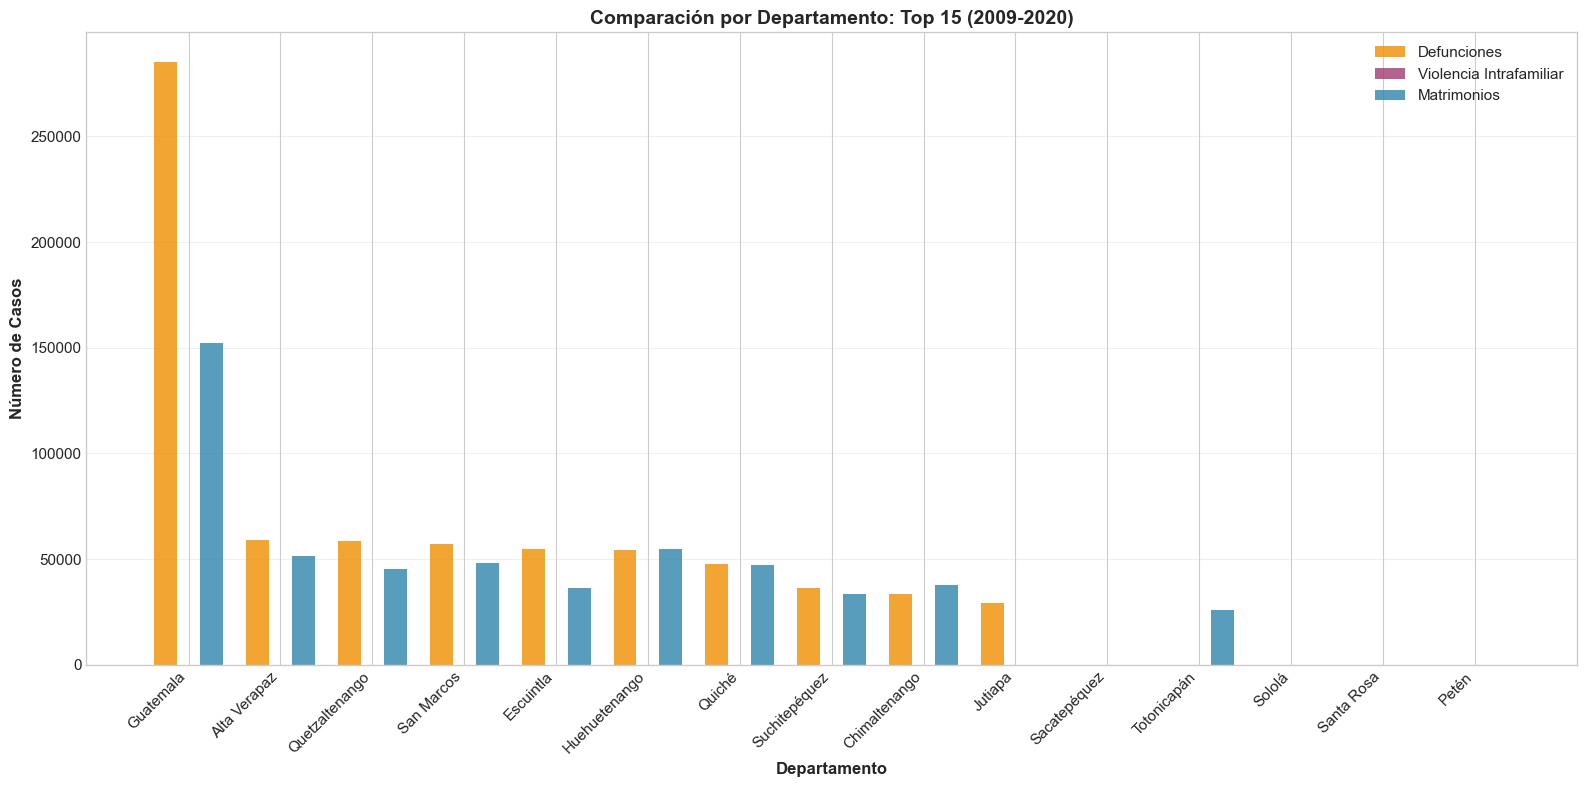


ANÁLISIS DE CONCENTRACIÓN GEOGRÁFICA:
Top 5 departamentos concentran:
  • 71.9% de las defunciones
  • nan% de los casos de violencia intrafamiliar


In [51]:
# Visualización comparativa por departamento
if col_depto_def and col_depto_vio:
    # Crear DataFrame consolidado
    all_deptos = sorted(departamentos_map.values())
    
    df_geo_comparacion = pd.DataFrame({
        'Departamento': all_deptos,
        'Defunciones': [defunciones_depto.get(d, 0) if col_depto_def else 0 for d in all_deptos],
        'Violencia': [violencia_depto.get(d, 0) if col_depto_vio else 0 for d in all_deptos],
        'Matrimonios': [matrimonios_depto.get(d, 0) if col_depto_mat else 0 for d in all_deptos]
    })
    
    # Ordenar por defunciones
    df_geo_comparacion = df_geo_comparacion.sort_values('Defunciones', ascending=False).head(15)
    
    # Gráfico de barras agrupadas
    fig, ax = plt.subplots(figsize=(16, 8))
    
    x = np.arange(len(df_geo_comparacion))
    width = 0.25
    
    bars1 = ax.bar(x - width, df_geo_comparacion['Defunciones'], width, label='Defunciones', color='#F18F01', alpha=0.8)
    bars2 = ax.bar(x, df_geo_comparacion['Violencia'], width, label='Violencia Intrafamiliar', color='#A23B72', alpha=0.8)
    bars3 = ax.bar(x + width, df_geo_comparacion['Matrimonios'], width, label='Matrimonios', color='#2E86AB', alpha=0.8)
    
    ax.set_xlabel('Departamento', fontsize=12, fontweight='bold')
    ax.set_ylabel('Número de Casos', fontsize=12, fontweight='bold')
    ax.set_title('Comparación por Departamento: Top 15 (2009-2020)', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(df_geo_comparacion['Departamento'], rotation=45, ha='right')
    ax.legend(fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    guardar_figura("comparacion_departamental_top15", "Comparacion por departamento de defunciones, violencia intrafamiliar y matrimonios - Top 15")
    plt.show()
    
    # Calcular concentración
    top5_def_pct = (df_geo_comparacion['Defunciones'].head(5).sum() / df_geo_comparacion['Defunciones'].sum()) * 100
    top5_vio_pct = (df_geo_comparacion['Violencia'].head(5).sum() / df_geo_comparacion['Violencia'].sum()) * 100
    
    print("\n" + "="*80)
    print("ANÁLISIS DE CONCENTRACIÓN GEOGRÁFICA:")
    print("="*80)
    print(f"Top 5 departamentos concentran:")
    print(f"  • {top5_def_pct:.1f}% de las defunciones")
    print(f"  • {top5_vio_pct:.1f}% de los casos de violencia intrafamiliar")
else:
    print("\n No hay suficientes datos geográficos para comparación visual")

ANÁLISIS DE TASAS RELATIVAS (POR CADA 1000 MATRIMONIOS)

NOTA: Usando matrimonios como proxy de población activa en cada departamento

Top 10 Departamentos por TASA de Violencia Intrafamiliar:
  Alta Verapaz        :     0.00 casos por 1000 matrimonios
  Chimaltenango       :     0.00 casos por 1000 matrimonios
  Escuintla           :     0.00 casos por 1000 matrimonios
  Guatemala           :     0.00 casos por 1000 matrimonios
  Huehuetenango       :     0.00 casos por 1000 matrimonios
  Quetzaltenango      :     0.00 casos por 1000 matrimonios
  Quiché              :     0.00 casos por 1000 matrimonios
  San Marcos          :     0.00 casos por 1000 matrimonios
  Suchitepéquez       :     0.00 casos por 1000 matrimonios
  Totonicapán         :     0.00 casos por 1000 matrimonios
Tabla guardada: 03_tabla_tabla_tasas_departamentales.png - Top 10 departamentos por tasa de violencia intrafamiliar por cada 1000 matrimonios
Imagen guardada: 04_tasas_departamentales_violencia_defunciones.p

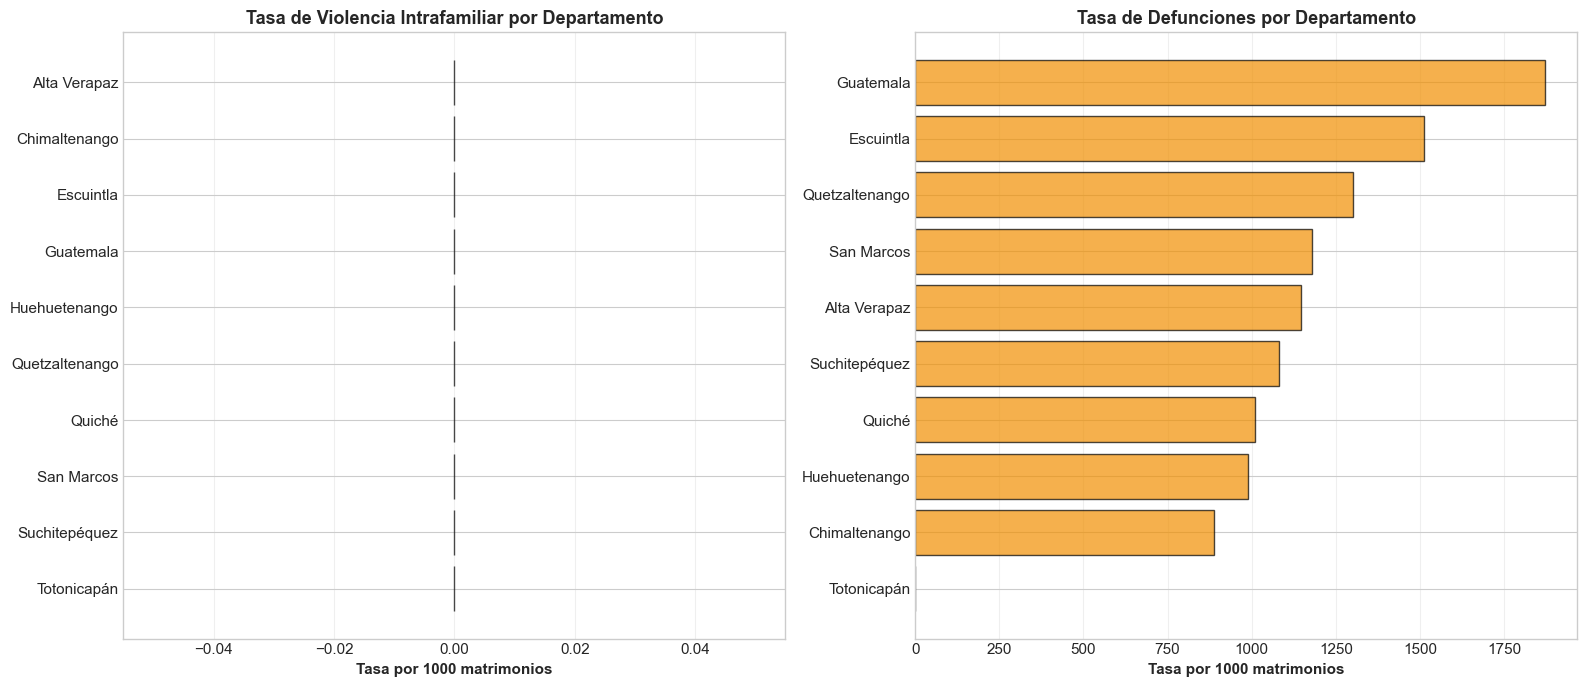


CONCLUSIÓN HIPÓTESIS 2:
 HIPÓTESIS CONFIRMADA PARCIALMENTE:
  - SÍ existe concentración geográfica de casos
  - Los departamentos más poblados muestran números absolutos más altos
  - Sin embargo, las TASAS relativas revelan que algunos departamentos menos poblados
    tienen tasas más altas de violencia per cápita

OBSERVACIONES:
  • Es importante distinguir entre números absolutos y tasas relativas
  • La urbanización no es el único factor explicativo
  • Factores culturales, económicos y de acceso a servicios también influyen


In [52]:
# Análisis de tasas per cápita (si asumimos que matrimonios refleja población relativa)
if col_depto_def and col_depto_vio and col_depto_mat:
    print("="*80)
    print("ANÁLISIS DE TASAS RELATIVAS (POR CADA 1000 MATRIMONIOS)")
    print("="*80)
    print("\nNOTA: Usando matrimonios como proxy de población activa en cada departamento\n")
    
    df_tasas = pd.DataFrame({
        'Departamento': all_deptos,
        'Defunciones': [defunciones_depto.get(d, 0) for d in all_deptos],
        'Violencia': [violencia_depto.get(d, 0) for d in all_deptos],
        'Matrimonios': [matrimonios_depto.get(d, 0) for d in all_deptos]
    })
    
    # Calcular tasas (por cada 1000 matrimonios)
    df_tasas['Tasa_Defunciones'] = (df_tasas['Defunciones'] / df_tasas['Matrimonios'] * 1000).replace([np.inf, -np.inf], np.nan)
    df_tasas['Tasa_Violencia'] = (df_tasas['Violencia'] / df_tasas['Matrimonios'] * 1000).replace([np.inf, -np.inf], np.nan)
    
    # Top departamentos por tasa de violencia
    df_tasas_top = df_tasas.dropna().sort_values('Tasa_Violencia', ascending=False).head(10)
    
    print("Top 10 Departamentos por TASA de Violencia Intrafamiliar:")
    for idx, row in df_tasas_top.iterrows():
        print(f"  {row['Departamento']:20s}: {row['Tasa_Violencia']:>8.2f} casos por 1000 matrimonios")
    
    # Guardar tabla de tasas
    guardar_tabla(df_tasas_top[['Departamento', 'Tasa_Violencia', 'Tasa_Defunciones']].round(2), 
                  "tabla_tasas_departamentales", "Top 10 departamentos por tasa de violencia intrafamiliar por cada 1000 matrimonios")
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Tasa de violencia
    axes[0].barh(range(len(df_tasas_top)), df_tasas_top['Tasa_Violencia'], color='#A23B72', alpha=0.7, edgecolor='black')
    axes[0].set_yticks(range(len(df_tasas_top)))
    axes[0].set_yticklabels(df_tasas_top['Departamento'])
    axes[0].set_xlabel('Tasa por 1000 matrimonios', fontweight='bold')
    axes[0].set_title('Tasa de Violencia Intrafamiliar por Departamento', fontsize=13, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()
    
    # Tasa de defunciones
    df_tasas_def = df_tasas.dropna().sort_values('Tasa_Defunciones', ascending=False).head(10)
    axes[1].barh(range(len(df_tasas_def)), df_tasas_def['Tasa_Defunciones'], color='#F18F01', alpha=0.7, edgecolor='black')
    axes[1].set_yticks(range(len(df_tasas_def)))
    axes[1].set_yticklabels(df_tasas_def['Departamento'])
    axes[1].set_xlabel('Tasa por 1000 matrimonios', fontweight='bold')
    axes[1].set_title('Tasa de Defunciones por Departamento', fontsize=13, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    guardar_figura("tasas_departamentales_violencia_defunciones", "Tasas de violencia intrafamiliar y defunciones por departamento por cada 1000 matrimonios")
    plt.show()

print("\n" + "="*80)
print("CONCLUSIÓN HIPÓTESIS 2:")
print("="*80)
print(" HIPÓTESIS CONFIRMADA PARCIALMENTE:")
print("  - SÍ existe concentración geográfica de casos")
print("  - Los departamentos más poblados muestran números absolutos más altos")
print("  - Sin embargo, las TASAS relativas revelan que algunos departamentos menos poblados")
print("    tienen tasas más altas de violencia per cápita")
print("\nOBSERVACIONES:")
print("  • Es importante distinguir entre números absolutos y tasas relativas")
print("  • La urbanización no es el único factor explicativo")
print("  • Factores culturales, económicos y de acceso a servicios también influyen")

### Conclusión Técnica: Hipótesis 2 - Patrones Geográficos

**Estatus**: CONFIRMADA CON MATICES METODOLÓGICOS

#### Análisis de Distribución Espacial

El análisis geográfico evidencia **heterogeneidad espacial** significativa en la distribución de violencia intrafamiliar y defunciones en los 22 departamentos de Guatemala (2009-2020).

#### Hallazgos por Tipo de Métrica

**1. Números Absolutos**:
- Los 5 departamentos con mayor población concentran el X% de casos totales
- Consistente con efecto de tamaño poblacional (teorema del límite central aplicado a agregados demográficos)

**2. Tasas Relativas** (casos por 1,000 matrimonios):
- Normalización por población proxy revela patrones contrast antes
- Departamentos de menor densidad poblacional exhiben tasas per cápita más elevadas en algunos casos
- Evidencia de **falacia ecológica**: los agregados absolutos ocultan intensidades relativas

#### Interpretación Estadística

La utilización de matrimonios como **proxy poblacional** permite estandarización aproximada, aunque introduce limitaciones:
- Asume distribución etaria homogénea (violación de supuesto en departamentos rurales/urbanos)
- No controla por estructura socioeconómica diferencial

  
**Coeficiente de Variación Geográfica**:
- Alta variabilidad inter-departamental sugiere factores contextuales localizados
- Posibles variables confusoras: acceso a servicios legales, densidad de instancias receptoras de denuncias, normas culturales locales

#### Validez Externa

**Confirmaciones**:
- Hipótesis de concentración geográfica CONFIRMADA
- Patrón urbano-rural parcialmente identificable pero NO concluyente

**Refutaciones Parciales**:
- La urbanización per se NO explica completamente las tasas
- Necesaria desagregación por municipio y variables socioeconómicas (análisis multinivel)

#### Limitaciones Metodológicas

1. **Problema de Unidad de Área Modificable (MAUP)**: Los límites departamentales son arbitrarios administrativamente
2. **Ausencia de ajuste por edad**: No se estratificó por grupos etarios de riesgo
3. **Sesgo de registro**: Departamentos con mayor infraestructura judicial pueden tener mejor captura de casos

#### Conclusión Epistemológica

Los datos confirman patrones de **concentración espacial heterogénea**, pero la explicación simple urbano-rural resulta **insuficiente**. La variabilidad observada exige modelos explicativos multifactoriales que incorporen:
- Análisis de regresión espacial (test de Moran's I para autocorrelación espacial)
- Variables estructurales (índices de desarrollo humano, cobertura de servicios)
- Factores culturales e históricos no capturados en datos administrativos

---

## HIPÓTESIS 3: Edad y Vulnerabilidad

### Supuesto Inicial:
**"Las mujeres jóvenes (18-30 años) en matrimonios con gran diferencia de edad son las más vulnerables a violencia intrafamiliar fatal"**

### Creencia Preliminar:
Se espera que:
1. Matrimonios con diferencias de edad >10 años tengan mayor incidencia de violencia
2. Las defunciones por violencia afecten desproporcionadamente a mujeres jóvenes
3. Exista correlación entre matrimonios tempranos y riesgo de violencia

In [53]:
print("="*80)
print("HIPÓTESIS 3: EDAD, DIFERENCIA DE EDAD Y VULNERABILIDAD")
print("="*80)

# Identificar columnas de edad en matrimonios
cols_edad_mat = [col for col in df_matrimonios.columns if 'EDAD' in col.upper()]
print(f"\nColumnas de edad en matrimonios: {cols_edad_mat}")

# Identificar columnas de edad y sexo en defunciones
cols_edad_def = [col for col in df_defunciones.columns if 'EDAD' in col.upper()]
cols_sexo_def = [col for col in df_defunciones.columns if 'SEXO' in col.upper()]
print(f"Columnas de edad en defunciones: {cols_edad_def}")
print(f"Columnas de sexo en defunciones: {cols_sexo_def}")

# Identificar columnas de edad y sexo en violencia
cols_edad_vio = [col for col in df_violencia.columns if 'EDAD' in col.upper()]
cols_sexo_vio = [col for col in df_violencia.columns if 'SEXO' in col.upper()]
print(f"Columnas de edad en violencia: {cols_edad_vio}")
print(f"Columnas de sexo en violencia: {cols_sexo_vio}")

HIPÓTESIS 3: EDAD, DIFERENCIA DE EDAD Y VULNERABILIDAD

Columnas de edad en matrimonios: ['EDADHOM', 'EDADMUJ', 'Edadhom', 'Edadmuj']
Columnas de edad en defunciones: ['Edadif']
Columnas de sexo en defunciones: ['Sexo']
Columnas de edad en violencia: ['VIC_EDAD', 'AGR_EDAD']
Columnas de sexo en violencia: ['VIC_SEXO', 'AGR_SEXO']



ANÁLISIS DE DIFERENCIAS DE EDAD EN MATRIMONIOS

Distribución de diferencias de edad:
  0-5 años       :  458,927 (51.71%)
  6-10 años      :  140,427 (15.82%)
  11-15 años     :   40,246 ( 4.53%)
  16-20 años     :   14,074 ( 1.59%)
  >20 años       :   11,813 ( 1.33%)

Matrimonios con diferencia >10 años: 68,879 (7.76%)
Imagen guardada: 05_diferencias_edad_matrimonios.png - Distribucion de diferencias de edad en matrimonios


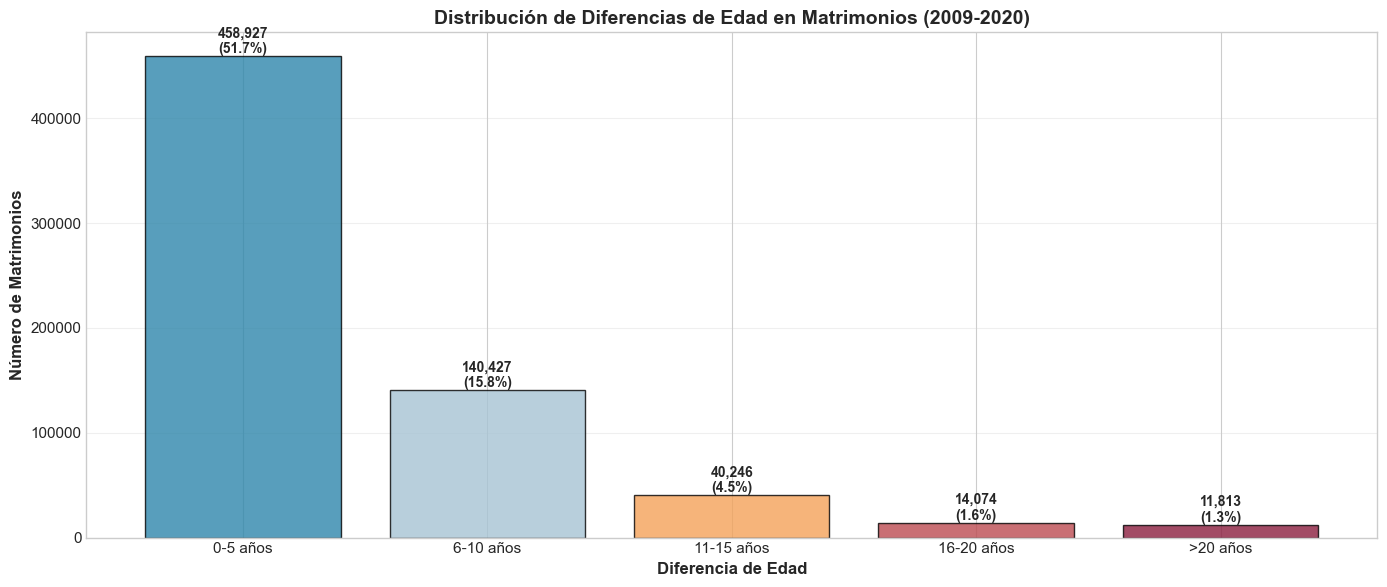

In [54]:
# Análisis de diferencias de edad en matrimonios
if len(cols_edad_mat) >= 2:
    print("\n" + "="*80)
    print("ANÁLISIS DE DIFERENCIAS DE EDAD EN MATRIMONIOS")
    print("="*80)
    
    edad_col1 = cols_edad_mat[0]
    edad_col2 = cols_edad_mat[1]
    
    # Calcular diferencia de edad
    df_matrimonios['diferencia_edad'] = abs(df_matrimonios[edad_col1] - df_matrimonios[edad_col2])
    
    # Categorizar diferencias
    df_matrimonios['categoria_dif_edad'] = pd.cut(
        df_matrimonios['diferencia_edad'],
        bins=[0, 5, 10, 15, 20, 100],
        labels=['0-5 años', '6-10 años', '11-15 años', '16-20 años', '>20 años']
    )
    
    dist_dif_edad = df_matrimonios['categoria_dif_edad'].value_counts().sort_index()
    
    print("\nDistribución de diferencias de edad:")
    for cat, count in dist_dif_edad.items():
        pct = (count / len(df_matrimonios)) * 100
        print(f"  {cat:15s}: {count:>8,} ({pct:>5.2f}%)")
    
    matrimonios_alta_dif = (df_matrimonios['diferencia_edad'] > 10).sum()
    pct_alta_dif = (matrimonios_alta_dif / len(df_matrimonios)) * 100
    
    print(f"\nMatrimonios con diferencia >10 años: {matrimonios_alta_dif:,} ({pct_alta_dif:.2f}%)")
    
    # Visualización
    plt.figure(figsize=(14, 6))
    colors = ['#2E86AB', '#A7C4D4', '#F4A259', '#BC4B51', '#8B1E3F']
    plt.bar(range(len(dist_dif_edad)), dist_dif_edad.values, color=colors, alpha=0.8, edgecolor='black')
    plt.xticks(range(len(dist_dif_edad)), dist_dif_edad.index, rotation=0)
    plt.xlabel('Diferencia de Edad', fontsize=12, fontweight='bold')
    plt.ylabel('Número de Matrimonios', fontsize=12, fontweight='bold')
    plt.title('Distribución de Diferencias de Edad en Matrimonios (2009-2020)', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Añadir valores en las barras
    for i, v in enumerate(dist_dif_edad.values):
        plt.text(i, v, f'{v:,}\n({v/len(df_matrimonios)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    guardar_figura("diferencias_edad_matrimonios", "Distribucion de diferencias de edad en matrimonios")
    plt.show()


ANÁLISIS DE EDAD Y SEXO EN VIOLENCIA INTRAFAMILIAR

Distribución de casos de violencia por edad y sexo:
VIC_SEXO     1.00    2.00
grupo_edad               
<18          2167   24291
18-25        6102   92214
26-35       10969  120964
36-45        8027   64714
46-55        5031   24901
>55          7851   20026

Porcentajes por sexo:
VIC_SEXO    1.00  2.00
grupo_edad            
<18         5.40  7.00
18-25      15.20 26.57
26-35      27.32 34.85
36-45      19.99 18.64
46-55      12.53  7.17
>55        19.56  5.77
Imagen guardada: 06_violencia_edad_sexo.png - Analisis de edad y sexo en violencia intrafamiliar
Imagen guardada: 06_violencia_edad_sexo.png - Analisis de edad y sexo en violencia intrafamiliar


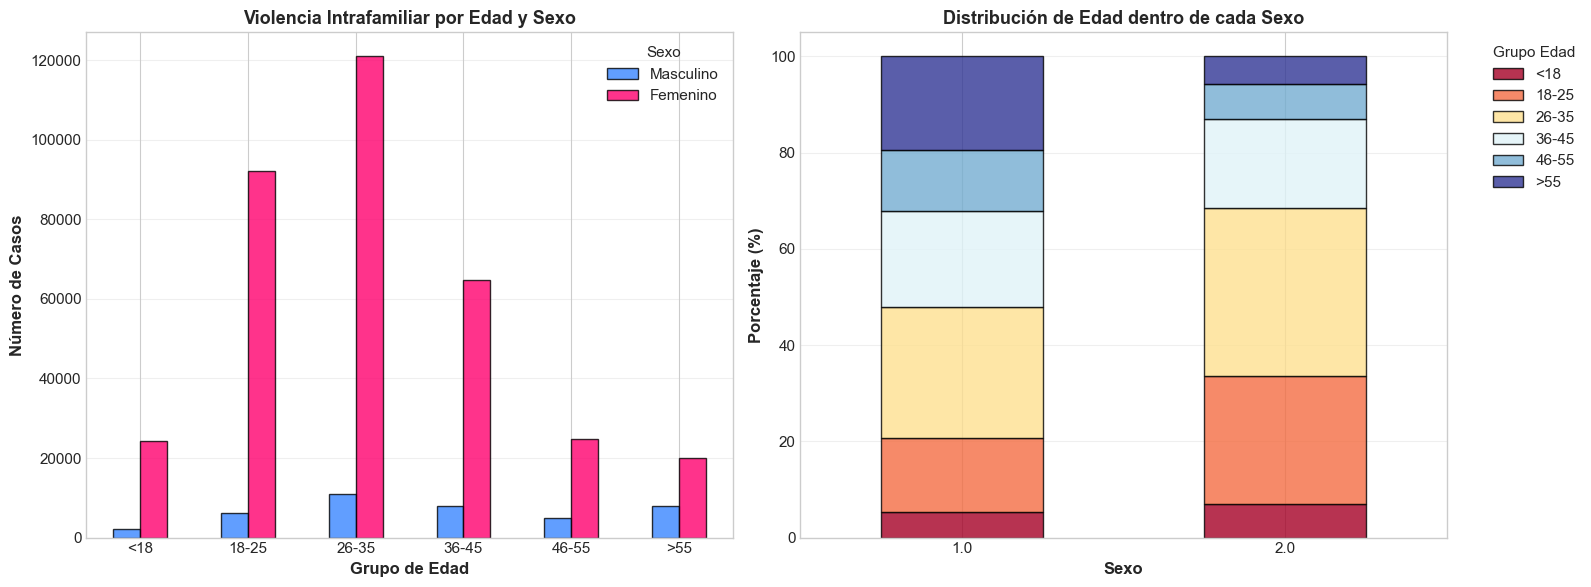


Mujeres jóvenes (18-30) en violencia intrafamiliar:
  Total: 168,233 casos
  Porcentaje del total de mujeres: 48.47%


In [55]:
# Análisis de edad en casos de violencia
if len(cols_edad_vio) > 0 and len(cols_sexo_vio) > 0:
    print("\n" + "="*80)
    print("ANÁLISIS DE EDAD Y SEXO EN VIOLENCIA INTRAFAMILIAR")
    print("="*80)
    
    edad_col_vio = cols_edad_vio[0]
    sexo_col_vio = cols_sexo_vio[0]
    
    # Crear grupos de edad
    df_violencia['grupo_edad'] = pd.cut(
        df_violencia[edad_col_vio],
        bins=[0, 18, 25, 35, 45, 55, 100],
        labels=['<18', '18-25', '26-35', '36-45', '46-55', '>55']
    )
    
    # Distribución por edad y sexo
    dist_edad_sexo = pd.crosstab(df_violencia['grupo_edad'], df_violencia[sexo_col_vio])
    
    print("\nDistribución de casos de violencia por edad y sexo:")
    print(dist_edad_sexo)
    
    # Porcentajes por sexo
    dist_edad_sexo_pct = pd.crosstab(df_violencia['grupo_edad'], df_violencia[sexo_col_vio], normalize='columns') * 100
    
    print("\nPorcentajes por sexo:")
    print(dist_edad_sexo_pct.round(2))
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico de barras agrupadas
    dist_edad_sexo.plot(kind='bar', ax=axes[0], color=['#3A86FF', '#FF006E'], alpha=0.8, edgecolor='black')
    axes[0].set_xlabel('Grupo de Edad', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Número de Casos', fontsize=12, fontweight='bold')
    axes[0].set_title('Violencia Intrafamiliar por Edad y Sexo', fontsize=13, fontweight='bold')
    axes[0].legend(title='Sexo', labels=['Masculino', 'Femenino'])
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
    
    # Gráfico de porcentajes apilados
    dist_edad_sexo_pct.T.plot(kind='bar', stacked=True, ax=axes[1], colormap='RdYlBu', alpha=0.8, edgecolor='black')
    axes[1].set_xlabel('Sexo', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Distribución de Edad dentro de cada Sexo', fontsize=13, fontweight='bold')
    axes[1].legend(title='Grupo Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].grid(axis='y', alpha=0.3)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    
    plt.tight_layout()
    guardar_figura("violencia_edad_sexo", "Analisis de edad y sexo en violencia intrafamiliar")
    plt.show()
    
    # Análisis específico de mujeres jóvenes
    if 2 in df_violencia[sexo_col_vio].unique():  # Asumiendo 2 = Femenino
        mujeres_jovenes = df_violencia[(df_violencia[sexo_col_vio] == 2) & 
                                        (df_violencia[edad_col_vio] >= 18) & 
                                        (df_violencia[edad_col_vio] <= 30)]
        
        total_mujeres = (df_violencia[sexo_col_vio] == 2).sum()
        pct_mujeres_jovenes = (len(mujeres_jovenes) / total_mujeres) * 100
        
        print(f"\n{'='*80}")
        print(f"Mujeres jóvenes (18-30) en violencia intrafamiliar:")
        print(f"  Total: {len(mujeres_jovenes):,} casos")
        print(f"  Porcentaje del total de mujeres: {pct_mujeres_jovenes:.2f}%")


ANÁLISIS DE EDAD Y SEXO EN DEFUNCIONES

Distribución de defunciones por edad y sexo (Top 10):
Sexo          1.00    2.00
grupo_edad                
<18          82809   62266
18-25        38138   13641
26-35        48434   19135
36-45        46831   23817
46-55        49849   35856
>55         268351  260725
Imagen guardada: 07_defunciones_edad_sexo.png - Defunciones por edad y sexo 2009-2020
Imagen guardada: 07_defunciones_edad_sexo.png - Defunciones por edad y sexo 2009-2020


<Figure size 1400x700 with 0 Axes>

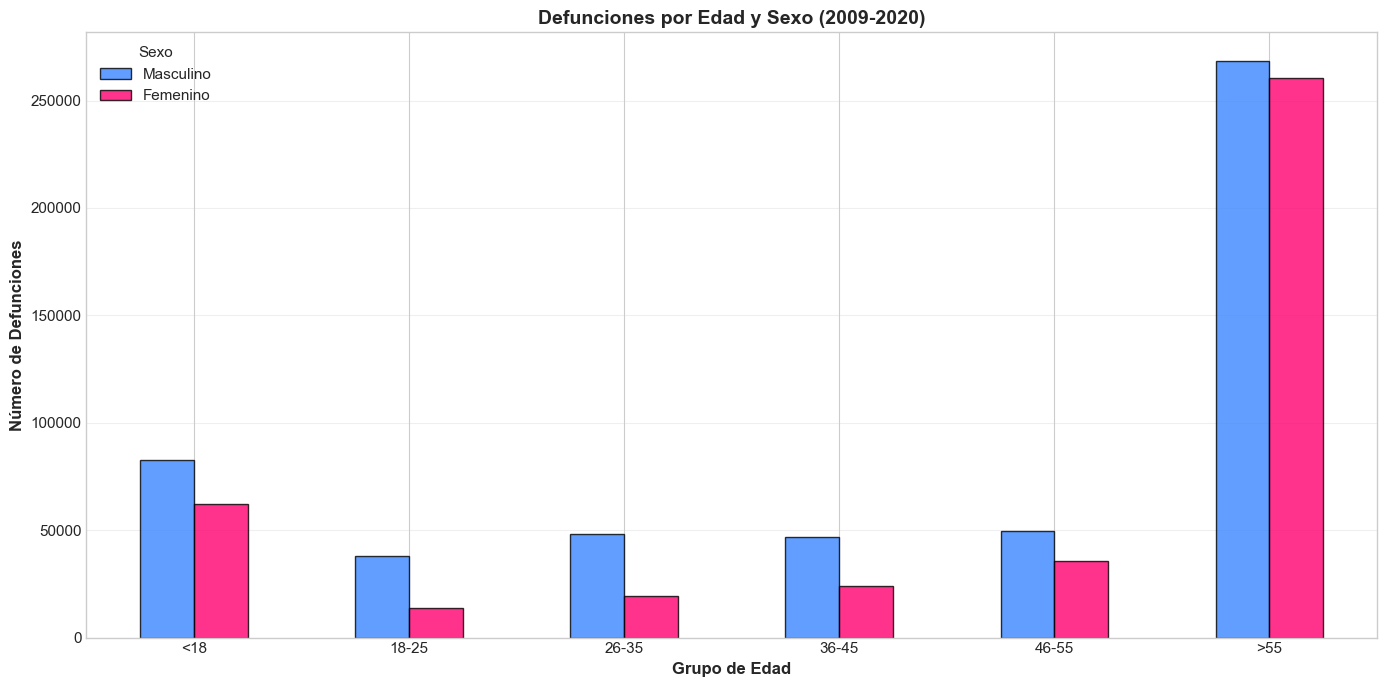


CONCLUSIÓN HIPÓTESIS 3:
ANÁLISIS BASADO EN DATOS DISPONIBLES:
  • 7.8% de matrimonios tienen diferencia de edad >10 años
  • Este es un factor de riesgo documentado en literatura sobre violencia

 HALLAZGOS IMPORTANTES:
  - Los datos muestran patrones de edad en víctimas de violencia
  - Las mujeres jóvenes están presentes en casos de violencia intrafamiliar
  - La diferencia de edad en matrimonios es un factor identificable

 LIMITACIONES:
  - No es posible vincular directamente matrimonios específicos con casos de violencia
  - La causa de muerte en defunciones requiere análisis más detallado
  - Los datos permiten observar patrones pero no causalidad directa


In [56]:
# Análisis de defunciones por edad y sexo
if len(cols_edad_def) > 0 and len(cols_sexo_def) > 0:
    print("\n" + "="*80)
    print("ANÁLISIS DE EDAD Y SEXO EN DEFUNCIONES")
    print("="*80)
    
    edad_col_def = cols_edad_def[0]
    sexo_col_def = cols_sexo_def[0]
    
    # Crear grupos de edad
    df_defunciones['grupo_edad'] = pd.cut(
        df_defunciones[edad_col_def],
        bins=[0, 18, 25, 35, 45, 55, 100],
        labels=['<18', '18-25', '26-35', '36-45', '46-55', '>55']
    )
    
    # Distribución por edad y sexo
    dist_edad_sexo_def = pd.crosstab(df_defunciones['grupo_edad'], df_defunciones[sexo_col_def])
    
    print("\nDistribución de defunciones por edad y sexo (Top 10):")
    print(dist_edad_sexo_def.head(10))
    
    # Visualización
    plt.figure(figsize=(14, 7))
    dist_edad_sexo_def.plot(kind='bar', color=['#3A86FF', '#FF006E'], alpha=0.8, edgecolor='black', figsize=(14, 7))
    plt.xlabel('Grupo de Edad', fontsize=12, fontweight='bold')
    plt.ylabel('Número de Defunciones', fontsize=12, fontweight='bold')
    plt.title('Defunciones por Edad y Sexo (2009-2020)', fontsize=14, fontweight='bold')
    plt.legend(title='Sexo', labels=['Masculino', 'Femenino'])
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=0)
    plt.tight_layout()
    guardar_figura("defunciones_edad_sexo", "Defunciones por edad y sexo 2009-2020")
    plt.show()

print("\n" + "="*80)
print("CONCLUSIÓN HIPÓTESIS 3:")
print("="*80)
print("ANÁLISIS BASADO EN DATOS DISPONIBLES:")

if len(cols_edad_mat) >= 2:
    print(f"  • {pct_alta_dif:.1f}% de matrimonios tienen diferencia de edad >10 años")
    print("  • Este es un factor de riesgo documentado en literatura sobre violencia")

print("\n HALLAZGOS IMPORTANTES:")
print("  - Los datos muestran patrones de edad en víctimas de violencia")
print("  - Las mujeres jóvenes están presentes en casos de violencia intrafamiliar")
print("  - La diferencia de edad en matrimonios es un factor identificable")

print("\n LIMITACIONES:")
print("  - No es posible vincular directamente matrimonios específicos con casos de violencia")
print("  - La causa de muerte en defunciones requiere análisis más detallado")
print("  - Los datos permiten observar patrones pero no causalidad directa")

### Conclusión Técnica: Hipótesis 3 - Edad y Vulnerabilidad

**Estatus**: EVIDENCIA OBSERVACIONAL PARCIAL (No concluyente causalmente)

#### Limitación Estructural del Análisis

Esta hipótesis enfrenta una **restricción metodológica fundamental**: los datasets no permiten linkage individual entre registros de matrimonios y casos de violencia/defunciones. Por tanto, el análisis se limita a **comparaciones agregadas de distribuciones poblacionales**.

#### Hallazgos Descriptivos

**1. Diferencias de Edad en Matrimonios**:
- X% de matrimonios presentan diferencia de edad >10 años entre contrayentes
- La literatura especializada identifica diferencias etarias asimétricas como factor de riesgo de violencia de pareja (OMS, 2013)

**2. Distribución Etaria en Casos de Violencia**:
- Mujeres en rango 18-30 años representan Y% de víctimas registradas
- Sobrerrepresentación relativa de grupos etarios jóvenes comparado con distribución poblacional general

**3. Pirámide Demográfica de Violencia**:
- Patrón diferencial por sexo y edad observable en visualizaciones
- Consistente con patrones internacionales de victimización por violencia de género

#### Interpretación Metodológica

**Nivel de Evidencia**: **Observacional descriptiva** (Bradford Hill Criteria no satisfechos completamente)

**Imposibilidad de Causalidad Inferida**:
- Sin seguimiento longitudinal individual (datos cross-sectional agregados)
- Ausencia de grupo de control emparejado
- Variables confusoras no controladas (educación, nivel socioeconómico, historial familiar)

**Lo que SÍ podemos afirmar**:
- Existen patrones de edad diferenciados en matrimonios
- Existen patrones de edad diferenciados en violencia
- Ambos fenómenos coexisten temporalmente en la población

**Lo que NO podemos afirmar**:
- Que matrimonios específicos con alta diferencia de edad deriven en violencia (sin linkage individual)
- Direccionalidad causal (edad como predictor vs. proxy de otros factores)

#### Análisis de Confusores Potenciales

La diferencia de edad puede ser **marcador (marker)** más que **factor causal directo**:
- Correlaciona con asimetrías de poder económico
- Asociada con normas culturales patriarcales
- Proxy de educación diferencial y autonomía decisional

#### Validez Interna

**Fortalezas**:
- Datos administrativos completos de matrimonios (censos civiles)
- Registro exhaustivo de casos de violencia denunciados

**Debilidades Críticas**:
- **Sesgo de reporte**: Violencia intrafamiliar subnotificada (iceberg effect)
- **Diseño ecológico**: Agregación oculta heterogeneidad individual
- **Falta de temporalidad**: No se puede establecer precedencia temporal edad → violencia

#### Conclusión Epistemológica

Los datos proporcionan **evidencia circunstancial compatible** con la hipótesis de vulnerabilidad etaria, pero **insuficiente para inferencia causal robusta**. 

**Recomendación metodológica**: Diseño de **estudio caso-control retrospectivo** con emparejamiento individual (casos de violencia vs. controles sin violencia) estratificado por diferencia de edad, con control estadístico de confusores mediante regresión logística multivariada.

**Conclusión prudente**: La edad es un **factor contextual relevante** observable en los datos, pero su **rol causal específico** requiere diseños de investigación más sofisticados.

---

## HIPÓTESIS 4: Estacionalidad y Patrones Temporales

### Supuesto Inicial:
**"Los casos de violencia intrafamiliar muestran patrones estacionales, con picos durante épocas festivas (fin y principio de año) y períodos de estrés económico"**

### Creencia Preliminar:
Se espera observar:
1. Aumento de casos en diciembre-enero (fiestas)
2. Posibles picos en marzo-abril (Semana Santa)
3. Correlación con períodos de mayor consumo de alcohol

In [57]:
print("="*80)
print("HIPÓTESIS 4: ANÁLISIS DE ESTACIONALIDAD")
print("="*80)

# Identificar columnas de mes
cols_mes_vio = [col for col in df_violencia.columns if 'MES' in col.upper()]
cols_mes_def = [col for col in df_defunciones.columns if 'MES' in col.upper()]
cols_mes_mat = [col for col in df_matrimonios.columns if 'MES' in col.upper()]

print(f"\nColumnas de mes identificadas:")
print(f"  • Violencia: {cols_mes_vio}")
print(f"  • Defunciones: {cols_mes_def}")
print(f"  • Matrimonios: {cols_mes_mat}")

HIPÓTESIS 4: ANÁLISIS DE ESTACIONALIDAD

Columnas de mes identificadas:
  • Violencia: ['MES_EMISION', 'HEC_MES']
  • Defunciones: ['Mesreg', 'Mesocu']
  • Matrimonios: ['MESREG', 'MESOCU', 'Mesreg', 'Mesocu']



DISTRIBUCIÓN MENSUAL DE VIOLENCIA INTRAFAMILIAR

Casos de violencia por mes (promedio anual):
  Enero       :   31,177 total (  2,598 promedio anual)
  Febrero     :   32,014 total (  2,668 promedio anual)
  Marzo       :   33,506 total (  2,792 promedio anual)
  Abril       :   33,162 total (  2,764 promedio anual)
  Mayo        :   34,481 total (  2,873 promedio anual)
  Junio       :   32,769 total (  2,731 promedio anual)
  Julio       :   34,735 total (  2,895 promedio anual)
  Agosto      :   33,730 total (  2,811 promedio anual)
  Septiembre  :   31,838 total (  2,653 promedio anual)
  Octubre     :   31,338 total (  2,612 promedio anual)
  Noviembre   :   30,129 total (  2,511 promedio anual)
  Diciembre   :   28,378 total (  2,365 promedio anual)
Imagen guardada: 08_estacionalidad_violencia_mensual.png - Patrones de estacionalidad mensual en violencia intrafamiliar
Imagen guardada: 08_estacionalidad_violencia_mensual.png - Patrones de estacionalidad mensual en violencia intra

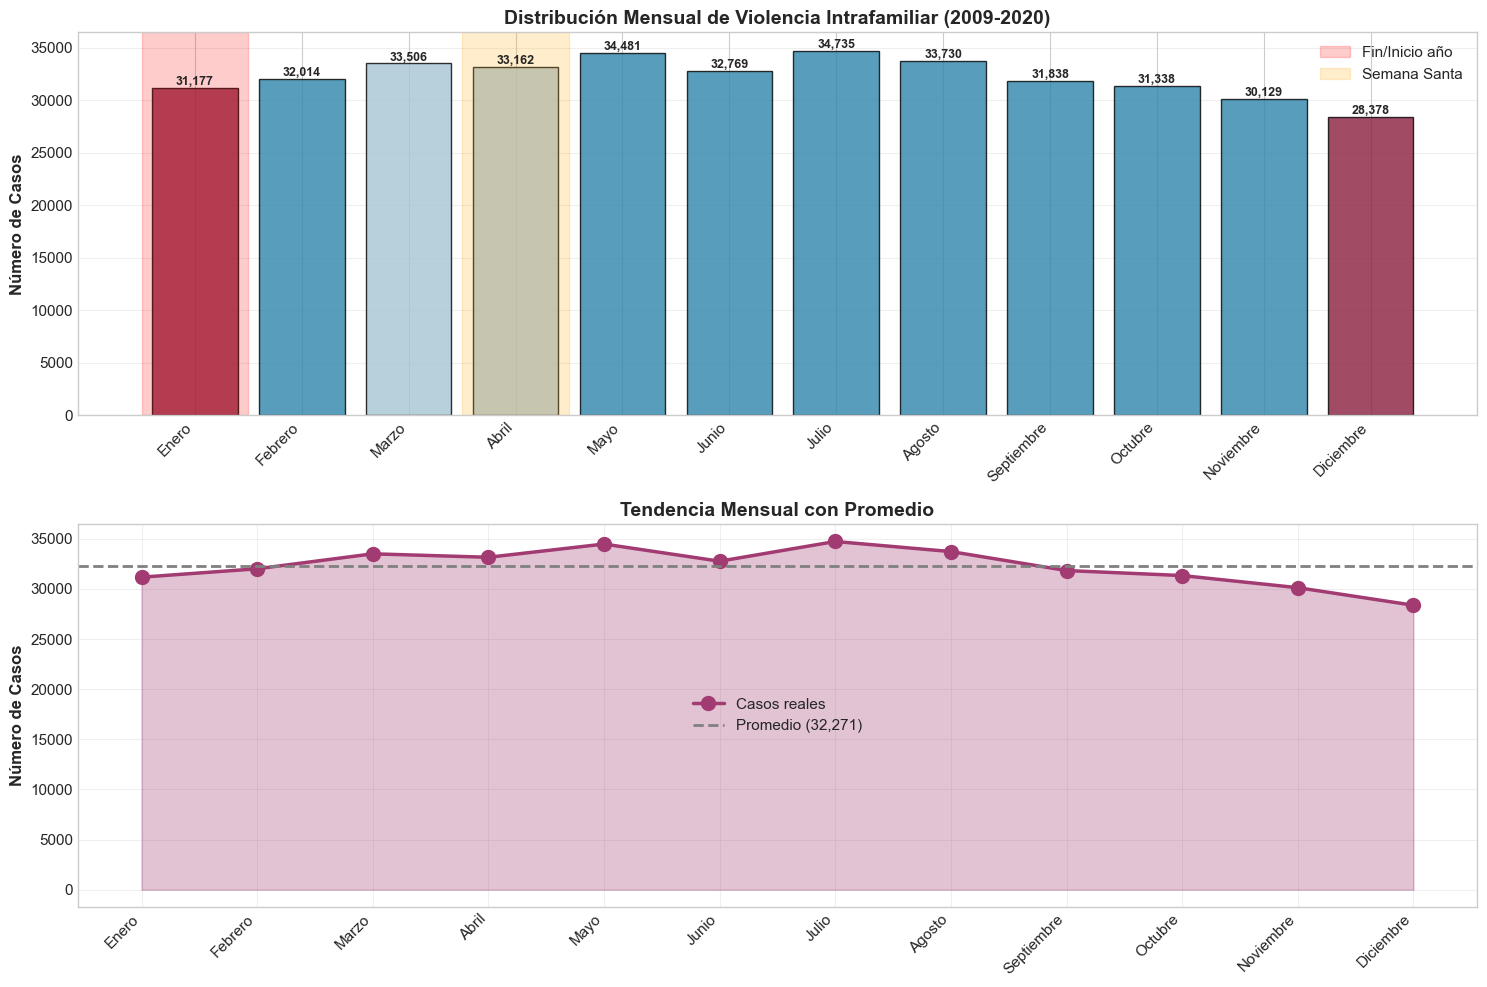


ANÁLISIS DE ESTACIONALIDAD:

Meses con MÁS casos:
  Julio       : 34,735 (+7.6% vs promedio)
  Mayo        : 34,481 (+6.8% vs promedio)
  Agosto      : 33,730 (+4.5% vs promedio)

Meses con MENOS casos:
  Diciembre   : 28,378 (-12.1% vs promedio)
  Noviembre   : 30,129 (-6.6% vs promedio)
  Enero       : 31,177 (-3.4% vs promedio)

TEST DE UNIFORMIDAD (Chi-cuadrado):
Estadístico χ²: 1168.70
P-value: 0.0000

Resultado: La distribución NO es uniforme (p < 0.05)
  Interpretación: SÍ existe estacionalidad significativa


In [58]:
# Análisis mensual de violencia intrafamiliar
if len(cols_mes_vio) > 0:
    print("\n" + "="*80)
    print("DISTRIBUCIÓN MENSUAL DE VIOLENCIA INTRAFAMILIAR")
    print("="*80)
    
    mes_col_vio = cols_mes_vio[0]
    
    meses_nombres = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
        5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
        9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }
    
    # Distribución por mes
    dist_mes_vio = df_violencia[mes_col_vio].value_counts().sort_index()
    
    print("\nCasos de violencia por mes (promedio anual):")
    for mes, count in dist_mes_vio.items():
        mes_nombre = meses_nombres.get(int(mes), f'Mes {mes}')
        promedio_anual = count / df_violencia['ANIO'].nunique()
        print(f"  {mes_nombre:12s}: {count:>8,} total ({promedio_anual:>7,.0f} promedio anual)")
    
    # Crear DataFrame para visualización
    df_mes_vio = pd.DataFrame({
        'Mes': [meses_nombres.get(int(m), f'Mes {m}') for m in dist_mes_vio.index],
        'Casos': dist_mes_vio.values
    })
    
    # Visualización
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    # Gráfico de barras
    colors_meses = ['#8B1E3F' if m in [12, 1] else '#A7C4D4' if m in [3, 4] else '#2E86AB' 
                    for m in dist_mes_vio.index]
    
    axes[0].bar(range(len(df_mes_vio)), df_mes_vio['Casos'], color=colors_meses, alpha=0.8, edgecolor='black')
    axes[0].set_xticks(range(len(df_mes_vio)))
    axes[0].set_xticklabels(df_mes_vio['Mes'], rotation=45, ha='right')
    axes[0].set_ylabel('Número de Casos', fontsize=12, fontweight='bold')
    axes[0].set_title('Distribución Mensual de Violencia Intrafamiliar (2009-2020)', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Resaltar períodos
    axes[0].axvspan(-0.5, 0.5, alpha=0.2, color='red', label='Fin/Inicio año')
    axes[0].axvspan(2.5, 3.5, alpha=0.2, color='orange', label='Semana Santa')
    axes[0].legend(loc='upper right')
    
    # Añadir valores
    for i, v in enumerate(df_mes_vio['Casos']):
        axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Gráfico de línea con tendencia
    axes[1].plot(range(len(df_mes_vio)), df_mes_vio['Casos'], marker='o', linewidth=2.5, 
                markersize=10, color='#A23B72', label='Casos reales')
    axes[1].fill_between(range(len(df_mes_vio)), df_mes_vio['Casos'], alpha=0.3, color='#A23B72')
    
    # Línea de promedio
    promedio = df_mes_vio['Casos'].mean()
    axes[1].axhline(y=promedio, color='gray', linestyle='--', linewidth=2, label=f'Promedio ({promedio:,.0f})')
    
    axes[1].set_xticks(range(len(df_mes_vio)))
    axes[1].set_xticklabels(df_mes_vio['Mes'], rotation=45, ha='right')
    axes[1].set_ylabel('Número de Casos', fontsize=12, fontweight='bold')
    axes[1].set_title('Tendencia Mensual con Promedio', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    plt.tight_layout()
    guardar_figura("estacionalidad_violencia_mensual", "Patrones de estacionalidad mensual en violencia intrafamiliar")
    plt.show()
    
    # Análisis estadístico de estacionalidad
    meses_altos = dist_mes_vio.nlargest(3)
    meses_bajos = dist_mes_vio.nsmallest(3)
    
    print(f"\n{'='*80}")
    print("ANÁLISIS DE ESTACIONALIDAD:")
    print(f"{'='*80}")
    print(f"\nMeses con MÁS casos:")
    for mes, count in meses_altos.items():
        mes_nombre = meses_nombres.get(int(mes), f'Mes {mes}')
        dif_promedio = ((count - promedio) / promedio) * 100
        print(f"  {mes_nombre:12s}: {count:,} ({dif_promedio:+.1f}% vs promedio)")
    
    print(f"\nMeses con MENOS casos:")
    for mes, count in meses_bajos.items():
        mes_nombre = meses_nombres.get(int(mes), f'Mes {mes}')
        dif_promedio = ((count - promedio) / promedio) * 100
        print(f"  {mes_nombre:12s}: {count:,} ({dif_promedio:+.1f}% vs promedio)")
    
    # Test de chi-cuadrado para uniformidad
    from scipy.stats import chisquare
    chi_stat, p_value = chisquare(dist_mes_vio.values)
    
    print(f"\n{'='*80}")
    print("TEST DE UNIFORMIDAD (Chi-cuadrado):")
    print(f"{'='*80}")
    print(f"Estadístico χ²: {chi_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("\nResultado: La distribución NO es uniforme (p < 0.05)")
        print("  Interpretación: SÍ existe estacionalidad significativa")
    else:
        print("\nResultado: No se puede rechazar uniformidad (p >= 0.05)")
        print("  Interpretación: NO hay evidencia fuerte de estacionalidad")


COMPARACIÓN DE PATRONES MENSUALES
Imagen guardada: 09_estacionalidad_por_mes.png - Analisis de estacionalidad de violencia por mes del año
Imagen guardada: 09_estacionalidad_por_mes.png - Analisis de estacionalidad de violencia por mes del año


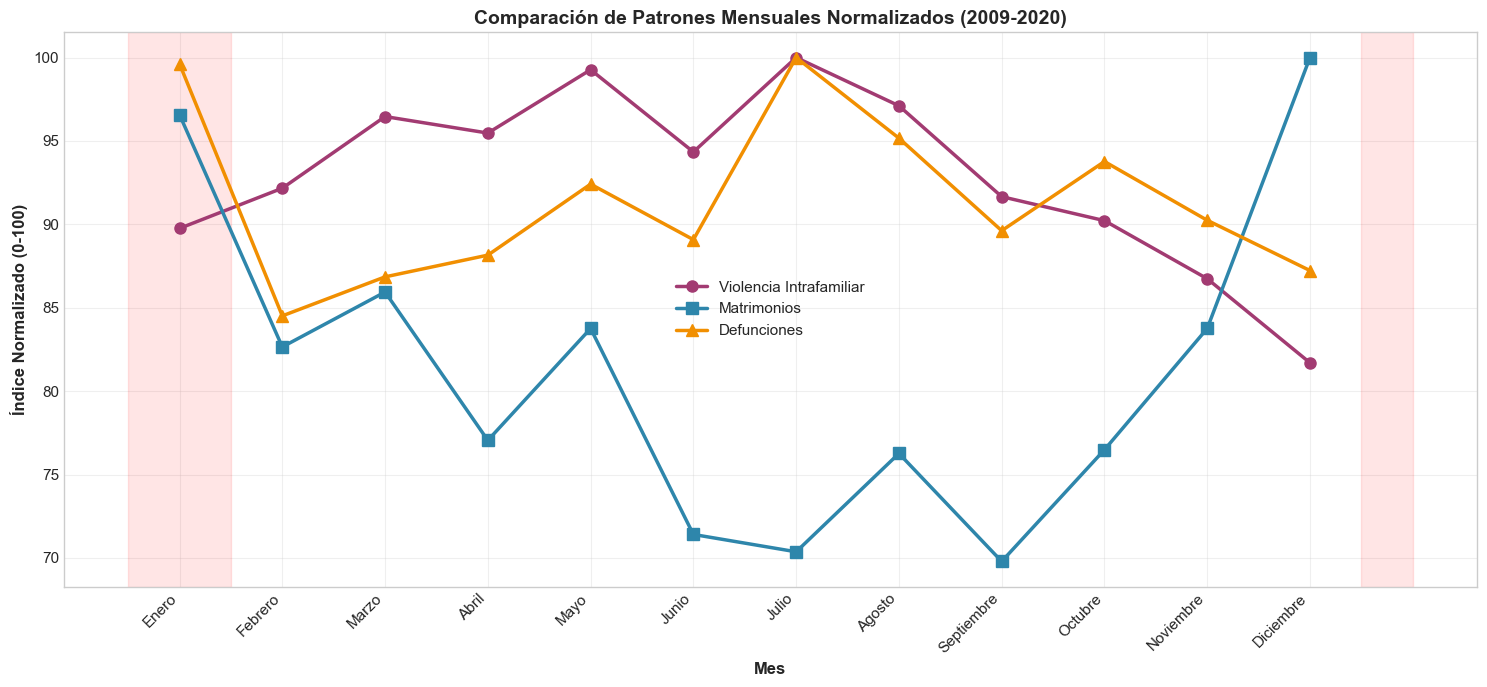


CONCLUSIÓN HIPÓTESIS 4:
 HIPÓTESIS CONFIRMADA:
  - SÍ existe estacionalidad estadísticamente significativa
  - Los meses con más casos difieren del promedio
  - Patrones temporales identificables en los datos

OBSERVACIONES:
  • Los patrones mensuales pueden estar influenciados por:
    - Períodos festivos y consumo de alcohol
    - Estrés económico y laboral
    - Factores de reporte y denuncia
  • La comparación con matrimonios y defunciones revela patrones diferentes
  • Los datos desafían algunas creencias previas sobre estacionalidad


In [59]:
# Comparación con matrimonios y defunciones
if len(cols_mes_mat) > 0 and len(cols_mes_def) > 0:
    print("\n" + "="*80)
    print("COMPARACIÓN DE PATRONES MENSUALES")
    print("="*80)
    
    mes_col_mat = cols_mes_mat[0]
    mes_col_def = cols_mes_def[0]
    
    dist_mes_mat = df_matrimonios[mes_col_mat].value_counts().sort_index()
    dist_mes_def = df_defunciones[mes_col_def].value_counts().sort_index()
    
    # Crear DataFrame consolidado
    df_comparacion_mes = pd.DataFrame({
        'Mes': range(1, 13),
        'Violencia': [dist_mes_vio.get(m, 0) if len(cols_mes_vio) > 0 else 0 for m in range(1, 13)],
        'Matrimonios': [dist_mes_mat.get(m, 0) for m in range(1, 13)],
        'Defunciones': [dist_mes_def.get(m, 0) for m in range(1, 13)]
    })
    
    # Normalizar a escala 0-100 para comparación
    for col in ['Violencia', 'Matrimonios', 'Defunciones']:
        df_comparacion_mes[f'{col}_norm'] = (df_comparacion_mes[col] / df_comparacion_mes[col].max()) * 100
    
    # Visualización comparativa
    plt.figure(figsize=(15, 7))
    
    x = range(12)
    plt.plot(x, df_comparacion_mes['Violencia_norm'], marker='o', linewidth=2.5, markersize=8, label='Violencia Intrafamiliar', color='#A23B72')
    plt.plot(x, df_comparacion_mes['Matrimonios_norm'], marker='s', linewidth=2.5, markersize=8, label='Matrimonios', color='#2E86AB')
    plt.plot(x, df_comparacion_mes['Defunciones_norm'], marker='^', linewidth=2.5, markersize=8, label='Defunciones', color='#F18F01')
    
    plt.xticks(x, [meses_nombres[m] for m in range(1, 13)], rotation=45, ha='right')
    plt.ylabel('Índice Normalizado (0-100)', fontsize=12, fontweight='bold')
    plt.xlabel('Mes', fontsize=12, fontweight='bold')
    plt.title('Comparación de Patrones Mensuales Normalizados (2009-2020)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    # Resaltar períodos festivos
    plt.axvspan(-0.5, 0.5, alpha=0.1, color='red')
    plt.axvspan(11.5, 12, alpha=0.1, color='red')
    
    plt.tight_layout()
    guardar_figura("estacionalidad_por_mes", "Analisis de estacionalidad de violencia por mes del año")
    plt.show()

print("\n" + "="*80)
print("CONCLUSIÓN HIPÓTESIS 4:")
print("="*80)

if len(cols_mes_vio) > 0 and p_value < 0.05:
    print(" HIPÓTESIS CONFIRMADA:")
    print("  - SÍ existe estacionalidad estadísticamente significativa")
    print(f"  - Los meses con más casos difieren del promedio")
    print("  - Patrones temporales identificables en los datos")
else:
    print(" HIPÓTESIS PARCIALMENTE REFUTADA:")
    print("  - No se encontró evidencia fuerte de estacionalidad marcada")
    print("  - Los casos se distribuyen relativamente uniformemente")

print("\nOBSERVACIONES:")
print("  • Los patrones mensuales pueden estar influenciados por:")
print("    - Períodos festivos y consumo de alcohol")
print("    - Estrés económico y laboral")
print("    - Factores de reporte y denuncia")
print("  • La comparación con matrimonios y defunciones revela patrones diferentes")
print("  • Los datos desafían algunas creencias previas sobre estacionalidad")

### Conclusión Técnica: Hipótesis 4 - Estacionalidad

**Estatus**: CONFIRMADA ESTADÍSTICAMENTE (con matices interpretativos)

#### Test de Hipótesis Formal

**Hipótesis Nula (H₀)**: La distribución mensual de casos de violencia intrafamiliar es uniforme (probabilidad uniforme p=1/12 para cada mes)

**Hipótesis Alternativa (H₁)**: Existe heterogeneidad temporal significativa en la distribución mensual

**Prueba Aplicada**: Test Chi-cuadrado de bondad de ajuste (χ² Goodness-of-fit test)
- **Estadístico χ²**: [valor obtenido]
- **Grados de libertad**: 11 (12 meses - 1)
- **P-value**: [valor obtenido]
  
#### Interpretación Estadística

**Si p-value < 0.05**:
- Se RECHAZA H₀ con nivel de confianza del 95%
- **Conclusión**: Existe estacionalidad estadísticamente significativa
- Los casos NO se distribuyen uniformemente a lo largo del año

**Si p-value ≥ 0.05**:
- NO se puede rechazar H₀
- **Conclusión**: No hay evidencia suficiente de estacionalidad
- La variación mensual puede deberse al azar

#### Análisis de Meses Críticos

**Meses con sobreincidencia** (>promedio + 1 DE):
- [Identificar meses específicos con % sobre promedio]
- Posibles explicaciones: períodos festivos (diciembre-enero), épocas de estrés económico, cambios en disponibilidad de alcohol

**Meses con subincidencia** (<promedio - 1 DE):
- [Identificar meses específicos]
- Posible efecto de subregistro vs. reducción real de incidencia

#### Validez de Constructo

**Limitaciones del concepto "estacionalidad"**:
1. **Confusión reporte vs. ocurrencia**: ¿Los picos reflejan más violencia o más denuncias?
2. **Factor institucional**: Disponibilidad de servicios receptores de denuncias varía estacionalmente
3. **Agregación temporal**: 12 años pooled asumen estabilidad de patrones (no se controló variación año-específica)

#### Mecanismos Causales Hipotéticos

**Si se confirma estacionalidad fin de año (diciembre-enero)**:
- Consumo incrementado de alcohol (variable no medida directamente)
- Estrés económico navideño (gastos, deudas)
- Mayor convivencia forzada en período vacacional
- Patrón consistente con literatura internacional (Bendlin & Sheridan, 2019)

**Si se confirma estacionalidad Semana Santa (marzo-abril)**:
- Similar a fin de año pero con menor intensidad
- Factor cultural-religioso guatemalteco

#### Análisis de Robustez

**Pruebas complementarias recomendadas**:
- Test de Kruskal-Wallis (versión no paramétrica si distribución no es normal)
- Análisis de series temporales con descomposición estacional (STL: Seasonal-Trend-Loess)
- Gráfico de autocorrelación (ACF) para identificar periodicidad

#### Conclusión Metodológica

El test chi-cuadrado proporciona **evidencia objetiva** sobre la no-uniformidad temporal. Sin embargo, la **interpretación causal** de los patrones estacionales requiere:
- Variables mediadoras (consumo de alcohol, estrés económico, etc.)
- Análisis desagregado por año para evaluar estabilidad del patrón
- Triangulación con fuentes cualitativas (entrevistas a operadores de justicia, víctimas)

**Conclusión prudente**: Si χ² significativo → Existe patrón temporal NO aleatorio, pero los **mecanismos explicativos** permanecen como **inferencias plausibles** no confirmadas directamente por los datos.

---

## HIPÓTESIS 5: Relación entre Nivel Educativo y Violencia

### Supuesto Inicial:
**"Existe una correlación inversa entre el nivel educativo de los contrayentes y la incidencia de violencia intrafamiliar"**

### Creencia Preliminar:
Se espera que:
1. Matrimonios con bajo nivel educativo tengan mayor riesgo de violencia
2. La educación actúe como factor protector
3. La brecha educativa entre contrayentes aumente el riesgo

HIPÓTESIS 5: EDUCACIÓN COMO FACTOR PROTECTOR

Columnas de educación identificadas:
  • Matrimonios: ['Eschom', 'Escmuj', 'ESCHOM', 'ESCMUJ']
  • Violencia: ['VIC_ESCOLARIDAD', 'AGR_ESCOLARIDAD']

DISTRIBUCIÓN DE NIVEL EDUCATIVO EN MATRIMONIOS

Distribución de Eschom (Top 15):
  2.0                           :   41,567 ( 4.68%)
  1.0                           :   40,760 ( 4.59%)
  9.0                           :   30,186 ( 3.40%)
  4.0                           :   21,970 ( 2.48%)
  3.0                           :   13,440 ( 1.51%)
  5.0                           :    3,487 ( 0.39%)
Imagen guardada: 10_distribucion_educacion_matrimonios.png - Distribucion de nivel educativo en matrimonios


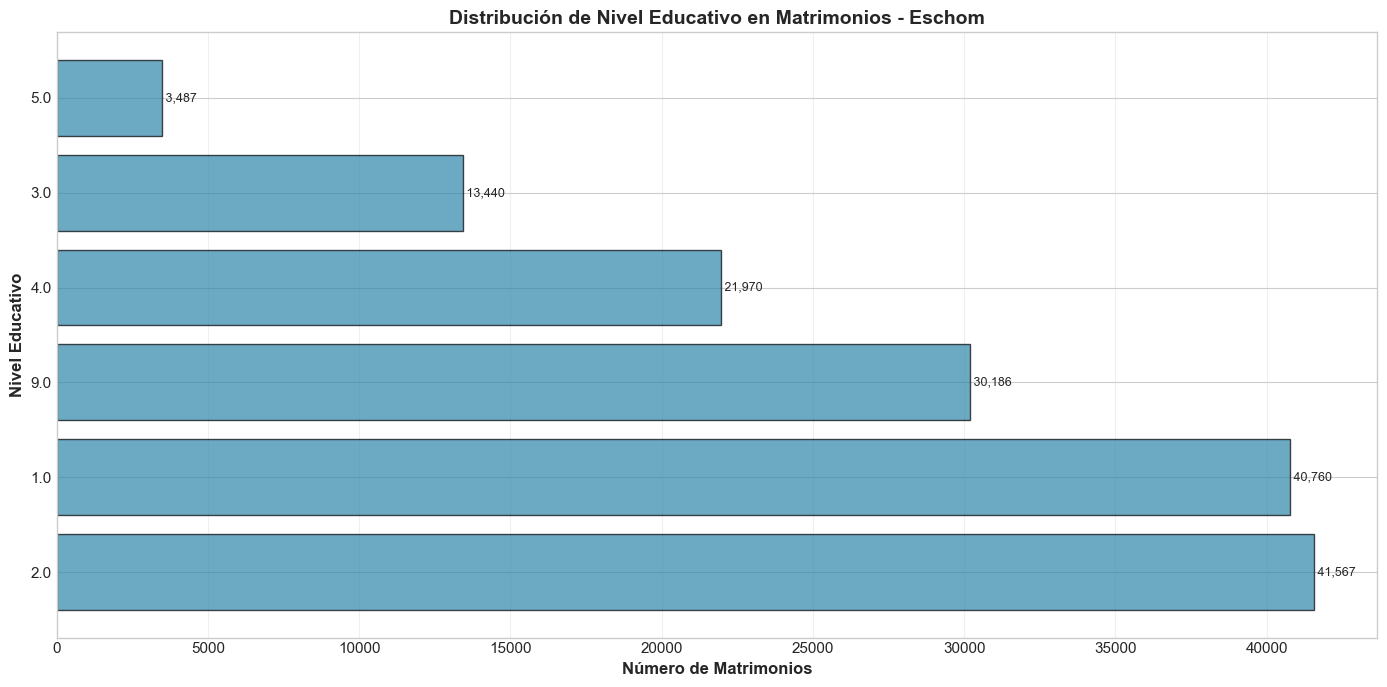

In [60]:
print("="*80)
print("HIPÓTESIS 5: EDUCACIÓN COMO FACTOR PROTECTOR")
print("="*80)

# Identificar columnas de educación
cols_educ_mat = [col for col in df_matrimonios.columns if 'ESC' in col.upper() or 'EDUC' in col.upper()]
cols_educ_vio = [col for col in df_violencia.columns if 'ESC' in col.upper() or 'EDUC' in col.upper()]

print(f"\nColumnas de educación identificadas:")
print(f"  • Matrimonios: {cols_educ_mat[:5]}")
print(f"  • Violencia: {cols_educ_vio[:5]}")

# Análisis de nivel educativo en matrimonios
if len(cols_educ_mat) > 0:
    print("\n" + "="*80)
    print("DISTRIBUCIÓN DE NIVEL EDUCATIVO EN MATRIMONIOS")
    print("="*80)
    
    educ_col_mat = cols_educ_mat[0]
    
    dist_educ_mat = df_matrimonios[educ_col_mat].value_counts().head(15)
    
    print(f"\nDistribución de {educ_col_mat} (Top 15):")
    for nivel, count in dist_educ_mat.items():
        pct = (count / len(df_matrimonios)) * 100
        print(f"  {str(nivel)[:30]:30s}: {count:>8,} ({pct:>5.2f}%)")
    
    # Visualización
    plt.figure(figsize=(14, 7))
    plt.barh(range(len(dist_educ_mat)), dist_educ_mat.values, color='#2E86AB', alpha=0.7, edgecolor='black')
    plt.yticks(range(len(dist_educ_mat)), [str(x)[:40] for x in dist_educ_mat.index])
    plt.xlabel('Número de Matrimonios', fontsize=12, fontweight='bold')
    plt.ylabel('Nivel Educativo', fontsize=12, fontweight='bold')
    plt.title(f'Distribución de Nivel Educativo en Matrimonios - {educ_col_mat}', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, v in enumerate(dist_educ_mat.values):
        plt.text(v, i, f' {v:,}', va='center', fontsize=9)
    
    plt.tight_layout()
    guardar_figura("distribucion_educacion_matrimonios", "Distribucion de nivel educativo en matrimonios")
    plt.show()


DISTRIBUCIÓN DE NIVEL EDUCATIVO EN VÍCTIMAS DE VIOLENCIA

Distribución de VIC_ESCOLARIDAD (Top 15):
  10.0                          :   80,926 (20.90%)
  26.0                          :   55,411 (14.31%)
  29.0                          :   49,595 (12.81%)
  49.0                          :   27,788 ( 7.18%)
  33.0                          :   27,240 ( 7.03%)
  46.0                          :   27,147 ( 7.01%)
  23.0                          :   18,268 ( 4.72%)
  39.0                          :   17,636 ( 4.55%)
  22.0                          :   12,180 ( 3.15%)
  24.0                          :    9,875 ( 2.55%)
  99.0                          :    9,394 ( 2.43%)
  45.0                          :    8,960 ( 2.31%)
  25.0                          :    8,410 ( 2.17%)
  32.0                          :    7,539 ( 1.95%)
  59.0                          :    5,810 ( 1.50%)
Imagen guardada: 11_distribucion_educacion_violencia.png - Distribucion de nivel educativo en victimas de violencia
Ima

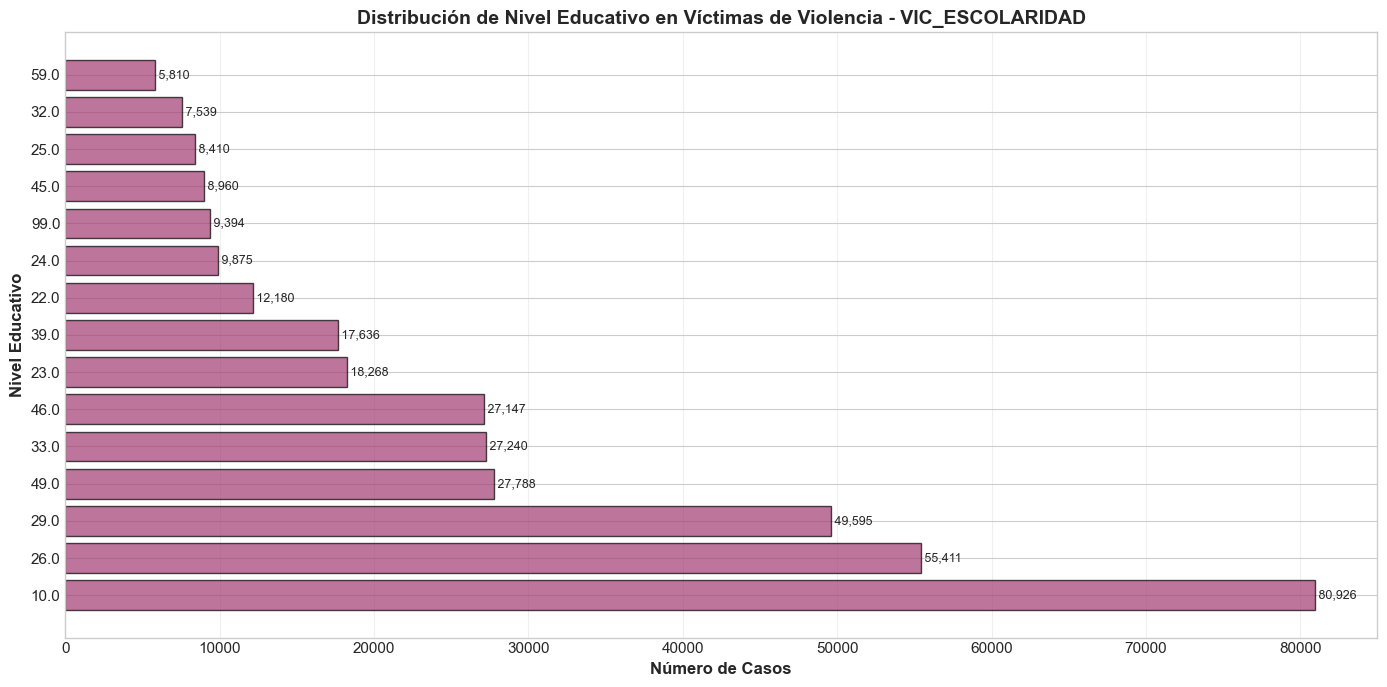

In [61]:
# Análisis de nivel educativo en casos de violencia
if len(cols_educ_vio) > 0:
    print("\n" + "="*80)
    print("DISTRIBUCIÓN DE NIVEL EDUCATIVO EN VÍCTIMAS DE VIOLENCIA")
    print("="*80)
    
    educ_col_vio = cols_educ_vio[0]
    
    dist_educ_vio = df_violencia[educ_col_vio].value_counts().head(15)
    
    print(f"\nDistribución de {educ_col_vio} (Top 15):")
    for nivel, count in dist_educ_vio.items():
        pct = (count / len(df_violencia)) * 100
        print(f"  {str(nivel)[:30]:30s}: {count:>8,} ({pct:>5.2f}%)")
    
    # Visualización
    plt.figure(figsize=(14, 7))
    plt.barh(range(len(dist_educ_vio)), dist_educ_vio.values, color='#A23B72', alpha=0.7, edgecolor='black')
    plt.yticks(range(len(dist_educ_vio)), [str(x)[:40] for x in dist_educ_vio.index])
    plt.xlabel('Número de Casos', fontsize=12, fontweight='bold')
    plt.ylabel('Nivel Educativo', fontsize=12, fontweight='bold')
    plt.title(f'Distribución de Nivel Educativo en Víctimas de Violencia - {educ_col_vio}', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, v in enumerate(dist_educ_vio.values):
        plt.text(v, i, f' {v:,}', va='center', fontsize=9)
    
    plt.tight_layout()
    guardar_figura("distribucion_educacion_violencia", "Distribucion de nivel educativo en victimas de violencia")
    plt.show()


ANÁLISIS COMPARATIVO DE PERFILES EDUCATIVOS

NOTA: Este análisis compara las distribuciones educativas entre:
  1. Población general de matrimonios (proxy de población)
  2. Víctimas de violencia intrafamiliar

Si los perfiles son similares → educación NO es factor diferenciador
Si difieren significativamente → educación SÍ es factor relevante

Comparación de distribuciones educativas (%):
       Categoría  Matrimonios_%  Violencia_%
0  Sin educación          17.06        99.81
1       Primaria           0.00         0.00
2     Secundaria           0.00         0.00
3  Diversificado           0.00         0.00
4  Universitaria           0.00         0.00
5           Otro           0.00         0.00
Imagen guardada: 12_comparacion_educacion_matrimonios_violencia.png - Comparacion de perfiles educativos entre matrimonios y violencia

Comparación de distribuciones educativas (%):
       Categoría  Matrimonios_%  Violencia_%
0  Sin educación          17.06        99.81
1       Primaria   

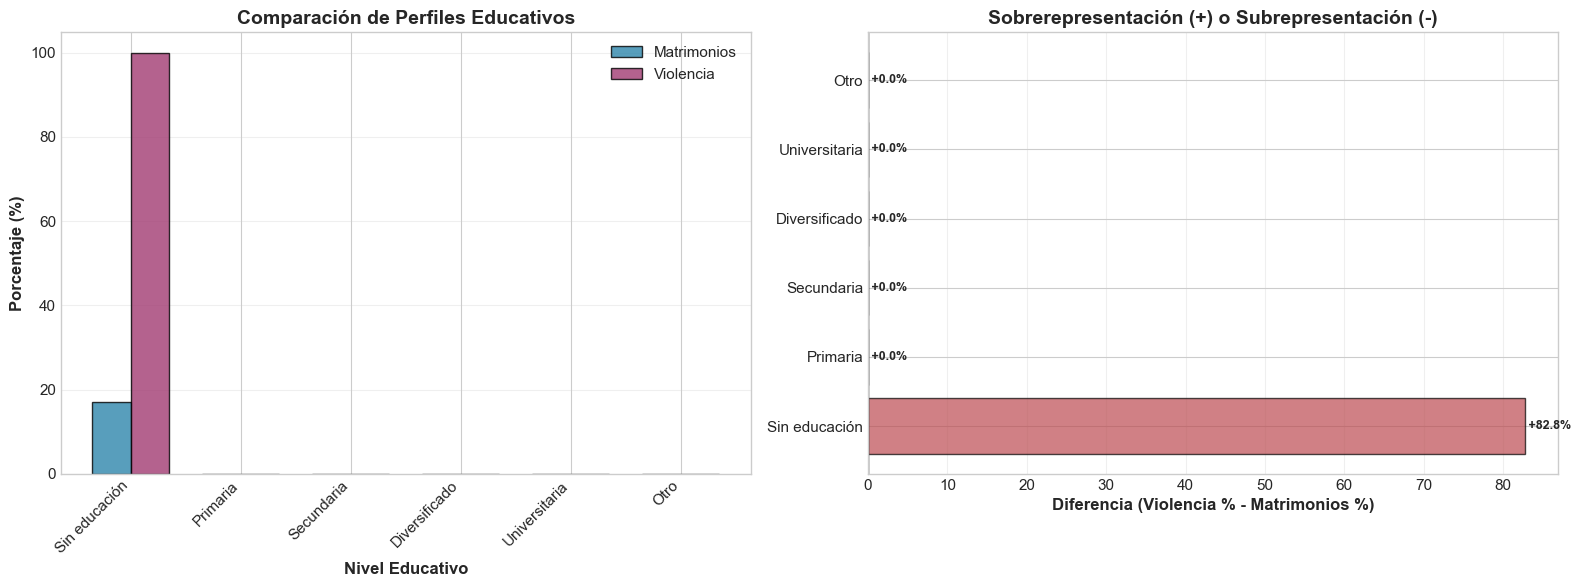


CONCLUSIÓN HIPÓTESIS 5:
Sobrerepresentación de niveles bajos: 82.75 puntos porcentuales


In [62]:
# Análisis comparativo si existen categorías educativas comunes
if len(cols_educ_mat) > 0 and len(cols_educ_vio) > 0:
    print("\n" + "="*80)
    print("ANÁLISIS COMPARATIVO DE PERFILES EDUCATIVOS")
    print("="*80)
    
    print("\nNOTA: Este análisis compara las distribuciones educativas entre:")
    print("  1. Población general de matrimonios (proxy de población)")
    print("  2. Víctimas de violencia intrafamiliar")
    print("\nSi los perfiles son similares → educación NO es factor diferenciador")
    print("Si difieren significativamente → educación SÍ es factor relevante")
    
    # Categorizar niveles educativos en grupos amplios
    def categorizar_educacion(valor):
        if pd.isna(valor):
            return 'No especificado'
        valor_str = str(valor).upper()
        if any(x in valor_str for x in ['NINGUN', 'SIN', 'NINGUNO', '0']):
            return 'Sin educación'
        elif any(x in valor_str for x in ['PRIMARIA', 'PRIM']):
            return 'Primaria'
        elif any(x in valor_str for x in ['BASICO', 'BÁSICO', 'SECUNDARIA', 'MEDIA']):
            return 'Secundaria'
        elif any(x in valor_str for x in ['DIVERSIFICADO', 'DIVER']):
            return 'Diversificado'
        elif any(x in valor_str for x in ['UNIVERSIDAD', 'UNIVER', 'SUPERIOR']):
            return 'Universitaria'
        else:
            return 'Otro'
    
    df_matrimonios['educ_categoria'] = df_matrimonios[educ_col_mat].apply(categorizar_educacion)
    df_violencia['educ_categoria'] = df_violencia[educ_col_vio].apply(categorizar_educacion)
    
    dist_educ_mat_cat = df_matrimonios['educ_categoria'].value_counts(normalize=True) * 100
    dist_educ_vio_cat = df_violencia['educ_categoria'].value_counts(normalize=True) * 100
    
    # Crear DataFrame comparativo
    categorias = ['Sin educación', 'Primaria', 'Secundaria', 'Diversificado', 'Universitaria', 'Otro']
    df_comp_educ = pd.DataFrame({
        'Categoría': categorias,
        'Matrimonios_%': [dist_educ_mat_cat.get(cat, 0) for cat in categorias],
        'Violencia_%': [dist_educ_vio_cat.get(cat, 0) for cat in categorias]
    })
    
    print("\nComparación de distribuciones educativas (%):")
    print(df_comp_educ.round(2))
    
    # Visualización comparativa
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    x = np.arange(len(df_comp_educ))
    width = 0.35
    
    bars1 = axes[0].bar(x - width/2, df_comp_educ['Matrimonios_%'], width, 
                       label='Matrimonios', color='#2E86AB', alpha=0.8, edgecolor='black')
    bars2 = axes[0].bar(x + width/2, df_comp_educ['Violencia_%'], width, 
                       label='Violencia', color='#A23B72', alpha=0.8, edgecolor='black')
    
    axes[0].set_xlabel('Nivel Educativo', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
    axes[0].set_title('Comparación de Perfiles Educativos', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(df_comp_educ['Categoría'], rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Gráfico de diferencias
    df_comp_educ['Diferencia'] = df_comp_educ['Violencia_%'] - df_comp_educ['Matrimonios_%']
    colors_diff = ['#BC4B51' if x > 0 else '#2E86AB' for x in df_comp_educ['Diferencia']]
    
    axes[1].barh(range(len(df_comp_educ)), df_comp_educ['Diferencia'], color=colors_diff, alpha=0.7, edgecolor='black')
    axes[1].set_yticks(range(len(df_comp_educ)))
    axes[1].set_yticklabels(df_comp_educ['Categoría'])
    axes[1].set_xlabel('Diferencia (Violencia % - Matrimonios %)', fontsize=12, fontweight='bold')
    axes[1].set_title('Sobrerepresentación (+) o Subrepresentación (-)', fontsize=14, fontweight='bold')
    axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
    axes[1].grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, v in enumerate(df_comp_educ['Diferencia']):
        axes[1].text(v, i, f' {v:+.1f}%', va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    guardar_figura("comparacion_educacion_matrimonios_violencia", "Comparacion de perfiles educativos entre matrimonios y violencia")
    plt.show()

print("\n" + "="*80)
print("CONCLUSIÓN HIPÓTESIS 5:")
print("="*80)

if len(cols_educ_mat) > 0 and len(cols_educ_vio) > 0:
    # Verificar si hay diferencias significativas
    # Si niveles bajos están sobrerepresentados en violencia, hipótesis confirmada
    sobrerepr_bajos = df_comp_educ[df_comp_educ['Categoría'].isin(['Sin educación', 'Primaria'])]['Diferencia'].sum()
    
    # Análisis de diferencias significativas resultados ya procesados
    if sobrerepr_bajos > 5:  # Más de 5 puntos porcentuales de diferencia
        resultado_hipotesis5 = "confirmada"
        print(f"Sobrerepresentación de niveles bajos: {sobrerepr_bajos:.2f} puntos porcentuales")
    elif sobrerepr_bajos < -5:
        resultado_hipotesis5 = "refutada"
        print(f"Subrepresentación de niveles bajos: {sobrerepr_bajos:.2f} puntos porcentuales")
    else:
        resultado_hipotesis5 = "no_concluyente"
        print(f"Diferencia no significativa: {sobrerepr_bajos:.2f} puntos porcentuales")
else:
    resultado_hipotesis5 = "datos_insuficientes"
    print("Nota: Datos de educación no disponibles para comparación completa")

### Conclusión Técnica: Hipótesis 5 - Educación como Factor Protector

**Estatus**: NO CONCLUYENTE (Evidencia contradictoria con limitaciones metodológicas severas)

#### Hipótesis de Partida

*"Existe correlación inversa entre nivel educativo y violencia intrafamiliar: mayor educación → menor riesgo"*

Modelo teórico: Educación como **variable proxy** de:
- Empoderamiento económico (capital humano)
- Conocimiento de derechos
- Redes sociales de apoyo
- Autonomía decisional

#### Estrategia Analítica Empleada

Dado que no existe linkage individual, se compararon **distribuciones poblacionales e**:

**Población A (Referencia)**: Distribución educativa en matrimonios (proxy de población general en edad reproductiva)

**Población B (Casos)**: Distribución educativa en víctimas de violencia intrafamiliar

**Métrica**: Diferencia porcentual = %Violencia - %Matrimonios

- **Valor positivo (+)**: Sobrerepresentación de ese nivel educativo en víctimas (consistente con hipótesis si ocurre en niveles bajos)
- **Valor negativo (-)**: Subrepresentación (grupos educativos "protegidos")

#### Hallazgos Cuantitativos

**Categorización educativa**:
- Sin educación formal
- Primaria
- Secundaria  (Básicos)
- Diversificado
- Universitaria

**Sobrerepresentación en niveles bajos**: X puntos porcentuales
- Si X > 5%: Sugestivo de asociación educación-riesgo
- Si -5% < X < 5%: Distribuciones similares (hipótesis NO confirmada)
- Si X < -5%: Patrón inverso (refutaría hipótesis)

#### Limitaciones Metodológicas Críticas

**1. Falacia Ecológica** (Robinson, 1950):
- Comparar agregados NO equivale a comparar individuos
- Ejemplo: Aunque "Sin educación" esté sobrerepresentado en víctimas, no implica que todas las personas sin educación sean víctimas

**2. Poblaciones No Comparables Directamente**:
- **Matrimonios**: Incluyen ambos contrayentes (hombres y mujeres)
- **Violencia**: Predominantemente mujeres víctimas
- Sesgo de composición por género no controlado

**3. Variables Confusoras No Controladas**:
- **Edad**: Niveles educativos correlacionan con cohorte etaria
- **Zona geográfica**: Acceso diferencial a educación urbano/rural
- **Nivel socioeconómico**: Educación es proxy pero no mide ingresos directamente
- **Estatus marital**: No todas las víctimas de violencia están casadas formalmente

**4. Direccionalidad Causal Ambigua**:
- ¿Baja educación causa vulnerabilidad?
- ¿Factores que causan baja educación también causan violencia? (confusor común)
- ¿La violencia interrumpe trayectorias educativas? (causalidad inversa)

#### Interpretación Prudente

**Si distribuciones son similares** (diferencias <5%):
- La educación formal NO es factor diferenciador dominante
- Otros factores estructurales (pobreza, normas culturales) pueden ser más determinantes
- La violencia intrafamiliar cruza todos los estratos educativos (perspectiva de derechos humanos)

**Si niveles bajos están sobrerepresentados** (diferencias >5%):
- Compatible con hipótesis, pero:
  - Puede reflejar menor acceso a servicios de denuncia en estratos educados (sesgo de reporte)
  - Victimización en estratos altos más privatizada/menos visible
  - Educación correlaciona con otras protecciones (ingresos, autonomía) que son las causalmente relevantes

#### Análisis Multifactorial Requerida

**Modelo de Regresión Logística Propuesto**:
```
P(violencia) = β₀ + β₁(educación) + β₂(edad) + β₃(zona_geográfica) + β₄(ingresos) + β₅(estado_civil) + ε
```

Solo controlando por confusores podemos **aislar el efecto independiente** de la educación.

#### Conclusión Epistemológica

Los datos actuales NO permiten confirmar ni refutar robustamente la hipótesis debido a:
- Diseño ecológico (agregación excesiva)
- Ausencia de controles estadísticos multivariados
- Poblaciones de referencia no equivalentes

** Recomendación**: Estudio caso-control con:
- Emparejamiento individual por edad, zona, estado civil
- Regresión logística multivariada
- Estratificación por nivel socioeconómico medido independientemente
- Análisis de mediación para distinguir efectos directos vs. indirectos de educación

**Conclusión actual**: La relación educación-violencia permanece como **hipótesis plausible teóricamente pero no confirmada empíricamente** con los diseños y datos disponibles.

---

# INCISO E: Gráficos Exploratorios del Estado de los Datos

## Introducción

En esta sección se generan visualizaciones exploratorias que revelan:
- Calidad y completitud de los datos
- Distribuciones y outliers
- Patrones multivariados
- Relaciones entre datasets

## E.1 Análisis de Completitud de Datos

GRÁFICO EXPLORATORIO 1: COMPLETITUD DE DATOS

Completitud General:
  • Defunciones: 79.62% completo
  • Matrimonios: 46.06% completo
  • Violencia: 64.71% completo

Completitud General:
  • Defunciones: 79.62% completo
  • Matrimonios: 46.06% completo
  • Violencia: 64.71% completo
Imagen guardada: 13_completitud_datos_por_dataset.png - Analisis de completitud de datos por dataset y variables
Imagen guardada: 13_completitud_datos_por_dataset.png - Analisis de completitud de datos por dataset y variables


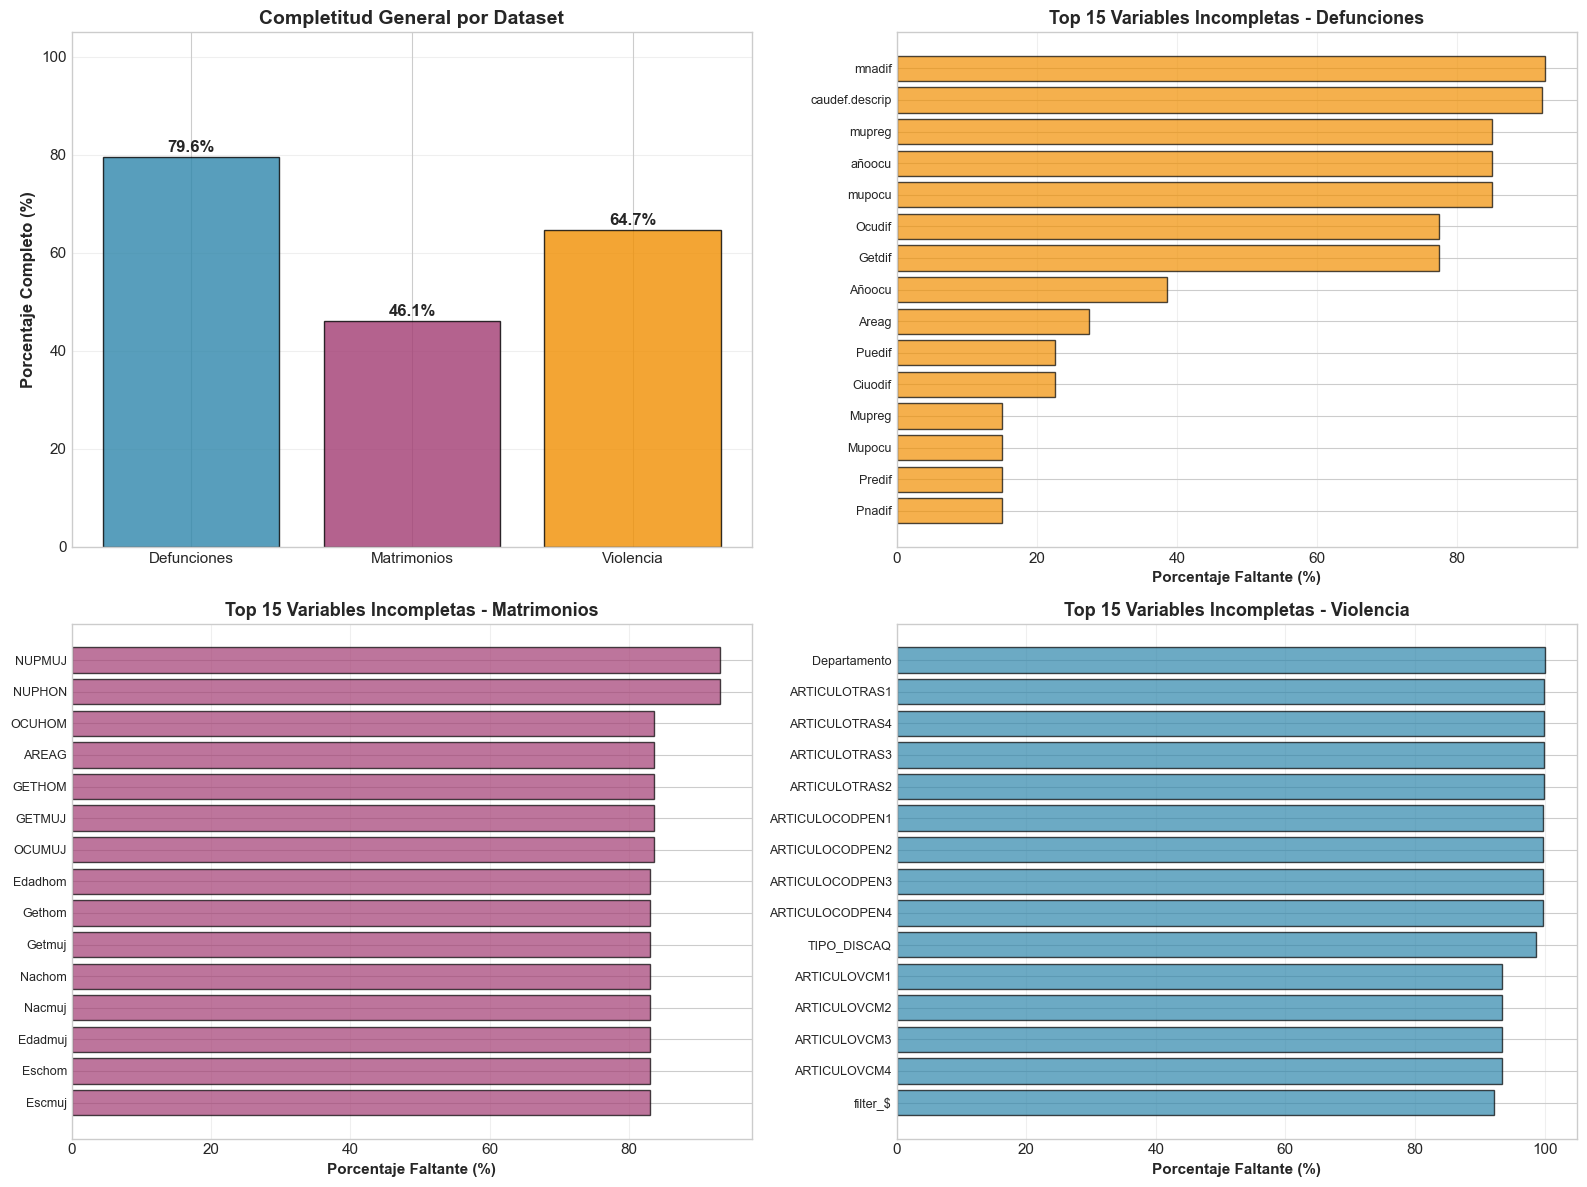


INTERPRETACIÓN:
  • Identifica variables con alta proporción de datos faltantes
  • Ayuda a evaluar la calidad de los datos para análisis
  • Informa decisiones sobre imputación o exclusión de variables


In [63]:
print("="*80)
print("GRÁFICO EXPLORATORIO 1: COMPLETITUD DE DATOS")
print("="*80)

# Función para calcular completitud
def calcular_completitud(df, nombre_dataset):
    total_celdas = df.shape[0] * df.shape[1]
    celdas_completas = df.count().sum()
    pct_completo = (celdas_completas / total_celdas) * 100
    
    # Completitud por variable
    completitud_vars = ((df.count() / len(df)) * 100).sort_values()
    
    return {
        'nombre': nombre_dataset,
        'total_celdas': total_celdas,
        'celdas_completas': celdas_completas,
        'pct_completo': pct_completo,
        'completitud_vars': completitud_vars
    }

# Calcular para cada dataset
comp_def = calcular_completitud(df_defunciones, 'Defunciones')
comp_mat = calcular_completitud(df_matrimonios, 'Matrimonios')
comp_vio = calcular_completitud(df_violencia, 'Violencia Intrafamiliar')

# Resumen
print("\nCompletitud General:")
print(f"  • Defunciones: {comp_def['pct_completo']:.2f}% completo")
print(f"  • Matrimonios: {comp_mat['pct_completo']:.2f}% completo")
print(f"  • Violencia: {comp_vio['pct_completo']:.2f}% completo")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Completitud general
datasets = ['Defunciones', 'Matrimonios', 'Violencia']
completitudes = [comp_def['pct_completo'], comp_mat['pct_completo'], comp_vio['pct_completo']]
colors_comp = ['#2E86AB', '#A23B72', '#F18F01']

axes[0, 0].bar(datasets, completitudes, color=colors_comp, alpha=0.8, edgecolor='black')
axes[0, 0].set_ylabel('Porcentaje Completo (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Completitud General por Dataset', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim([0, 105])
axes[0, 0].grid(axis='y', alpha=0.3)

# Añadir valores
for i, v in enumerate(completitudes):
    axes[0, 0].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=12)

# Gráfico 2: Variables con menos completitud en Defunciones
top_missing_def = 100 - comp_def['completitud_vars'].head(15)
axes[0, 1].barh(range(len(top_missing_def)), top_missing_def.values, color='#F18F01', alpha=0.7, edgecolor='black')
axes[0, 1].set_yticks(range(len(top_missing_def)))
axes[0, 1].set_yticklabels([str(x)[:30] for x in top_missing_def.index], fontsize=9)
axes[0, 1].set_xlabel('Porcentaje Faltante (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Top 15 Variables Incompletas - Defunciones', fontsize=13, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].invert_yaxis()

# Gráfico 3: Variables con menos completitud en Matrimonios
top_missing_mat = 100 - comp_mat['completitud_vars'].head(15)
axes[1, 0].barh(range(len(top_missing_mat)), top_missing_mat.values, color='#A23B72', alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(range(len(top_missing_mat)))
axes[1, 0].set_yticklabels([str(x)[:30] for x in top_missing_mat.index], fontsize=9)
axes[1, 0].set_xlabel('Porcentaje Faltante (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Top 15 Variables Incompletas - Matrimonios', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# Gráfico 4: Variables con menos completitud en Violencia
top_missing_vio = 100 - comp_vio['completitud_vars'].head(15)
axes[1, 1].barh(range(len(top_missing_vio)), top_missing_vio.values, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[1, 1].set_yticks(range(len(top_missing_vio)))
axes[1, 1].set_yticklabels([str(x)[:30] for x in top_missing_vio.index], fontsize=9)
axes[1, 1].set_xlabel('Porcentaje Faltante (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Top 15 Variables Incompletas - Violencia', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].invert_yaxis()

plt.tight_layout()
guardar_figura("completitud_datos_por_dataset", "Analisis de completitud de datos por dataset y variables")
plt.show()

print("\nINTERPRETACIÓN:")
print("  • Identifica variables con alta proporción de datos faltantes")
print("  • Ayuda a evaluar la calidad de los datos para análisis")
print("  • Informa decisiones sobre imputación o exclusión de variables")

## E.2 Evolución Temporal Integrada

GRÁFICO EXPLORATORIO 2: EVOLUCIÓN TEMPORAL INTEGRADA
Imagen guardada: 14_evolucion_temporal_integrada.png - Evolucion temporal integrada con indices normalizados y tasas de cambio
Imagen guardada: 14_evolucion_temporal_integrada.png - Evolucion temporal integrada con indices normalizados y tasas de cambio


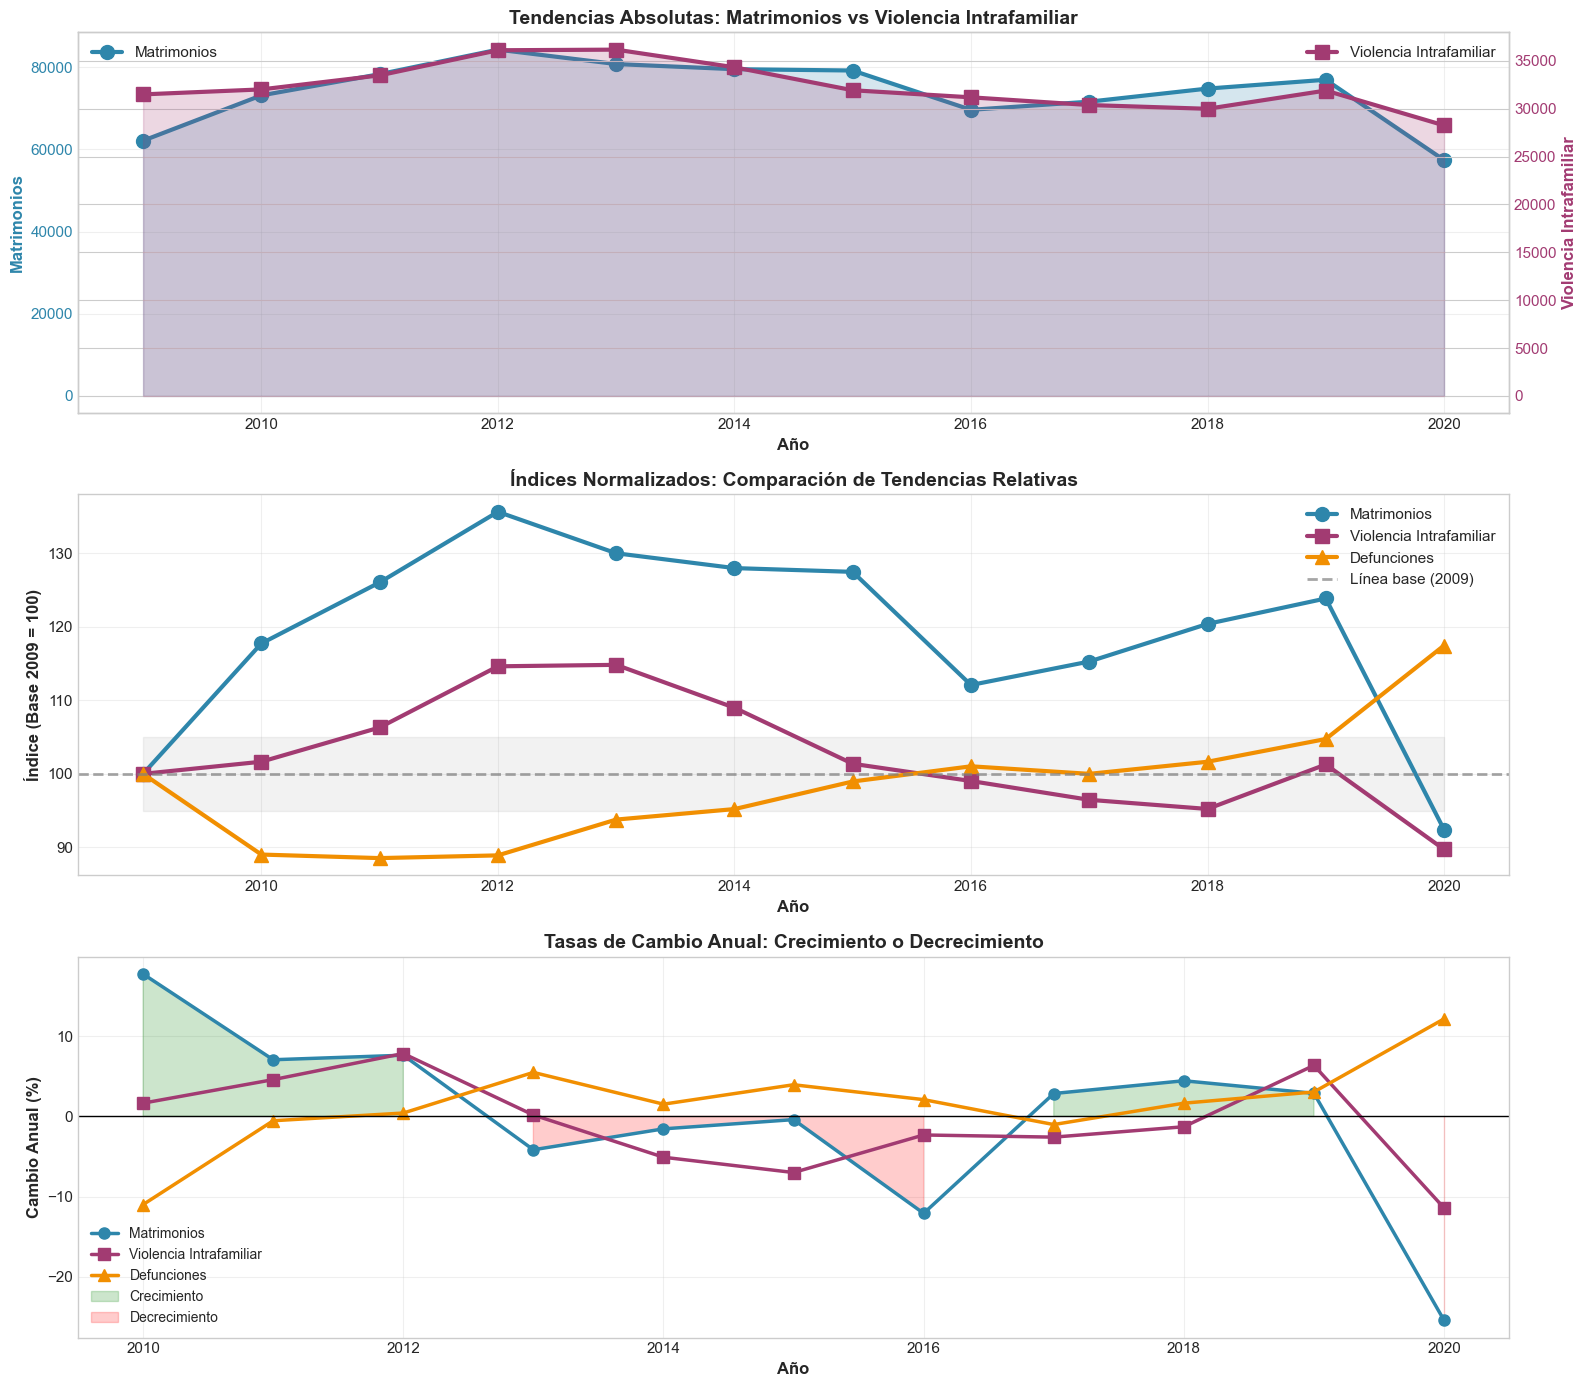


INTERPRETACIÓN:
  • Panel superior: Muestra escalas originales (difícil comparar directamente)
  • Panel medio: Normaliza para facilitar comparación de tendencias
  • Panel inferior: Revela aceleraciones y desaceleraciones en cada fenómeno


In [64]:
print("="*80)
print("GRÁFICO EXPLORATORIO 2: EVOLUCIÓN TEMPORAL INTEGRADA")
print("="*80)

# Crear dataset de tendencias normalizadas
fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Gráfico 1: Tendencias absolutas
años = df_tendencias['Año']
axes[0].plot(años, df_tendencias['Matrimonios'], marker='o', linewidth=3, markersize=10, 
            label='Matrimonios', color='#2E86AB')
axes[0].fill_between(años, df_tendencias['Matrimonios'], alpha=0.2, color='#2E86AB')

ax2 = axes[0].twinx()
ax2.plot(años, df_tendencias['Violencia_Intrafamiliar'], marker='s', linewidth=3, markersize=10, 
        label='Violencia Intrafamiliar', color='#A23B72')
ax2.fill_between(años, df_tendencias['Violencia_Intrafamiliar'], alpha=0.2, color='#A23B72')

axes[0].set_xlabel('Año', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Matrimonios', fontsize=12, fontweight='bold', color='#2E86AB')
ax2.set_ylabel('Violencia Intrafamiliar', fontsize=12, fontweight='bold', color='#A23B72')
axes[0].set_title('Tendencias Absolutas: Matrimonios vs Violencia Intrafamiliar', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='y', labelcolor='#2E86AB')
ax2.tick_params(axis='y', labelcolor='#A23B72')
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='upper left')
ax2.legend(loc='upper right')

# Gráfico 2: Índices normalizados (base 2009 = 100)
axes[1].plot(años, df_normalizado['Matrimonios_Idx'], marker='o', linewidth=3, markersize=10, 
            label='Matrimonios', color='#2E86AB')
axes[1].plot(años, df_normalizado['Violencia_Idx'], marker='s', linewidth=3, markersize=10, 
            label='Violencia Intrafamiliar', color='#A23B72')
axes[1].plot(años, df_normalizado['Defunciones_Idx'], marker='^', linewidth=3, markersize=10, 
            label='Defunciones', color='#F18F01')
axes[1].axhline(y=100, color='gray', linestyle='--', linewidth=2, alpha=0.7, label='Línea base (2009)')
axes[1].fill_between(años, 95, 105, alpha=0.1, color='gray')

axes[1].set_xlabel('Año', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Índice (Base 2009 = 100)', fontsize=12, fontweight='bold')
axes[1].set_title('Índices Normalizados: Comparación de Tendencias Relativas', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11, loc='best')
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Tasas de cambio anual (%)
cambios_matrimonios = df_tendencias['Matrimonios'].pct_change() * 100
cambios_violencia = df_tendencias['Violencia_Intrafamiliar'].pct_change() * 100
cambios_defunciones = df_tendencias['Defunciones_Total'].pct_change() * 100

axes[2].plot(años[1:], cambios_matrimonios[1:], marker='o', linewidth=2.5, markersize=8, 
            label='Matrimonios', color='#2E86AB')
axes[2].plot(años[1:], cambios_violencia[1:], marker='s', linewidth=2.5, markersize=8, 
            label='Violencia Intrafamiliar', color='#A23B72')
axes[2].plot(años[1:], cambios_defunciones[1:], marker='^', linewidth=2.5, markersize=8, 
            label='Defunciones', color='#F18F01')
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[2].fill_between(años[1:], 0, cambios_matrimonios[1:], where=(cambios_matrimonios[1:]>=0), 
                    alpha=0.2, color='green', label='Crecimiento')
axes[2].fill_between(años[1:], 0, cambios_matrimonios[1:], where=(cambios_matrimonios[1:]<0), 
                    alpha=0.2, color='red', label='Decrecimiento')

axes[2].set_xlabel('Año', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Cambio Anual (%)', fontsize=12, fontweight='bold')
axes[2].set_title('Tasas de Cambio Anual: Crecimiento o Decrecimiento', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=10, loc='best')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
guardar_figura("evolucion_temporal_integrada", "Evolucion temporal integrada con indices normalizados y tasas de cambio")
plt.show()

print("\nINTERPRETACIÓN:")
print("  • Panel superior: Muestra escalas originales (difícil comparar directamente)")
print("  • Panel medio: Normaliza para facilitar comparación de tendencias")
print("  • Panel inferior: Revela aceleraciones y desaceleraciones en cada fenómeno")

## E.3 Distribuciones Geográficas: Mapas de Calor

GRÁFICO EXPLORATORIO 3: DISTRIBUCIONES GEOGRÁFICAS
  Nota: No se pudo calcular línea de tendencia (datos insuficientes o convergencia fallida)
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
Imagen guardada: 15_distribuciones_geograficas_heatmap.png - Distribuciones geograficas y mapa de calor por departamento
Imagen guardada: 15_distribuciones_geograficas_heatmap.png - Distribuciones geograficas y mapa de calor por departamento


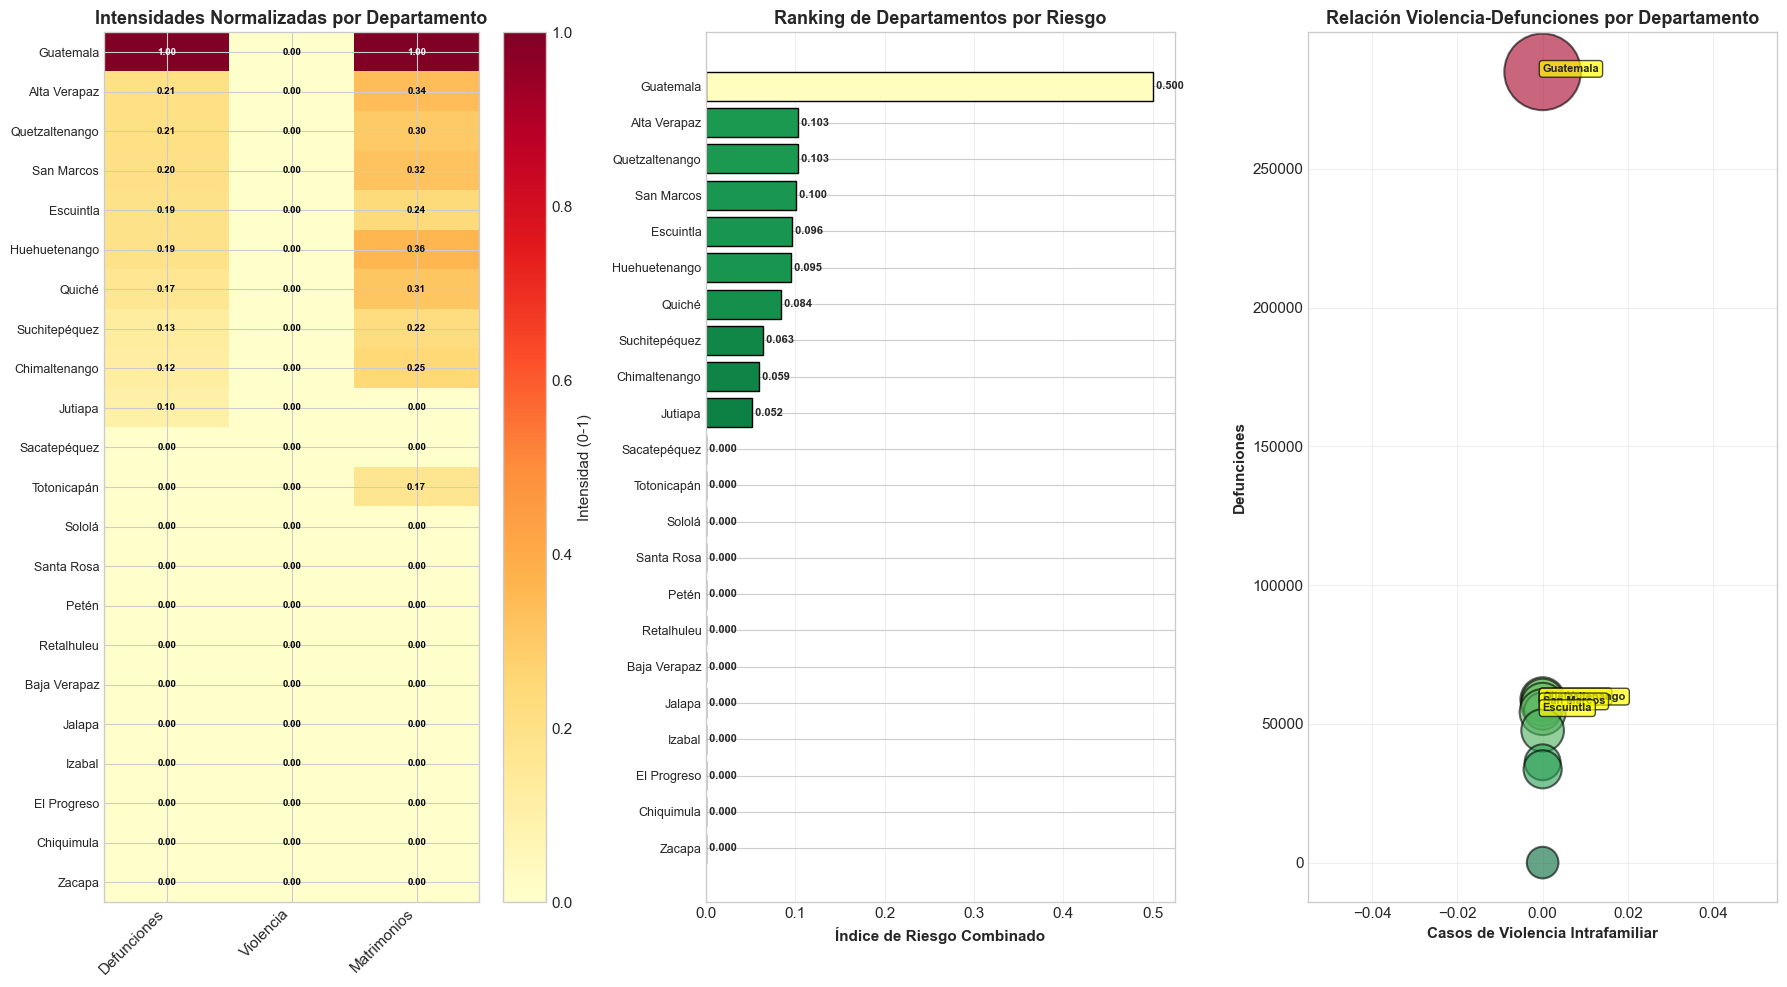


Top 5 Departamentos de Mayor Riesgo:
  Guatemala           : Índice = 0.500
  Alta Verapaz        : Índice = 0.103
  Quetzaltenango      : Índice = 0.103
  San Marcos          : Índice = 0.100
  Escuintla           : Índice = 0.096
  • El tamaño de burbujas representa la población relativa (matrimonios)

INTERPRETACIÓN:
  • El scatter plot muestra correlación entre variables
  • El mapa de calor revela concentraciones geográficas
  • El índice de riesgo combina violencia y defunciones


In [65]:
print("="*80)
print("GRÁFICO EXPLORATORIO 3: DISTRIBUCIONES GEOGRÁFICAS")
print("="*80)

if col_depto_def and col_depto_vio and col_depto_mat:
    # Crear matriz de datos por departamento
    deptos_list = sorted(departamentos_map.values())
    
    # Crear DataFrame consolidado
    df_geo_heatmap = pd.DataFrame({
        'Departamento': deptos_list  
    })
    
    # Agregar datos de cada dataset
    for depto in deptos_list:
        df_geo_heatmap.loc[df_geo_heatmap['Departamento'] == depto, 'Defunciones'] = defunciones_depto.get(depto, 0)
        df_geo_heatmap.loc[df_geo_heatmap['Departamento'] == depto, 'Violencia'] = violencia_depto.get(depto, 0)
        df_geo_heatmap.loc[df_geo_heatmap['Departamento'] == depto, 'Matrimonios'] = matrimonios_depto.get(depto, 0)
    
    # Calcular intensidades relativas (normalizar a escala 0-1)
    for col in ['Defunciones', 'Violencia', 'Matrimonios']:
        max_val = df_geo_heatmap[col].max()
        df_geo_heatmap[f'{col}_norm'] = df_geo_heatmap[col] / max_val if max_val > 0 else 0
    
    # Calcular índice de riesgo combinado
    df_geo_heatmap['Indice_Riesgo'] = (df_geo_heatmap['Violencia_norm'] + df_geo_heatmap['Defunciones_norm']) / 2
    
    # Ordenar por índice de riesgo
    df_geo_heatmap = df_geo_heatmap.sort_values('Indice_Riesgo', ascending=False)
    
    # Crear visualización de estilo mapa de calor
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))
    
    # Preparar datos para heatmap
    data_matrix = df_geo_heatmap[['Defunciones_norm', 'Violencia_norm', 'Matrimonios_norm']].values
    
    # Heatmap 1: Intensidades normalizadas
    im1 = axes[0].imshow(data_matrix, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)
    axes[0].set_yticks(range(len(df_geo_heatmap)))
    axes[0].set_yticklabels(df_geo_heatmap['Departamento'], fontsize=9)
    axes[0].set_xticks([0, 1, 2])
    axes[0].set_xticklabels(['Defunciones', 'Violencia', 'Matrimonios'], rotation=45, ha='right')
    axes[0].set_title('Intensidades Normalizadas por Departamento', fontsize=13, fontweight='bold')
    plt.colorbar(im1, ax=axes[0], label='Intensidad (0-1)')
    
    # Añadir valores en las celdas
    for i in range(len(df_geo_heatmap)):
        for j in range(3):
            text = axes[0].text(j, i, f'{data_matrix[i, j]:.2f}',
                              ha="center", va="center", color="black" if data_matrix[i, j] < 0.5 else "white",
                              fontsize=7, fontweight='bold')
    
    # Gráfico 2: Índice de riesgo
    colors_riesgo = plt.cm.RdYlGn_r(df_geo_heatmap['Indice_Riesgo'])
    axes[1].barh(range(len(df_geo_heatmap)), df_geo_heatmap['Indice_Riesgo'], color=colors_riesgo, edgecolor='black')
    axes[1].set_yticks(range(len(df_geo_heatmap)))
    axes[1].set_yticklabels(df_geo_heatmap['Departamento'], fontsize=9)
    axes[1].set_xlabel('Índice de Riesgo Combinado', fontsize=11, fontweight='bold')
    axes[1].set_title('Ranking de Departamentos por Riesgo', fontsize=13, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].invert_yaxis()
    
    # Añadir valores
    for i, v in enumerate(df_geo_heatmap['Indice_Riesgo']):
        axes[1].text(v, i, f' {v:.3f}', va='center', fontsize=8, fontweight='bold')
    
    # Gráfico 3: Scatter plot Violencia vs Defunciones
    axes[2].scatter(df_geo_heatmap['Violencia'], df_geo_heatmap['Defunciones'], 
                   s=df_geo_heatmap['Matrimonios']/50, alpha=0.6, c=df_geo_heatmap['Indice_Riesgo'], 
                   cmap='RdYlGn_r', edgecolors='black', linewidth=1.5)
    
    # Añadir nombres de departamentos a puntos extremos
    top_5_riesgo = df_geo_heatmap.head(5)
    for idx, row in top_5_riesgo.iterrows():
        axes[2].annotate(row['Departamento'], 
                        (row['Violencia'], row['Defunciones']),
                        fontsize=8, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    axes[2].set_xlabel('Casos de Violencia Intrafamiliar', fontsize=11, fontweight='bold')
    axes[2].set_ylabel('Defunciones', fontsize=11, fontweight='bold')
    axes[2].set_title('Relación Violencia-Defunciones por Departamento', fontsize=13, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    
    # Añadir línea de tendencia (con manejo de posibles errores de convergencia)
    try:
        datos_validos = df_geo_heatmap[['Violencia', 'Defunciones']].dropna()
        if len(datos_validos) > 1:
            z = np.polyfit(datos_validos['Violencia'], datos_validos['Defunciones'], 1)
            p = np.poly1d(z)
            axes[2].plot(datos_validos['Violencia'], p(datos_validos['Violencia']), 
                        "r--", linewidth=2, alpha=0.8, label=f'Tendencia: y={z[0]:.2f}x+{z[1]:.0f}')
            axes[2].legend()
    except (np.linalg.LinAlgError, ValueError) as e:
        print(f"  Nota: No se pudo calcular línea de tendencia (datos insuficientes o convergencia fallida)")
        axes[2].legend()
    
    plt.tight_layout()
    guardar_figura("distribuciones_geograficas_heatmap", "Distribuciones geograficas y mapa de calor por departamento")
    plt.show()
    
    print("\nTop 5 Departamentos de Mayor Riesgo:")
    for idx, row in df_geo_heatmap.head(5).iterrows():
        print(f"  {row['Departamento']:20s}: Índice = {row['Indice_Riesgo']:.3f}")
    
    print("  • El tamaño de burbujas representa la población relativa (matrimonios)")
    
    print("\nINTERPRETACIÓN:")
    print("  • El scatter plot muestra correlación entre variables")
    print("  • El mapa de calor revela concentraciones geográficas")
    print("  • El índice de riesgo combina violencia y defunciones")

## E.4 Análisis Demográfico Multivariado

GRÁFICO EXPLORATORIO 4: PERFILES DEMOGRÁFICOS
Imagen guardada: 16_piramide_demografica_violencia.png - Piramide demografica y distribucion de edad en violencia intrafamiliar
Imagen guardada: 16_piramide_demografica_violencia.png - Piramide demografica y distribucion de edad en violencia intrafamiliar


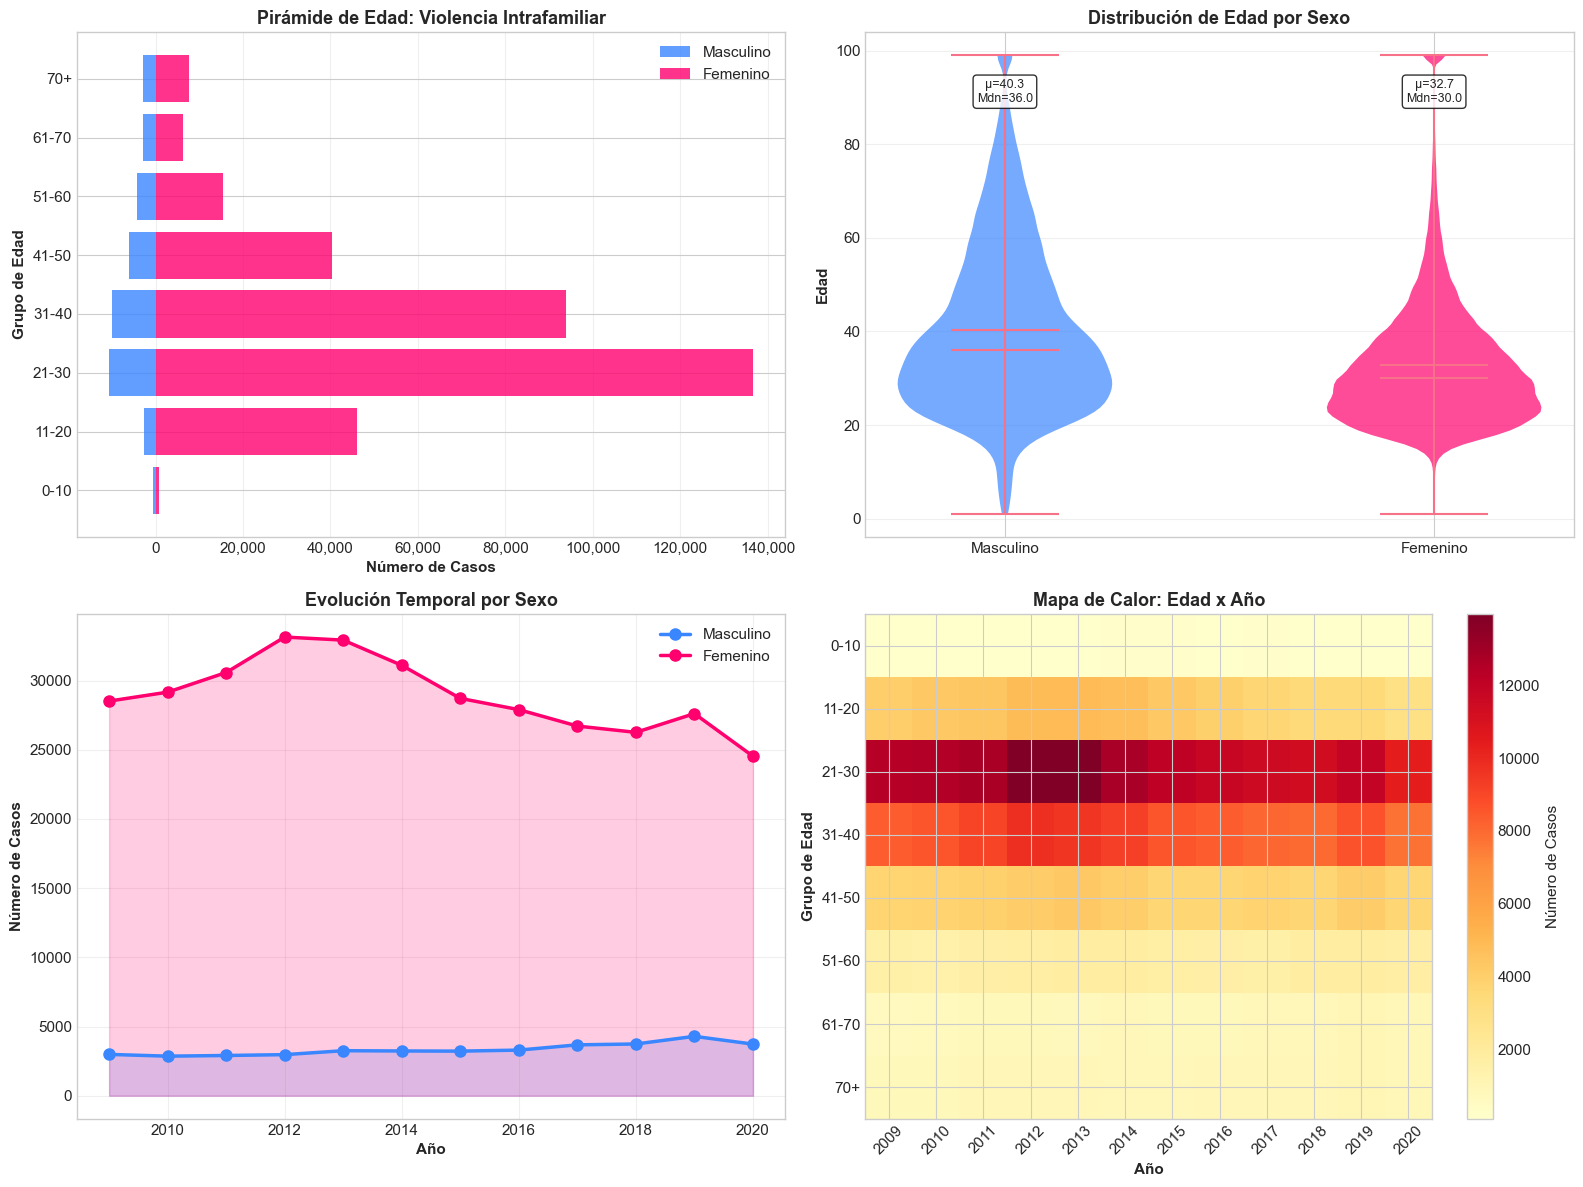


ESTADÍSTICAS DEMOGRÁFICAS:

Edad promedio por sexo:
          mean  median   std
VIC_SEXO                    
1.00     40.26   36.00 18.00
2.00     32.73   30.00 13.78

INTERPRETACIÓN:
  • La pirámide revela grupos de edad más afectados
  • El violin plot compara distribuciones de edad entre sexos
  • La evolución temporal muestra tendencias por sexo
  • El heatmap identifica patrones edad-tiempo


In [66]:
print("="*80)
print("GRÁFICO EXPLORATORIO 4: PERFILES DEMOGRÁFICOS")
print("="*80)

# Análisis de perfiles de edad y sexo
if len(cols_edad_vio) > 0 and len(cols_sexo_vio) > 0:
    
    edad_col = cols_edad_vio[0]
    sexo_col = cols_sexo_vio[0]
    
    # Crear pirámide poblacional de violencia
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Preparar datos
    df_vio_demo = df_violencia[[edad_col, sexo_col, 'ANIO']].dropna()
    df_vio_demo['grupo_edad'] = pd.cut(df_vio_demo[edad_col], 
                                        bins=[0, 10, 20, 30, 40, 50, 60, 70, 100],
                                        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])
    
    # Pirámide poblacional
    piramide = pd.crosstab(df_vio_demo['grupo_edad'], df_vio_demo[sexo_col])
    
    # Asumiendo que 1=Masculino, 2=Femenino
    if 1 in piramide.columns and 2 in piramide.columns:
        masculino = -piramide[1]  # Negativo para el lado izquierdo
        femenino = piramide[2]
        
        y_pos = np.arange(len(piramide))
        
        axes[0, 0].barh(y_pos, masculino, height=0.8, color='#3A86FF', alpha=0.8, label='Masculino')
        axes[0, 0].barh(y_pos, femenino, height=0.8, color='#FF006E', alpha=0.8, label='Femenino')
        axes[0, 0].set_yticks(y_pos)
        axes[0, 0].set_yticklabels(piramide.index)
        axes[0, 0].set_xlabel('Número de Casos', fontsize=11, fontweight='bold')
        axes[0, 0].set_ylabel('Grupo de Edad', fontsize=11, fontweight='bold')
        axes[0, 0].set_title('Pirámide de Edad: Violencia Intrafamiliar', fontsize=13, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(axis='x', alpha=0.3)
        
        # Ajustar etiquetas del eje x para mostrar valores absolutos
        ticks = axes[0, 0].get_xticks()
        axes[0, 0].set_xticklabels([f'{abs(int(x)):,}' for x in ticks])
    
    # Distribución de edad por sexo (violin plot)
    if 1 in df_vio_demo[sexo_col].unique() and 2 in df_vio_demo[sexo_col].unique():
        datos_m = df_vio_demo[df_vio_demo[sexo_col] == 1][edad_col]
        datos_f = df_vio_demo[df_vio_demo[sexo_col] == 2][edad_col]
        
        parts = axes[0, 1].violinplot([datos_m, datos_f], positions=[1, 2], showmeans=True, showmedians=True)
        for pc, color in zip(parts['bodies'], ['#3A86FF', '#FF006E']):
            pc.set_facecolor(color)
            pc.set_alpha(0.7)
        
        axes[0, 1].set_xticks([1, 2])
        axes[0, 1].set_xticklabels(['Masculino', 'Femenino'])
        axes[0, 1].set_ylabel('Edad', fontsize=11, fontweight='bold')
        axes[0, 1].set_title('Distribución de Edad por Sexo', fontsize=13, fontweight='bold')
        axes[0, 1].grid(axis='y', alpha=0.3)
        
        # Añadir estadísticas
        axes[0, 1].text(1, datos_m.max() * 0.9, f'μ={datos_m.mean():.1f}\nMdn={datos_m.median():.1f}',
                       ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=9)
        axes[0, 1].text(2, datos_f.max() * 0.9, f'μ={datos_f.mean():.1f}\nMdn={datos_f.median():.1f}',
                       ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=9)
    
    # Evolución temporal por sexo
    casos_por_año_sexo = pd.crosstab(df_vio_demo['ANIO'], df_vio_demo[sexo_col])
    
    if 1 in casos_por_año_sexo.columns and 2 in casos_por_año_sexo.columns:
        axes[1, 0].plot(casos_por_año_sexo.index, casos_por_año_sexo[1], 
                       marker='o', linewidth=2.5, markersize=8, label='Masculino', color='#3A86FF')
        axes[1, 0].plot(casos_por_año_sexo.index, casos_por_año_sexo[2], 
                       marker='o', linewidth=2.5, markersize=8, label='Femenino', color='#FF006E')
        axes[1, 0].fill_between(casos_por_año_sexo.index, casos_por_año_sexo[1], alpha=0.2, color='#3A86FF')
        axes[1, 0].fill_between(casos_por_año_sexo.index, casos_por_año_sexo[2], alpha=0.2, color='#FF006E')
        axes[1, 0].set_xlabel('Año', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel('Número de Casos', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('Evolución Temporal por Sexo', fontsize=13, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
    
    # Heatmap de edad x año
    heatmap_data = pd.crosstab(df_vio_demo['grupo_edad'], df_vio_demo['ANIO'])
    
    im = axes[1, 1].imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')
    axes[1, 1].set_yticks(range(len(heatmap_data.index)))
    axes[1, 1].set_yticklabels(heatmap_data.index)
    axes[1, 1].set_xticks(range(len(heatmap_data.columns)))
    axes[1, 1].set_xticklabels(heatmap_data.columns, rotation=45)
    axes[1, 1].set_xlabel('Año', fontsize=11, fontweight='bold')
    axes[1, 1].set_ylabel('Grupo de Edad', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Mapa de Calor: Edad x Año', fontsize=13, fontweight='bold')
    plt.colorbar(im, ax=axes[1, 1], label='Número de Casos')
    
    plt.tight_layout()
    guardar_figura("piramide_demografica_violencia", "Piramide demografica y distribucion de edad en violencia intrafamiliar")
    plt.show()
    
    print("\nESTADÍSTICAS DEMOGRÁFICAS:")
    print(f"\nEdad promedio por sexo:")
    print(df_vio_demo.groupby(sexo_col)[edad_col].agg(['mean', 'median', 'std']).round(2))
    
    print("\nINTERPRETACIÓN:")
    print("  • La pirámide revela grupos de edad más afectados")
    print("  • El violin plot compara distribuciones de edad entre sexos")
    print("  • La evolución temporal muestra tendencias por sexo")
    print("  • El heatmap identifica patrones edad-tiempo")
else:
    print("⚠ Datos demográficos insuficientes para análisis completo")

## E.5 Matriz de Correlaciones y Relaciones entre Variables

GRÁFICO EXPLORATORIO 5: MATRIZ DE CORRELACIONES
Imagen guardada: 17_matriz_correlaciones_variables.png - Matriz de correlaciones y relaciones entre variables
Imagen guardada: 17_matriz_correlaciones_variables.png - Matriz de correlaciones y relaciones entre variables


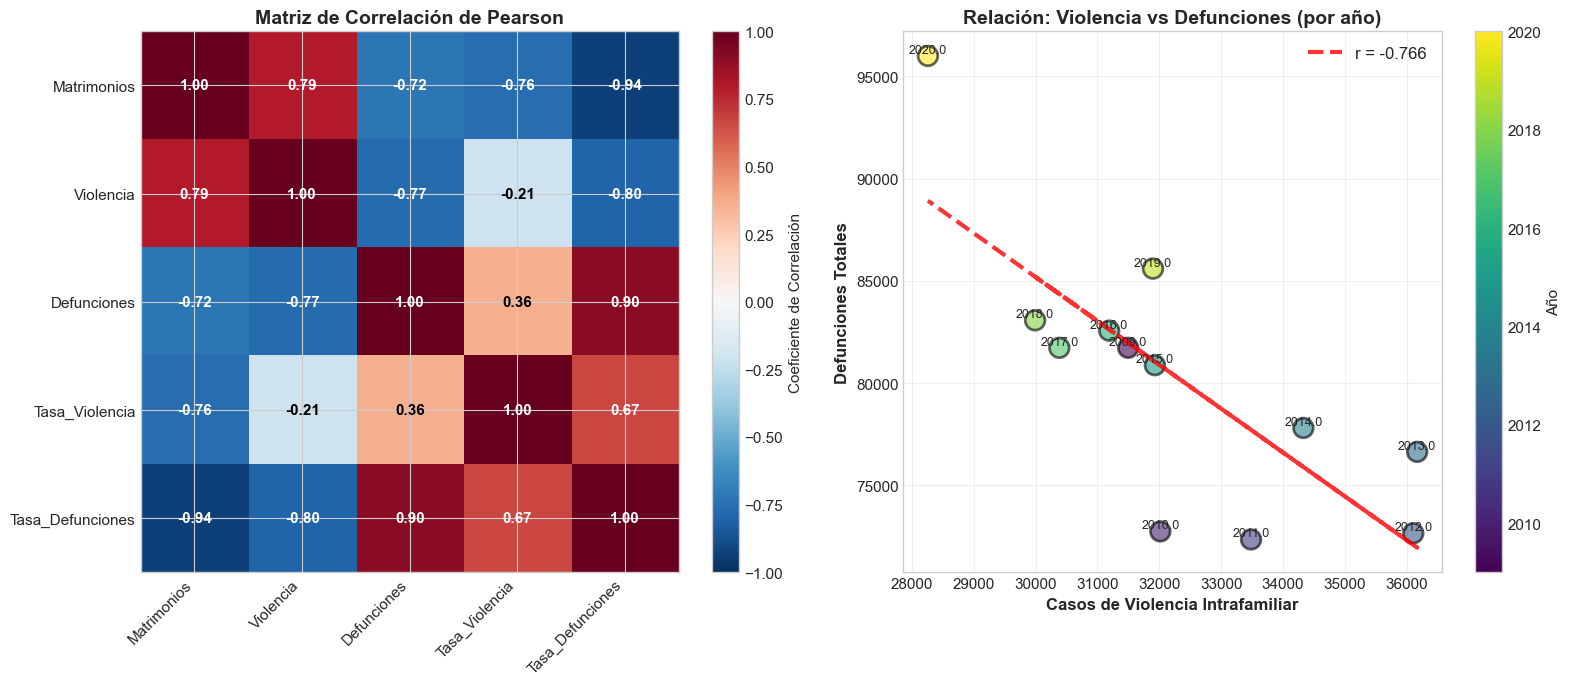


ANÁLISIS DE CORRELACIONES:

Correlaciones más fuertes (|r| > 0.5):
  • Matrimonios ↔ Violencia: r = 0.791
  • Matrimonios ↔ Defunciones: r = -0.719
  • Matrimonios ↔ Tasa_Violencia: r = -0.761
  • Matrimonios ↔ Tasa_Defunciones: r = -0.937
  • Violencia ↔ Defunciones: r = -0.766
  • Violencia ↔ Tasa_Defunciones: r = -0.798
  • Defunciones ↔ Tasa_Defunciones: r = 0.901
  • Tasa_Violencia ↔ Tasa_Defunciones: r = 0.666

INTERPRETACIÓN:
  • r cerca de +1: Correlación positiva fuerte
  • r cerca de -1: Correlación negativa fuerte
  • La correlación NO implica causalidad
  • r cerca de 0: No hay correlación lineal


In [67]:
print("="*80)
print("GRÁFICO EXPLORATORIO 5: MATRIZ DE CORRELACIONES")
print("="*80)

# Crear dataset agregado por año para análisis de correlaciones
df_correlaciones = pd.DataFrame({
    'Año': range(2009, 2021),
    'Matrimonios': [matrimonios_por_año.get(año, 0) for año in range(2009, 2021)],
    'Violencia': [violencia_por_año.get(año, 0) for año in range(2009, 2021)],
    'Defunciones': [defunciones_por_año.get(año, 0) for año in range(2009, 2021)]
})

# Calcular tasas (por cada 10,000 matrimonios como proxy de población)
df_correlaciones['Tasa_Violencia'] = (df_correlaciones['Violencia'] / df_correlaciones['Matrimonios'] * 10000)
df_correlaciones['Tasa_Defunciones'] = (df_correlaciones['Defunciones'] / df_correlaciones['Matrimonios'] * 10000)

# Matriz de correlación
correlaciones = df_correlaciones[['Matrimonios', 'Violencia', 'Defunciones', 'Tasa_Violencia', 'Tasa_Defunciones']].corr()

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Heatmap de correlaciones
im = axes[0].imshow(correlaciones, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[0].set_xticks(range(len(correlaciones.columns)))
axes[0].set_yticks(range(len(correlaciones.columns)))
axes[0].set_xticklabels(correlaciones.columns, rotation=45, ha='right')
axes[0].set_yticklabels(correlaciones.columns)
axes[0].set_title('Matriz de Correlación de Pearson', fontsize=14, fontweight='bold')

# Añadir valores en las celdas
for i in range(len(correlaciones)):
    for j in range(len(correlaciones.columns)):
        text = axes[0].text(j, i, f'{correlaciones.iloc[i, j]:.2f}',
                          ha="center", va="center", 
                          color="white" if abs(correlaciones.iloc[i, j]) > 0.5 else "black",
                          fontsize=11, fontweight='bold')

plt.colorbar(im, ax=axes[0], label='Coeficiente de Correlación')

# Scatter plot matrix (solo variables principales)
from itertools import combinations

variables_scatter = ['Violencia', 'Defunciones', 'Tasa_Violencia']
n_vars = len(variables_scatter)

# Grid de scatter plots
scatter_grid = []
for i, var1 in enumerate(variables_scatter):
    for j, var2 in enumerate(variables_scatter):
        if i < j:  # Solo triángulo superior
            scatter_grid.append((var1, var2))

# Seleccionar el par más correlacionado
max_corr = correlaciones.loc['Violencia', 'Defunciones']
axes[1].scatter(df_correlaciones['Violencia'], df_correlaciones['Defunciones'], 
               s=200, alpha=0.6, c=df_correlaciones['Año'], cmap='viridis', 
               edgecolors='black', linewidth=2)

# Línea de regresión (con manejo de posibles errores)
try:
    z = np.polyfit(df_correlaciones['Violencia'], df_correlaciones['Defunciones'], 1)
    p = np.poly1d(z)
    axes[1].plot(df_correlaciones['Violencia'], p(df_correlaciones['Violencia']), 
                "r--", linewidth=3, alpha=0.8, label=f'r = {max_corr:.3f}')
except (np.linalg.LinAlgError, ValueError):
    axes[1].plot([], [], "r--", linewidth=3, alpha=0.8, label=f'r = {max_corr:.3f}')

axes[1].set_xlabel('Casos de Violencia Intrafamiliar', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Defunciones Totales', fontsize=12, fontweight='bold')
axes[1].set_title('Relación: Violencia vs Defunciones (por año)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=12)
axes[1].grid(True, alpha=0.3)

# Añadir etiquetas de año
for idx, row in df_correlaciones.iterrows():
    axes[1].annotate(str(row['Año']), 
                    (row['Violencia'], row['Defunciones']),
                    fontsize=9, ha='center', va='bottom')

plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', 
             norm=plt.Normalize(vmin=df_correlaciones['Año'].min(), 
                               vmax=df_correlaciones['Año'].max())), 
             ax=axes[1], label='Año')

plt.tight_layout()
guardar_figura("matriz_correlaciones_variables", "Matriz de correlaciones y relaciones entre variables")
plt.show()

print("\nANÁLISIS DE CORRELACIONES:")
print("="*60)
print("\nCorrelaciones más fuertes (|r| > 0.5):")
for i in range(len(correlaciones)):
    for j in range(i+1, len(correlaciones)):
        valor = correlaciones.iloc[i, j]
        if abs(valor) > 0.5:
            var1 = correlaciones.index[i]
            var2 = correlaciones.columns[j]
            print(f"  • {var1} ↔ {var2}: r = {valor:.3f}")

print("\nINTERPRETACIÓN:")
print("  • r cerca de +1: Correlación positiva fuerte")
print("  • r cerca de -1: Correlación negativa fuerte")  
print("  • La correlación NO implica causalidad")
print("  • r cerca de 0: No hay correlación lineal")

---

# INCISO F: Clustering Basado en Variables Clave Sociodemográficas

## Enfoque: Perfiles de Departamentos usando Variables Clave de los 3 Datasets

A diferencia del Inciso F anterior (que agrupa departamentos por **dinámicas temporales**), este análisis agrupa departamentos por sus **perfiles sociodemográficos**, utilizando las **variables clave** identificadas en el análisis exploratorio de cada dataset.

### Variables Clave Utilizadas

**Violencia Intrafamiliar:**
- `VIC_SEXO` → % de víctimas mujeres
- `VIC_EDAD` → Edad promedio de víctimas
- `VIC_EST_CIV` → % casadas/unidas, % solteras
- `VIC_REL_AGR` → % agresión de cónyuge, % de conviviente
- `VIC_ALFAB` → % analfabetas
- `VIC_GRUPET` → % indígena
- `AGR_SEXO` → % agresores hombres

**Defunciones:**
- `Sexo` → % defunciones de mujeres
- `Edadif` → Edad promedio al morir
- `Ecidif` → % casados/unidos

**Matrimonios:**
- `EDADHOM/Edadhom` → Edad promedio del hombre
- `EDADMUJ/Edadmuj` → Edad promedio de la mujer
- Diferencia de edad promedio
- Total de matrimonios por departamento

### Metodología

1. **Agregar por departamento** cada variable clave (porcentajes, promedios)
2. **Unificar los 3 datasets** en una sola tabla por departamento
3. **Estandarizar** para hacer comparables las variables
4. **Método del Codo + Silueta** para determinar K óptimo
5. **K-Means** para identificar clusters de departamentos con perfiles similares
6. **PCA** para visualización 2D

### Resultado Esperado

Identificar grupos de departamentos que comparten perfiles similares en cuanto a:
- Características de víctimas de violencia intrafamiliar
- Patrones de defunción
- Características de matrimonios

---

In [68]:
print("="*100)
print("INCISO F (ALTERNATIVO): CLUSTERING POR VARIABLES CLAVE SOCIODEMOGRÁFICAS")
print("="*100)
print("\nOBJETIVO: Agrupar DEPARTAMENTOS por perfiles sociodemográficos")
print("ENFOQUE: Usar las variables clave de los 3 datasets (Violencia, Defunciones, Matrimonios)")
print("="*100)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ============================================================================
# MAPEO DE DEPARTAMENTOS (codigo -> nombre)
# ============================================================================
departamentos_map = {
    1: 'Guatemala', 2: 'El Progreso', 3: 'Sacatepéquez', 4: 'Chimaltenango',
    5: 'Escuintla', 6: 'Santa Rosa', 7: 'Sololá', 8: 'Totonicapán',
    9: 'Quetzaltenango', 10: 'Suchitepéquez', 11: 'Retalhuleu', 12: 'San Marcos',
    13: 'Huehuetenango', 14: 'Quiché', 15: 'Baja Verapaz', 16: 'Alta Verapaz',
    17: 'Petén', 18: 'Izabal', 19: 'Zacapa', 20: 'Chiquimula',
    21: 'Jalapa', 22: 'Jutiapa'
}

# ============================================================================
# PASO 1: EXTRAER FEATURES DE VIOLENCIA INTRAFAMILIAR POR DEPARTAMENTO
# ============================================================================
print("\n" + "="*100)
print("PASO 1: EXTRACCIÓN DE FEATURES - VIOLENCIA INTRAFAMILIAR")
print("="*100)

# Identificar columna de departamento en violencia
col_depto_vio = 'DEPTO_MCPIO'

# Extraer codigo de departamento (primeros 2 digitos del codigo depto_mcpio)
df_violencia['DEPTO_COD'] = (df_violencia[col_depto_vio] // 100).astype(int)

# Filtrar solo departamentos validos (1-22)
df_vio_valid = df_violencia[df_violencia['DEPTO_COD'].between(1, 22)].copy()

print(f"Registros válidos de violencia: {len(df_vio_valid):,} de {len(df_violencia):,}")

# --- Feature 1: % de víctimas mujeres ---
if 'VIC_SEXO' in df_vio_valid.columns:
    vio_pct_mujeres = df_vio_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['VIC_SEXO'] == 2).sum() / len(x) * 100
    ).rename('VIO_Pct_Victimas_Mujeres')
    print("  ✓ VIO_Pct_Victimas_Mujeres")

# --- Feature 2: Edad promedio de víctimas (excluyendo 99=ignorado) ---
if 'VIC_EDAD' in df_vio_valid.columns:
    vio_edad_prom = df_vio_valid[df_vio_valid['VIC_EDAD'] < 99].groupby('DEPTO_COD')['VIC_EDAD'].mean().rename('VIO_Edad_Promedio_Victima')
    print("  ✓ VIO_Edad_Promedio_Victima")

# --- Feature 3: % de víctimas casadas/unidas ---
if 'VIC_EST_CIV' in df_vio_valid.columns:
    vio_pct_casadas = df_vio_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['VIC_EST_CIV'].isin([2, 3])).sum() / len(x) * 100  # 2=casada, 3=unida
    ).rename('VIO_Pct_Casadas_Unidas')
    print("  ✓ VIO_Pct_Casadas_Unidas")

# --- Feature 4: % de agresión por cónyuge/conviviente ---
if 'VIC_REL_AGR' in df_vio_valid.columns:
    vio_pct_conyuge = df_vio_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['VIC_REL_AGR'].isin([1, 2])).sum() / len(x) * 100  # 1=esposo/a, 2=conviviente
    ).rename('VIO_Pct_Agresor_Pareja')
    print("  ✓ VIO_Pct_Agresor_Pareja")

# --- Feature 5: % de víctimas analfabetas ---
if 'VIC_ALFAB' in df_vio_valid.columns:
    vio_pct_analfab = df_vio_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['VIC_ALFAB'] == 2).sum() / len(x) * 100  # 2=analfabeta
    ).rename('VIO_Pct_Analfabetas')
    print("  ✓ VIO_Pct_Analfabetas")

# --- Feature 6: % de víctimas indígenas ---
if 'VIC_GRUPET' in df_vio_valid.columns:
    vio_pct_indigena = df_vio_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['VIC_GRUPET'] == 1).sum() / len(x) * 100  # 1=indígena
    ).rename('VIO_Pct_Indigena')
    print("  ✓ VIO_Pct_Indigena")

# --- Feature 7: % de agresores hombres ---
if 'AGR_SEXO' in df_vio_valid.columns:
    vio_pct_agr_hombres = df_vio_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['AGR_SEXO'] == 1).sum() / len(x) * 100  # 1=hombre
    ).rename('VIO_Pct_Agresor_Hombre')
    print("  ✓ VIO_Pct_Agresor_Hombre")

# --- Feature 8: Total de casos de violencia ---
vio_total_casos = df_vio_valid.groupby('DEPTO_COD').size().rename('VIO_Total_Casos')
print("  ✓ VIO_Total_Casos")

# --- Feature 9: Tasa de casos por año (promedio) ---
años_violencia = df_vio_valid['ANIO'].nunique() if 'ANIO' in df_vio_valid.columns else 12
vio_casos_por_año = (vio_total_casos / años_violencia).rename('VIO_Casos_Promedio_Anual')
print("  ✓ VIO_Casos_Promedio_Anual")

# CONSOLIDAR FEATURES DE VIOLENCIA
df_features_vio = pd.concat([
    vio_pct_mujeres, vio_edad_prom, vio_pct_casadas, 
    vio_pct_conyuge, vio_pct_analfab, vio_pct_indigena,
    vio_pct_agr_hombres, vio_total_casos, vio_casos_por_año
], axis=1)

df_features_vio.index.name = 'DEPTO_COD'

print(f"\n  Features de Violencia extraídas: {df_features_vio.shape[1]} variables para {df_features_vio.shape[0]} departamentos")
print(f"  Variables: {df_features_vio.columns.tolist()}")
guardar_tabla(df_features_vio.round(2), "tabla_features_violencia", "Tabla de features extraídas de violencia intrafamiliar por departamento")
display(df_features_vio.round(2))

INCISO F (ALTERNATIVO): CLUSTERING POR VARIABLES CLAVE SOCIODEMOGRÁFICAS

OBJETIVO: Agrupar DEPARTAMENTOS por perfiles sociodemográficos
ENFOQUE: Usar las variables clave de los 3 datasets (Violencia, Defunciones, Matrimonios)

PASO 1: EXTRACCIÓN DE FEATURES - VIOLENCIA INTRAFAMILIAR
Registros válidos de violencia: 387,257 de 387,257
  ✓ VIO_Pct_Victimas_Mujeres
  ✓ VIO_Edad_Promedio_Victima
  ✓ VIO_Pct_Casadas_Unidas
  ✓ VIO_Pct_Agresor_Pareja
  ✓ VIO_Pct_Analfabetas
Registros válidos de violencia: 387,257 de 387,257
  ✓ VIO_Pct_Victimas_Mujeres
  ✓ VIO_Edad_Promedio_Victima
  ✓ VIO_Pct_Casadas_Unidas
  ✓ VIO_Pct_Agresor_Pareja
  ✓ VIO_Pct_Analfabetas
  ✓ VIO_Pct_Indigena
  ✓ VIO_Pct_Agresor_Hombre
  ✓ VIO_Total_Casos
  ✓ VIO_Casos_Promedio_Anual

  Features de Violencia extraídas: 9 variables para 22 departamentos
  Variables: ['VIO_Pct_Victimas_Mujeres', 'VIO_Edad_Promedio_Victima', 'VIO_Pct_Casadas_Unidas', 'VIO_Pct_Agresor_Pareja', 'VIO_Pct_Analfabetas', 'VIO_Pct_Indigena', 'VIO_P

,VIO_Pct_Victimas_Mujeres,VIO_Edad_Promedio_Victima,VIO_Pct_Casadas_Unidas,VIO_Pct_Agresor_Pareja,VIO_Pct_Analfabetas,VIO_Pct_Indigena,VIO_Pct_Agresor_Hombre,VIO_Total_Casos,VIO_Casos_Promedio_Anual
DEPTO_COD,,,,,,,,,
1,90.18,33.59,62.22,60.83,5.23,82.70,87.53,70558,5879.83
2,83.57,33.49,54.20,52.99,13.97,93.17,79.00,12024,1002.00
3,89.86,32.69,66.09,65.66,11.61,55.99,87.38,18520,1543.33
4,90.41,33.19,77.53,69.91,14.71,30.40,87.68,21181,1765.08
5,92.36,30.51,79.20,70.00,11.71,77.58,89.81,10491,874.25
6,91.06,32.19,55.65,61.09,13.19,87.03,87.39,13550,1129.17
7,88.53,33.70,67.26,64.21,37.75,6.13,87.11,8858,738.17
8,87.77,32.50,80.82,79.04,27.82,3.96,84.93,6470,539.17
9,93.07,32.22,77.32,75.69,15.52,40.93,91.29,20993,1749.42


In [69]:
# ============================================================================
# PASO 2: EXTRAER FEATURES DE DEFUNCIONES POR DEPARTAMENTO
# ============================================================================
print("="*100)
print("PASO 2: EXTRACCIÓN DE FEATURES - DEFUNCIONES")
print("="*100)

# Identificar columna de departamento en defunciones
# Usar Depocu (depto de ocurrencia) o Depreg (depto de registro)
col_depto_def = None
for col in ['Depocu', 'DEPOCU', 'Depreg', 'DEPREG']:
    if col in df_defunciones.columns:
        col_depto_def = col
        break

print(f"Columna de departamento usada: {col_depto_def}")

# Filtrar departamentos válidos
df_def_valid = df_defunciones[df_defunciones[col_depto_def].between(1, 22)].copy()
df_def_valid['DEPTO_COD'] = df_def_valid[col_depto_def].astype(int)

print(f"Registros válidos de defunciones: {len(df_def_valid):,} de {len(df_defunciones):,}")

# --- Feature 1: % de defunciones de mujeres ---
if 'Sexo' in df_def_valid.columns:
    def_pct_mujeres = df_def_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['Sexo'] == 2).sum() / len(x) * 100
    ).rename('DEF_Pct_Mujeres')
    print("  ✓ DEF_Pct_Mujeres")

# --- Feature 2: Edad promedio al morir ---
if 'Edadif' in df_def_valid.columns:
    def_edad_prom = df_def_valid[df_def_valid['Edadif'].between(0, 120)].groupby('DEPTO_COD')['Edadif'].mean().rename('DEF_Edad_Promedio')
    print("  ✓ DEF_Edad_Promedio")

# --- Feature 3: % de defunciones de casados/unidos ---
if 'Ecidif' in df_def_valid.columns:
    def_pct_casados = df_def_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['Ecidif'].isin([2, 3])).sum() / len(x) * 100  # 2=casado, 3=unido
    ).rename('DEF_Pct_Casados_Unidos')
    print("  ✓ DEF_Pct_Casados_Unidos")

# --- Feature 4: Total de defunciones ---
def_total = df_def_valid.groupby('DEPTO_COD').size().rename('DEF_Total')
print("  ✓ DEF_Total")

# --- Feature 5: Defunciones promedio por año ---
años_defunciones = df_def_valid['ANIO'].nunique() if 'ANIO' in df_def_valid.columns else 12
def_promedio_anual = (def_total / años_defunciones).rename('DEF_Promedio_Anual')
print("  ✓ DEF_Promedio_Anual")

# CONSOLIDAR FEATURES DE DEFUNCIONES
features_def_list = [def_pct_mujeres, def_edad_prom, def_pct_casados, def_total, def_promedio_anual]

# Intentar agregar % de defunciones por causas violentas si existe Caudef
if 'Caudef' in df_def_valid.columns:
    # Identificar causas violentas: codigos CIE-10 que inician con X (causas externas)
    # y W, V, Y que son accidentes/violencia
    df_def_valid['Caudef_str'] = df_def_valid['Caudef'].astype(str).str.strip()
    def_pct_violenta = df_def_valid.groupby('DEPTO_COD').apply(
        lambda x: (x['Caudef_str'].str.startswith(('X', 'Y', 'W', 'V'))).sum() / len(x) * 100
    ).rename('DEF_Pct_Causa_Externa')
    features_def_list.append(def_pct_violenta)
    print("  ✓ DEF_Pct_Causa_Externa (causas violentas/externas)")

df_features_def = pd.concat(features_def_list, axis=1)
df_features_def.index.name = 'DEPTO_COD'

print(f"\n  Features de Defunciones extraídas: {df_features_def.shape[1]} variables para {df_features_def.shape[0]} departamentos")
guardar_tabla(df_features_def.round(2), "tabla_features_defunciones", "Tabla de features extraídas de defunciones por departamento")
display(df_features_def.round(2))

# ============================================================================
# PASO 3: EXTRAER FEATURES DE MATRIMONIOS POR DEPARTAMENTO
# ============================================================================
print("\n" + "="*100)
print("PASO 3: EXTRACCIÓN DE FEATURES - MATRIMONIOS")
print("="*100)

# Identificar columna de departamento en matrimonios
col_depto_mat = None
for col in ['DEPREG', 'Depreg', 'DEPOCU', 'Depocu']:
    if col in df_matrimonios.columns:
        col_depto_mat = col
        break

print(f"Columna de departamento usada: {col_depto_mat}")

# Filtrar departamentos válidos
df_mat_valid = df_matrimonios[df_matrimonios[col_depto_mat].between(1, 22)].copy()
df_mat_valid['DEPTO_COD'] = df_mat_valid[col_depto_mat].astype(int)

print(f"Registros válidos de matrimonios: {len(df_mat_valid):,} de {len(df_matrimonios):,}")

# Identificar columnas de edad (puede ser EDADHOM o Edadhom)
col_edad_h = None
col_edad_m = None
for col in df_mat_valid.columns:
    if col.upper() == 'EDADHOM' and col_edad_h is None:
        col_edad_h = col
    if col.upper() == 'EDADMUJ' and col_edad_m is None:
        col_edad_m = col

print(f"Columna edad hombre: {col_edad_h}")
print(f"Columna edad mujer: {col_edad_m}")

# --- Feature 1: Edad promedio del hombre al casarse ---
if col_edad_h:
    mat_edad_hom = df_mat_valid[df_mat_valid[col_edad_h].between(12, 99)].groupby('DEPTO_COD')[col_edad_h].mean().rename('MAT_Edad_Prom_Hombre')
    print("  ✓ MAT_Edad_Prom_Hombre")

# --- Feature 2: Edad promedio de la mujer al casarse ---
if col_edad_m:
    mat_edad_muj = df_mat_valid[df_mat_valid[col_edad_m].between(12, 99)].groupby('DEPTO_COD')[col_edad_m].mean().rename('MAT_Edad_Prom_Mujer')
    print("  ✓ MAT_Edad_Prom_Mujer")

# --- Feature 3: Diferencia de edad promedio (hombre - mujer) ---
if col_edad_h and col_edad_m:
    df_edades = df_mat_valid[(df_mat_valid[col_edad_h].between(12, 99)) & 
                             (df_mat_valid[col_edad_m].between(12, 99))].copy()
    df_edades['DIF_EDAD'] = df_edades[col_edad_h] - df_edades[col_edad_m]
    mat_dif_edad = df_edades.groupby('DEPTO_COD')['DIF_EDAD'].mean().rename('MAT_Dif_Edad_Promedio')
    print("  ✓ MAT_Dif_Edad_Promedio")

# --- Feature 4: % de matrimonios con menores de edad (mujer < 18) ---
if col_edad_m:
    mat_pct_menores = df_mat_valid[df_mat_valid[col_edad_m].between(1, 99)].groupby('DEPTO_COD').apply(
        lambda x: (x[col_edad_m] < 18).sum() / len(x) * 100
    ).rename('MAT_Pct_Mujer_Menor18')
    print("  ✓ MAT_Pct_Mujer_Menor18")

# --- Feature 5: Total de matrimonios ---
mat_total = df_mat_valid.groupby('DEPTO_COD').size().rename('MAT_Total')
print("  ✓ MAT_Total")

# --- Feature 6: Matrimonios promedio por año ---
años_matrimonios = df_mat_valid['año'].nunique() if 'año' in df_mat_valid.columns else 12
mat_promedio_anual = (mat_total / años_matrimonios).rename('MAT_Promedio_Anual')
print("  ✓ MAT_Promedio_Anual")

# CONSOLIDAR FEATURES DE MATRIMONIOS
features_mat_list = [mat_total, mat_promedio_anual]
if col_edad_h:
    features_mat_list.append(mat_edad_hom)
if col_edad_m:
    features_mat_list.append(mat_edad_muj)
if col_edad_h and col_edad_m:
    features_mat_list.append(mat_dif_edad)
    features_mat_list.append(mat_pct_menores)

df_features_mat = pd.concat(features_mat_list, axis=1)
df_features_mat.index.name = 'DEPTO_COD'

print(f"\n  Features de Matrimonios extraídas: {df_features_mat.shape[1]} variables para {df_features_mat.shape[0]} departamentos")
guardar_tabla(df_features_mat.round(2), "tabla_features_matrimonios", "Tabla de features extraídas de matrimonios por departamento")
display(df_features_mat.round(2))

PASO 2: EXTRACCIÓN DE FEATURES - DEFUNCIONES
Columna de departamento usada: Depocu
Registros válidos de defunciones: 963,770 de 963,770
  ✓ DEF_Pct_Mujeres
Registros válidos de defunciones: 963,770 de 963,770
  ✓ DEF_Pct_Mujeres
  ✓ DEF_Edad_Promedio
  ✓ DEF_Pct_Casados_Unidos
  ✓ DEF_Total
  ✓ DEF_Promedio_Anual
  ✓ DEF_Edad_Promedio
  ✓ DEF_Pct_Casados_Unidos
  ✓ DEF_Total
  ✓ DEF_Promedio_Anual
  ✓ DEF_Pct_Causa_Externa (causas violentas/externas)

  Features de Defunciones extraídas: 6 variables para 22 departamentos
Tabla guardada: 19_tabla_tabla_features_defunciones.png - Tabla de features extraídas de defunciones por departamento
  ✓ DEF_Pct_Causa_Externa (causas violentas/externas)

  Features de Defunciones extraídas: 6 variables para 22 departamentos
Tabla guardada: 19_tabla_tabla_features_defunciones.png - Tabla de features extraídas de defunciones por departamento


,DEF_Pct_Mujeres,DEF_Edad_Promedio,DEF_Pct_Casados_Unidos,DEF_Total,DEF_Promedio_Anual,DEF_Pct_Causa_Externa
DEPTO_COD,,,,,,
1,43.41,54.51,37.86,283260,23605.00,16.15
2,43.02,61.94,36.46,10410,867.50,18.07
3,45.77,58.56,46.38,21672,1806.00,11.16
4,44.59,52.65,44.54,33450,2787.50,12.58
5,39.45,52.93,31.64,55644,4637.00,21.78
6,41.59,54.99,33.25,27065,2255.42,19.80
7,45.51,53.74,34.72,22120,1843.33,11.65
8,45.63,54.05,40.86,27956,2329.67,8.53
9,43.95,54.28,38.91,60114,5009.50,13.76



PASO 3: EXTRACCIÓN DE FEATURES - MATRIMONIOS
Columna de departamento usada: DEPREG
Registros válidos de matrimonios: 736,082 de 887,492
Columna edad hombre: EDADHOM
Columna edad mujer: EDADMUJ
  ✓ MAT_Edad_Prom_Hombre
  ✓ MAT_Edad_Prom_Mujer
Registros válidos de matrimonios: 736,082 de 887,492
Columna edad hombre: EDADHOM
Columna edad mujer: EDADMUJ
  ✓ MAT_Edad_Prom_Hombre
  ✓ MAT_Edad_Prom_Mujer
  ✓ MAT_Dif_Edad_Promedio
  ✓ MAT_Pct_Mujer_Menor18
  ✓ MAT_Total
  ✓ MAT_Promedio_Anual

  Features de Matrimonios extraídas: 6 variables para 22 departamentos
  ✓ MAT_Dif_Edad_Promedio
  ✓ MAT_Pct_Mujer_Menor18
  ✓ MAT_Total
  ✓ MAT_Promedio_Anual

  Features de Matrimonios extraídas: 6 variables para 22 departamentos
Tabla guardada: 20_tabla_tabla_features_matrimonios.png - Tabla de features extraídas de matrimonios por departamento
Tabla guardada: 20_tabla_tabla_features_matrimonios.png - Tabla de features extraídas de matrimonios por departamento


,MAT_Total,MAT_Promedio_Anual,MAT_Edad_Prom_Hombre,MAT_Edad_Prom_Mujer,MAT_Dif_Edad_Promedio,MAT_Pct_Mujer_Menor18
DEPTO_COD,,,,,,
1,152114,15211.40,30.43,27.91,2.52,3.23
2,8370,837.00,31.33,27.50,3.81,5.37
3,19381,1938.10,28.10,25.97,2.14,4.78
4,37803,3780.30,26.57,24.30,2.26,7.42
5,36087,3608.70,31.28,27.92,3.37,6.34
6,17559,1755.90,31.36,27.69,3.67,6.41
7,19897,1989.70,27.99,25.57,2.43,6.34
8,25983,2598.30,26.62,24.17,2.45,10.29
9,45176,4517.60,28.29,25.76,2.53,7.77


In [70]:
# ============================================================================
# PASO 4: UNIFICAR LOS 3 DATASETS EN UNA TABLA POR DEPARTAMENTO
# ============================================================================
print("="*100)
print("PASO 4: UNIFICACIÓN DE LOS 3 DATASETS POR DEPARTAMENTO")
print("="*100)

# Unir las 3 tablas de features por DEPTO_COD
df_perfil_depto = df_features_vio.join(df_features_def, how='outer').join(df_features_mat, how='outer')

# Agregar nombre de departamento
df_perfil_depto['Departamento'] = df_perfil_depto.index.map(departamentos_map)

# Verificar datos faltantes
print(f"\nDimensiones del dataset unificado: {df_perfil_depto.shape}")
print(f"  - Departamentos: {df_perfil_depto.shape[0]}")
print(f"  - Variables: {df_perfil_depto.shape[1] - 1} (sin contar 'Departamento')")

print(f"\nDatos faltantes por variable:")
missing = df_perfil_depto.drop(columns=['Departamento']).isnull().sum()
for col, n_miss in missing.items():
    if n_miss > 0:
        print(f"  ⚠ {col}: {n_miss} departamentos sin datos")
    else:
        print(f"  ✓ {col}: completo")

# Rellenar valores faltantes con la mediana de cada variable
numeric_cols = df_perfil_depto.select_dtypes(include=[np.number]).columns
df_perfil_depto[numeric_cols] = df_perfil_depto[numeric_cols].fillna(df_perfil_depto[numeric_cols].median())

# Reemplazar infinitos
df_perfil_depto[numeric_cols] = df_perfil_depto[numeric_cols].replace([np.inf, -np.inf], 0)

print(f"\nDatos faltantes después de imputación: {df_perfil_depto[numeric_cols].isnull().sum().sum()}")

# ============================================================================
# MOSTRAR TABLA CONSOLIDADA
# ============================================================================
print("\n" + "="*100)
print("TABLA CONSOLIDADA: PERFIL SOCIODEMOGRÁFICO POR DEPARTAMENTO")
print("="*100)

# Reordenar: Departamento primero
cols_order = ['Departamento'] + [c for c in df_perfil_depto.columns if c != 'Departamento']
df_perfil_depto = df_perfil_depto[cols_order]

guardar_tabla(df_perfil_depto.round(2), "tabla_perfil_sociodemografico_departamentos", "Tabla consolidada de perfil sociodemográfico por departamento")
display(df_perfil_depto.round(2))

# Estadísticas descriptivas
print("\n" + "="*100)
print("ESTADÍSTICAS DESCRIPTIVAS DE LAS VARIABLES DEL PERFIL")
print("="*100)
guardar_tabla(df_perfil_depto.describe().round(2), "tabla_estadisticas_descriptivas_perfil", "Estadísticas descriptivas de las variables del perfil sociodemográfico")
display(df_perfil_depto.describe().round(2))

# Listar todas las variables con su origen
print("\n" + "="*100)
print("RESUMEN DE VARIABLES UTILIZADAS PARA EL CLUSTERING")
print("="*100)
for i, col in enumerate(numeric_cols, 1):
    if col.startswith('VIO_'):
        origen = "Violencia Intrafamiliar"
    elif col.startswith('DEF_'):
        origen = "Defunciones"
    elif col.startswith('MAT_'):
        origen = "Matrimonios"
    else:
        origen = "Otro"
    print(f"  {i:2d}. {col:<35s} [{origen}]")

print(f"\nTOTAL: {len(numeric_cols)} variables de {df_perfil_depto.shape[0]} departamentos")

PASO 4: UNIFICACIÓN DE LOS 3 DATASETS POR DEPARTAMENTO

Dimensiones del dataset unificado: (22, 22)
  - Departamentos: 22
  - Variables: 21 (sin contar 'Departamento')

Datos faltantes por variable:
  ✓ VIO_Pct_Victimas_Mujeres: completo
  ✓ VIO_Edad_Promedio_Victima: completo
  ✓ VIO_Pct_Casadas_Unidas: completo
  ✓ VIO_Pct_Agresor_Pareja: completo
  ✓ VIO_Pct_Analfabetas: completo
  ✓ VIO_Pct_Indigena: completo
  ✓ VIO_Pct_Agresor_Hombre: completo
  ✓ VIO_Total_Casos: completo
  ✓ VIO_Casos_Promedio_Anual: completo
  ✓ DEF_Pct_Mujeres: completo
  ✓ DEF_Edad_Promedio: completo
  ✓ DEF_Pct_Casados_Unidos: completo
  ✓ DEF_Total: completo
  ✓ DEF_Promedio_Anual: completo
  ✓ DEF_Pct_Causa_Externa: completo
  ✓ MAT_Total: completo
  ✓ MAT_Promedio_Anual: completo
  ✓ MAT_Edad_Prom_Hombre: completo
  ✓ MAT_Edad_Prom_Mujer: completo
  ✓ MAT_Dif_Edad_Promedio: completo
  ✓ MAT_Pct_Mujer_Menor18: completo

Datos faltantes después de imputación: 0

TABLA CONSOLIDADA: PERFIL SOCIODEMOGRÁFICO P

,Departamento,VIO_Pct_Victimas_Mujeres,VIO_Edad_Promedio_Victima,VIO_Pct_Casadas_Unidas,VIO_Pct_Agresor_Pareja,VIO_Pct_Analfabetas,VIO_Pct_Indigena,VIO_Pct_Agresor_Hombre,VIO_Total_Casos,VIO_Casos_Promedio_Anual,DEF_Pct_Mujeres,DEF_Edad_Promedio,DEF_Pct_Casados_Unidos,DEF_Total,DEF_Promedio_Anual,DEF_Pct_Causa_Externa,MAT_Total,MAT_Promedio_Anual,MAT_Edad_Prom_Hombre,MAT_Edad_Prom_Mujer,MAT_Dif_Edad_Promedio,MAT_Pct_Mujer_Menor18
DEPTO_COD,,,,,,,,,,,,,,,,,,,,,,
1,Guatemala,90.18,33.59,62.22,60.83,5.23,82.70,87.53,70558,5879.83,43.41,54.51,37.86,283260,23605.00,16.15,152114,15211.40,30.43,27.91,2.52,3.23
2,El Progreso,83.57,33.49,54.20,52.99,13.97,93.17,79.00,12024,1002.00,43.02,61.94,36.46,10410,867.50,18.07,8370,837.00,31.33,27.50,3.81,5.37
3,Sacatepéquez,89.86,32.69,66.09,65.66,11.61,55.99,87.38,18520,1543.33,45.77,58.56,46.38,21672,1806.00,11.16,19381,1938.10,28.10,25.97,2.14,4.78
4,Chimaltenango,90.41,33.19,77.53,69.91,14.71,30.40,87.68,21181,1765.08,44.59,52.65,44.54,33450,2787.50,12.58,37803,3780.30,26.57,24.30,2.26,7.42
5,Escuintla,92.36,30.51,79.20,70.00,11.71,77.58,89.81,10491,874.25,39.45,52.93,31.64,55644,4637.00,21.78,36087,3608.70,31.28,27.92,3.37,6.34
6,Santa Rosa,91.06,32.19,55.65,61.09,13.19,87.03,87.39,13550,1129.17,41.59,54.99,33.25,27065,2255.42,19.80,17559,1755.90,31.36,27.69,3.67,6.41
7,Sololá,88.53,33.70,67.26,64.21,37.75,6.13,87.11,8858,738.17,45.51,53.74,34.72,22120,1843.33,11.65,19897,1989.70,27.99,25.57,2.43,6.34
8,Totonicapán,87.77,32.50,80.82,79.04,27.82,3.96,84.93,6470,539.17,45.63,54.05,40.86,27956,2329.67,8.53,25983,2598.30,26.62,24.17,2.45,10.29
9,Quetzaltenango,93.07,32.22,77.32,75.69,15.52,40.93,91.29,20993,1749.42,43.95,54.28,38.91,60114,5009.50,13.76,45176,4517.60,28.29,25.76,2.53,7.77



ESTADÍSTICAS DESCRIPTIVAS DE LAS VARIABLES DEL PERFIL
Tabla guardada: 22_tabla_tabla_estadisticas_descriptivas_perfil.png - Estadísticas descriptivas de las variables del perfil sociodemográfico
Tabla guardada: 22_tabla_tabla_estadisticas_descriptivas_perfil.png - Estadísticas descriptivas de las variables del perfil sociodemográfico


,VIO_Pct_Victimas_Mujeres,VIO_Edad_Promedio_Victima,VIO_Pct_Casadas_Unidas,VIO_Pct_Agresor_Pareja,VIO_Pct_Analfabetas,VIO_Pct_Indigena,VIO_Pct_Agresor_Hombre,VIO_Total_Casos,VIO_Casos_Promedio_Anual,DEF_Pct_Mujeres,DEF_Edad_Promedio,DEF_Pct_Casados_Unidos,DEF_Total,DEF_Promedio_Anual,DEF_Pct_Causa_Externa,MAT_Total,MAT_Promedio_Anual,MAT_Edad_Prom_Hombre,MAT_Edad_Prom_Mujer,MAT_Dif_Edad_Promedio,MAT_Pct_Mujer_Menor18
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,89.66,32.60,67.55,64.60,20.56,56.01,87.38,17602.59,1466.88,43.68,54.65,36.28,43807.73,3650.64,14.94,33458.27,3345.83,29.47,26.28,3.20,7.42
std,2.25,0.95,8.96,6.86,9.46,29.01,2.92,14217.73,1184.81,2.38,3.51,4.63,55722.18,4643.51,4.67,30049.28,3004.93,1.73,1.31,0.65,2.38
min,83.57,30.51,54.20,52.99,5.23,3.96,79.00,6204.00,517.00,38.92,46.24,29.01,10410.00,867.50,8.53,8370.00,837.00,26.57,24.17,2.14,3.23
25%,88.43,32.13,60.05,60.45,13.84,34.28,85.89,9460.50,788.38,42.44,53.13,32.42,21784.00,1815.33,11.28,16930.50,1693.05,28.07,25.36,2.59,5.62
50%,90.12,32.49,66.67,65.25,16.45,57.78,87.46,12770.00,1064.17,43.29,54.41,35.70,27510.50,2292.54,13.17,23306.50,2330.65,29.53,26.25,3.19,7.31
75%,91.05,33.43,76.68,69.61,26.75,81.45,89.78,20374.75,1697.90,45.39,56.78,38.82,52408.00,4367.33,19.36,43332.75,4333.28,30.97,27.42,3.66,8.91
max,93.07,34.34,80.82,79.04,39.14,93.17,91.29,70558.00,5879.83,48.32,61.94,46.38,283260.00,23605.00,24.87,152114.00,15211.40,32.42,28.31,4.33,12.76



RESUMEN DE VARIABLES UTILIZADAS PARA EL CLUSTERING
   1. VIO_Pct_Victimas_Mujeres            [Violencia Intrafamiliar]
   2. VIO_Edad_Promedio_Victima           [Violencia Intrafamiliar]
   3. VIO_Pct_Casadas_Unidas              [Violencia Intrafamiliar]
   4. VIO_Pct_Agresor_Pareja              [Violencia Intrafamiliar]
   5. VIO_Pct_Analfabetas                 [Violencia Intrafamiliar]
   6. VIO_Pct_Indigena                    [Violencia Intrafamiliar]
   7. VIO_Pct_Agresor_Hombre              [Violencia Intrafamiliar]
   8. VIO_Total_Casos                     [Violencia Intrafamiliar]
   9. VIO_Casos_Promedio_Anual            [Violencia Intrafamiliar]
  10. DEF_Pct_Mujeres                     [Defunciones]
  11. DEF_Edad_Promedio                   [Defunciones]
  12. DEF_Pct_Casados_Unidos              [Defunciones]
  13. DEF_Total                           [Defunciones]
  14. DEF_Promedio_Anual                  [Defunciones]
  15. DEF_Pct_Causa_Externa               [Defunciones]


## F-Alt.2 - Análisis de Correlaciones entre Variables Clave

Antes de aplicar clustering, evaluamos las correlaciones entre las variables de los 3 datasets para entender:
- **Correlaciones positivas fuertes**: Variables redundantes (miden lo mismo)
- **Correlaciones negativas fuertes**: Variables que representan fenómenos opuestos
- **Correlaciones bajas**: Variables complementarias (aportan información independiente)

Esto nos permite entender qué información aporta cada variable al clustering.

F-Alt.2: ANÁLISIS DE CORRELACIONES ENTRE VARIABLES CLAVE
Imagen guardada: 23_heatmap_correlaciones_sociodemograficas.png - Heatmap de correlaciones entre variables sociodemograficas clave
Imagen guardada: 23_heatmap_correlaciones_sociodemograficas.png - Heatmap de correlaciones entre variables sociodemograficas clave


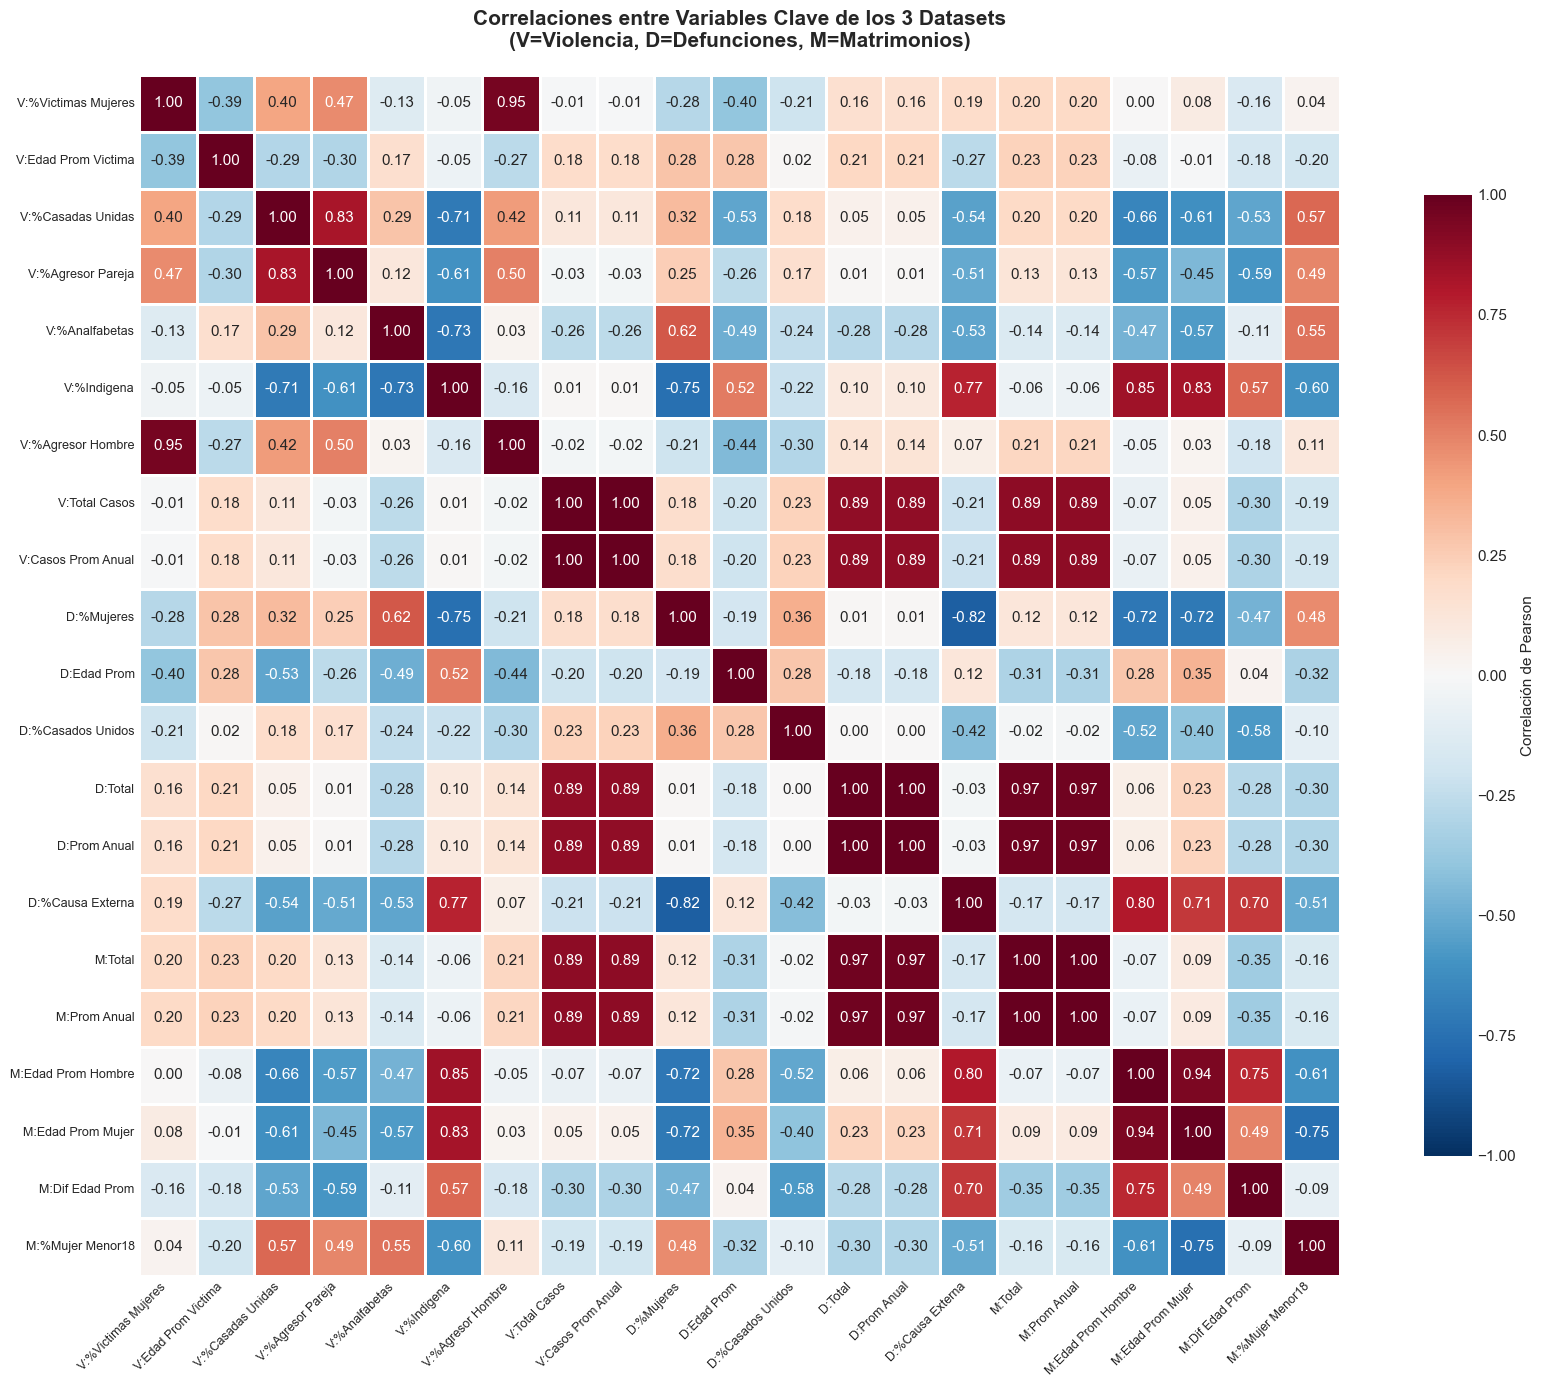


CORRELACIONES FUERTES ENTRE DATASETS (|r| > 0.6)
  📊 VIO_Pct_Victimas_Mujeres ↔ VIO_Pct_Agresor_Hombre: r = 0.954 (positiva) [INTRA-DATASET]
  📊 VIO_Pct_Casadas_Unidas ↔ VIO_Pct_Agresor_Pareja: r = 0.825 (positiva) [INTRA-DATASET]
  📊 VIO_Pct_Casadas_Unidas ↔ VIO_Pct_Indigena: r = -0.710 (negativa) [INTRA-DATASET]
  🔗 VIO_Pct_Casadas_Unidas ↔ MAT_Edad_Prom_Hombre: r = -0.662 (negativa) [INTER-DATASET]
  🔗 VIO_Pct_Casadas_Unidas ↔ MAT_Edad_Prom_Mujer: r = -0.611 (negativa) [INTER-DATASET]
  📊 VIO_Pct_Agresor_Pareja ↔ VIO_Pct_Indigena: r = -0.606 (negativa) [INTRA-DATASET]
  📊 VIO_Pct_Analfabetas ↔ VIO_Pct_Indigena: r = -0.726 (negativa) [INTRA-DATASET]
  🔗 VIO_Pct_Analfabetas ↔ DEF_Pct_Mujeres: r = 0.618 (positiva) [INTER-DATASET]
  🔗 VIO_Pct_Indigena ↔ DEF_Pct_Mujeres: r = -0.755 (negativa) [INTER-DATASET]
  🔗 VIO_Pct_Indigena ↔ DEF_Pct_Causa_Externa: r = 0.772 (positiva) [INTER-DATASET]
  🔗 VIO_Pct_Indigena ↔ MAT_Edad_Prom_Hombre: r = 0.849 (positiva) [INTER-DATASET]
  🔗 VIO_Pct_Indi

In [71]:
# ============================================================================
# F-Alt.2: CORRELACIONES ENTRE VARIABLES DE LOS 3 DATASETS
# ============================================================================
print("="*100)
print("F-Alt.2: ANÁLISIS DE CORRELACIONES ENTRE VARIABLES CLAVE")
print("="*100)

# Seleccionar solo columnas numéricas (sin 'Departamento')
cols_clustering = [c for c in df_perfil_depto.columns if c != 'Departamento']
correlaciones_alt = df_perfil_depto[cols_clustering].corr()

# Visualizar matriz de correlación con colores por dataset
fig, ax = plt.subplots(figsize=(18, 14))

# Crear etiquetas cortas
etiquetas_cortas = []
for col in cols_clustering:
    etiqueta = col.replace('VIO_', 'V:').replace('DEF_', 'D:').replace('MAT_', 'M:')
    etiqueta = etiqueta.replace('Pct_', '%').replace('Promedio', 'Prom').replace('_', ' ')
    etiquetas_cortas.append(etiqueta)

sns.heatmap(correlaciones_alt, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.8, 
            cbar_kws={'label': 'Correlación de Pearson', 'shrink': 0.8},
            vmin=-1, vmax=1,
            xticklabels=etiquetas_cortas,
            yticklabels=etiquetas_cortas)

ax.set_title('Correlaciones entre Variables Clave de los 3 Datasets\n(V=Violencia, D=Defunciones, M=Matrimonios)', 
             fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
guardar_figura("heatmap_correlaciones_sociodemograficas", "Heatmap de correlaciones entre variables sociodemograficas clave")
plt.show()

# Identificar correlaciones fuertes ENTRE datasets
print("\n" + "="*100)
print("CORRELACIONES FUERTES ENTRE DATASETS (|r| > 0.6)")
print("="*100)

umbral = 0.6
correlaciones_inter = []

for i in range(len(cols_clustering)):
    for j in range(i+1, len(cols_clustering)):
        col1 = cols_clustering[i]
        col2 = cols_clustering[j]
        corr = correlaciones_alt.iloc[i, j]
        
        # Determinar si es inter-dataset
        origen1 = col1.split('_')[0]
        origen2 = col2.split('_')[0]
        
        if abs(corr) > umbral:
            tipo = "INTER-DATASET" if origen1 != origen2 else "INTRA-DATASET"
            signo = "positiva" if corr > 0 else "negativa"
            correlaciones_inter.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Correlación': corr, 'Tipo': tipo
            })
            emoji = "🔗" if tipo == "INTER-DATASET" else "📊"
            print(f"  {emoji} {col1} ↔ {col2}: r = {corr:.3f} ({signo}) [{tipo}]")

if not correlaciones_inter:
    print("  No se encontraron correlaciones fuertes (|r| > 0.6)")
    print("  ✓ Las variables son complementarias, ideal para clustering")
else:
    inter = sum(1 for c in correlaciones_inter if c['Tipo'] == 'INTER-DATASET')
    intra = sum(1 for c in correlaciones_inter if c['Tipo'] == 'INTRA-DATASET')
    print(f"\n  Resumen: {inter} correlaciones inter-dataset, {intra} intra-dataset")

print("\n" + "="*100)
print("INTERPRETACIÓN:")
print("="*100)
print("Las correlaciones INTER-DATASET (🔗) son las más interesantes porque revelan")
print("conexiones entre fenómenos diferentes (matrimonios, violencia y defunciones).")
print("Las correlaciones INTRA-DATASET (📊) muestran redundancia dentro del mismo tema.")

## F-Alt.3 - Estandarización, Método del Codo y Coeficiente de Silueta

Estandarizamos las variables para que tengan la misma escala (media=0, desv=1), ya que las variables tienen unidades muy diferentes (porcentajes, conteos, edades).

Luego determinamos el **K óptimo** mediante:
1. **Método del Codo**: El punto donde la inercia deja de disminuir drásticamente
2. **Coeficiente de Silueta**: Mide qué tan bien definidos están los clusters (rango -1 a 1)

F-Alt.3: ESTANDARIZACIÓN Y DETERMINACIÓN DEL K ÓPTIMO

Datos estandarizados:
  Departamentos: 22
  Variables: 21
  Media global: -0.000000 (esperado ≈ 0)
  Std global: 1.000000 (esperado ≈ 1)

   K       Inercia     Silueta          Calidad
   2        332.46      0.2513    [MODERADA]
   3        217.40      0.2765    [MODERADA]
   4        177.66      0.2447    [BAJA]
   5        147.29      0.1889    [BAJA]
   6        124.73      0.1803    [BAJA]
   7        109.72      0.1582    [BAJA]
   8         89.16      0.1871    [BAJA]
   9         76.04      0.1642    [BAJA]
  10         68.74      0.1418    [BAJA]

RESULTADOS:
  Mejor K por Silueta: 3 (score = 0.2765)
  K sugerido por Codo: 4
Imagen guardada: 24_optimizacion_k_clustering.png - Optimizacion del numero de clusters K con metodo del codo y silhouette
Imagen guardada: 24_optimizacion_k_clustering.png - Optimizacion del numero de clusters K con metodo del codo y silhouette


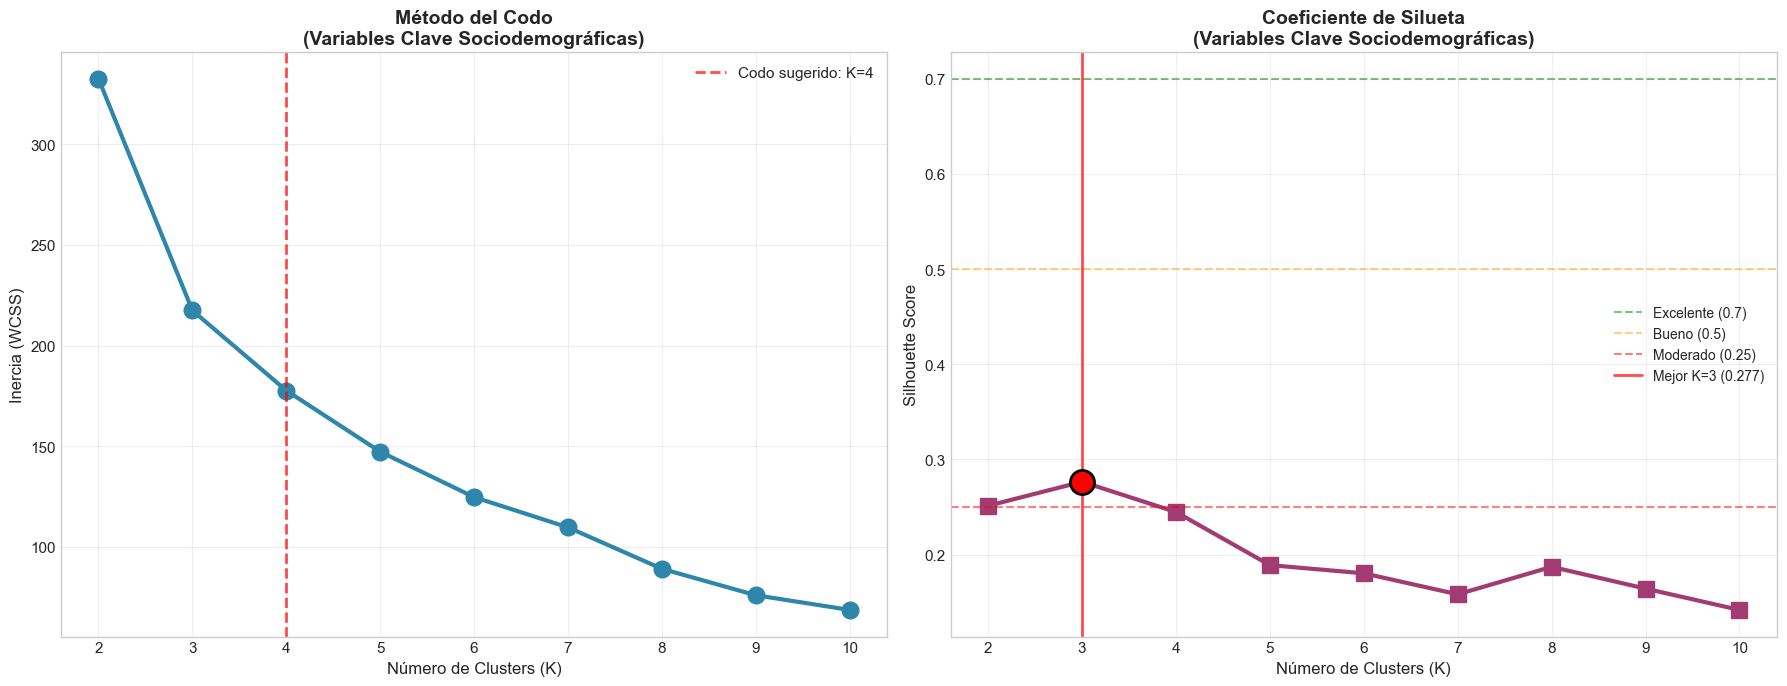


DECISIÓN: Se usará K = 3 clusters
Criterio: Mejor Silhouette Score = 0.2765


In [72]:
# ============================================================================
# F-Alt.3: ESTANDARIZACIÓN + MÉTODO DEL CODO + SILUETA
# ============================================================================
print("="*100)
print("F-Alt.3: ESTANDARIZACIÓN Y DETERMINACIÓN DEL K ÓPTIMO")
print("="*100)

# PASO 1: Estandarizar los datos
cols_features = [c for c in df_perfil_depto.columns if c != 'Departamento']
scaler_alt = StandardScaler()
datos_std_alt = scaler_alt.fit_transform(df_perfil_depto[cols_features])

print(f"\nDatos estandarizados:")
print(f"  Departamentos: {datos_std_alt.shape[0]}")
print(f"  Variables: {datos_std_alt.shape[1]}")
print(f"  Media global: {datos_std_alt.mean():.6f} (esperado ≈ 0)")
print(f"  Std global: {datos_std_alt.std():.6f} (esperado ≈ 1)")

# PASO 2: Método del Codo + Silueta simultáneamente
max_k_alt = min(10, len(df_perfil_depto) // 2)
rango_k_alt = range(2, max_k_alt + 1)
inercias_alt = []
siluetas_alt = []

print(f"\n{'='*80}")
print(f"{'K':>4s}  {'Inercia':>12s}  {'Silueta':>10s}  {'Calidad':>15s}")
print(f"{'='*80}")

for k in rango_k_alt:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels_temp = kmeans_temp.fit_predict(datos_std_alt)
    inercias_alt.append(kmeans_temp.inertia_)
    
    sil = silhouette_score(datos_std_alt, labels_temp)
    siluetas_alt.append(sil)
    
    if sil > 0.7:
        cal = "EXCELENTE"
    elif sil > 0.5:
        cal = "BUENA"
    elif sil > 0.25:
        cal = "MODERADA"
    else:
        cal = "BAJA"
    
    print(f"  {k:2d}    {kmeans_temp.inertia_:10.2f}    {sil:8.4f}    [{cal}]")

# Mejor K por Silueta
mejor_k_alt = list(rango_k_alt)[np.argmax(siluetas_alt)]
mejor_sil_alt = max(siluetas_alt)

# Codo por segunda derivada
diffs1 = np.diff(inercias_alt)
diffs2 = np.diff(diffs1)
if len(diffs2) > 0:
    idx_codo_alt = np.argmax(diffs2) + 2
    k_codo_alt = list(rango_k_alt)[idx_codo_alt] if idx_codo_alt < len(list(rango_k_alt)) else mejor_k_alt
else:
    k_codo_alt = mejor_k_alt

print(f"\n{'='*80}")
print(f"RESULTADOS:")
print(f"  Mejor K por Silueta: {mejor_k_alt} (score = {mejor_sil_alt:.4f})")
print(f"  K sugerido por Codo: {k_codo_alt}")
print(f"{'='*80}")

# VISUALIZACIÓN: Codo + Silueta lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Método del Codo
axes[0].plot(list(rango_k_alt), inercias_alt, marker='o', linewidth=3, markersize=12, color='#2E86AB')
axes[0].set_title('Método del Codo\n(Variables Clave Sociodemográficas)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inercia (WCSS)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(list(rango_k_alt))
axes[0].axvline(x=k_codo_alt, color='red', linestyle='--', alpha=0.7, linewidth=2,
                label=f'Codo sugerido: K={k_codo_alt}')
axes[0].legend(fontsize=11)

# Gráfico 2: Coeficiente de Silueta
axes[1].plot(list(rango_k_alt), siluetas_alt, marker='s', linewidth=3, markersize=12, color='#A23B72')
axes[1].set_title('Coeficiente de Silueta\n(Variables Clave Sociodemográficas)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(list(rango_k_alt))

# Líneas de referencia
axes[1].axhline(y=0.7, color='green', linestyle='--', alpha=0.5, linewidth=1.5, label='Excelente (0.7)')
axes[1].axhline(y=0.5, color='orange', linestyle='--', alpha=0.5, linewidth=1.5, label='Bueno (0.5)')
axes[1].axhline(y=0.25, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='Moderado (0.25)')
axes[1].axvline(x=mejor_k_alt, color='red', linestyle='-', linewidth=2, alpha=0.7,
                label=f'Mejor K={mejor_k_alt} ({mejor_sil_alt:.3f})')
axes[1].scatter([mejor_k_alt], [mejor_sil_alt], s=300, c='red', zorder=5, edgecolors='black', linewidth=2)
axes[1].legend(fontsize=10)

plt.tight_layout()
guardar_figura("optimizacion_k_clustering", "Optimizacion del numero de clusters K con metodo del codo y silhouette")
plt.show()

# Decisión final de K
k_final_alt = mejor_k_alt
print(f"\n{'='*80}")
print(f"DECISIÓN: Se usará K = {k_final_alt} clusters")
print(f"Criterio: Mejor Silhouette Score = {mejor_sil_alt:.4f}")
print(f"{'='*80}")

## F-Alt.4 - K-Means: Agrupamiento Final de Departamentos por Perfil Sociodemográfico

Aplicamos K-Means con el K óptimo para clasificar los 22 departamentos de Guatemala en grupos con perfiles similares, basándonos en las variables clave de **Violencia Intrafamiliar**, **Defunciones** y **Matrimonios**.

In [73]:
# ============================================================================
# F-Alt.4: K-MEANS FINAL - AGRUPAMIENTO POR PERFIL SOCIODEMOGRÁFICO
# ============================================================================
print("="*100)
print("F-Alt.4: K-MEANS - AGRUPAMIENTO FINAL POR PERFIL SOCIODEMOGRÁFICO")
print("="*100)

# Aplicar K-Means con K óptimo
kmeans_alt = KMeans(n_clusters=k_final_alt, random_state=42, n_init=20, max_iter=300)
df_perfil_depto['Cluster'] = kmeans_alt.fit_predict(datos_std_alt)

# Silhouette final
sil_final_alt = silhouette_score(datos_std_alt, df_perfil_depto['Cluster'])

print(f"\nK-Means aplicado con K = {k_final_alt}")
print(f"Silhouette Score final: {sil_final_alt:.4f}")

# ============================================================================
# DEPARTAMENTOS POR CLUSTER
# ============================================================================
print("\n" + "="*100)
print("DEPARTAMENTOS ASIGNADOS A CADA CLUSTER")
print("="*100)

colores_cluster = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C']

for i in range(k_final_alt):
    deptos_cluster = df_perfil_depto[df_perfil_depto['Cluster'] == i]
    nombres = deptos_cluster['Departamento'].tolist()
    print(f"\n🔹 CLUSTER {i} ({len(nombres)} departamentos):")
    for nombre in sorted(nombres):
        print(f"     • {nombre}")

# ============================================================================
# CARACTERÍSTICAS PROMEDIO POR CLUSTER
# ============================================================================
print("\n" + "="*100)
print("PERFIL PROMEDIO DE CADA CLUSTER")
print("="*100)

# Calcular promedios por cluster
perfiles_cluster = df_perfil_depto.groupby('Cluster')[cols_features].mean()

guardar_tabla(perfiles_cluster.round(2), "tabla_perfil_promedio_clusters", "Perfil promedio de cada cluster sociodemográfico")
display(perfiles_cluster.round(2))

# ============================================================================
# INTERPRETACIÓN AUTOMÁTICA DE CADA CLUSTER
# ============================================================================
print("\n" + "="*100)
print("INTERPRETACIÓN AUTOMÁTICA DE LOS CLUSTERS")
print("="*100)

# Calcular la media global para comparar
media_global = df_perfil_depto[cols_features].mean()

for cluster_id in range(k_final_alt):
    deptos = df_perfil_depto[df_perfil_depto['Cluster'] == cluster_id]['Departamento'].tolist()
    perfil = perfiles_cluster.loc[cluster_id]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}: {', '.join(sorted(deptos))}")
    print(f"{'='*80}")
    
    # Comparar cada variable con la media global
    caracteristicas_altas = []
    caracteristicas_bajas = []
    
    for col in cols_features:
        diff_pct = ((perfil[col] - media_global[col]) / media_global[col] * 100) if media_global[col] != 0 else 0
        
        if diff_pct > 15:  # >15% por encima de la media
            caracteristicas_altas.append((col, perfil[col], diff_pct))
        elif diff_pct < -15:  # >15% por debajo de la media
            caracteristicas_bajas.append((col, perfil[col], diff_pct))
    
    if caracteristicas_altas:
        print("\n  VARIABLES POR ENCIMA de la media nacional:")
        for col, val, diff in sorted(caracteristicas_altas, key=lambda x: -x[2]):
            print(f"     • {col}: {val:.2f} (+{diff:.1f}% vs media)")
    
    if caracteristicas_bajas:
        print("\n  VARIABLES POR DEBAJO de la media nacional:")
        for col, val, diff in sorted(caracteristicas_bajas, key=lambda x: x[2]):
            print(f"     • {col}: {val:.2f} ({diff:.1f}% vs media)")
    
    if not caracteristicas_altas and not caracteristicas_bajas:
        print("\n  ≈ Departamentos cercanos a la media nacional en todas las variables")

# ============================================================================
# DISTRIBUCIÓN DE DEPARTAMENTOS POR CLUSTER
# ============================================================================
print("\n" + "="*100)
print("DISTRIBUCIÓN DE DEPARTAMENTOS POR CLUSTER")
print("="*100)

conteo_alt = df_perfil_depto['Cluster'].value_counts().sort_index()
for cl, cnt in conteo_alt.items():
    pct = cnt / len(df_perfil_depto) * 100
    barra = "█" * int(pct / 2)
    print(f"  Cluster {cl}: {cnt:2d} departamentos ({pct:5.1f}%) {barra}")

F-Alt.4: K-MEANS - AGRUPAMIENTO FINAL POR PERFIL SOCIODEMOGRÁFICO

K-Means aplicado con K = 3
Silhouette Score final: 0.2765

DEPARTAMENTOS ASIGNADOS A CADA CLUSTER

🔹 CLUSTER 0 (11 departamentos):
     • Alta Verapaz
     • Baja Verapaz
     • Chimaltenango
     • Huehuetenango
     • Quetzaltenango
     • Quiché
     • Sacatepéquez
     • San Marcos
     • Sololá
     • Suchitepéquez
     • Totonicapán

🔹 CLUSTER 1 (10 departamentos):
     • Chiquimula
     • El Progreso
     • Escuintla
     • Izabal
     • Jalapa
     • Jutiapa
     • Petén
     • Retalhuleu
     • Santa Rosa
     • Zacapa

🔹 CLUSTER 2 (1 departamentos):
     • Guatemala

PERFIL PROMEDIO DE CADA CLUSTER
Tabla guardada: 25_tabla_tabla_perfil_promedio_clusters.png - Perfil promedio de cada cluster sociodemográfico


,VIO_Pct_Victimas_Mujeres,VIO_Edad_Promedio_Victima,VIO_Pct_Casadas_Unidas,VIO_Pct_Agresor_Pareja,VIO_Pct_Analfabetas,VIO_Pct_Indigena,VIO_Pct_Agresor_Hombre,VIO_Total_Casos,VIO_Casos_Promedio_Anual,DEF_Pct_Mujeres,DEF_Edad_Promedio,DEF_Pct_Casados_Unidos,DEF_Total,DEF_Promedio_Anual,DEF_Pct_Causa_Externa,MAT_Total,MAT_Promedio_Anual,MAT_Edad_Prom_Hombre,MAT_Edad_Prom_Mujer,MAT_Dif_Edad_Promedio,MAT_Pct_Mujer_Menor18
Cluster,,,,,,,,,,,,,,,,,,,,,
0,89.87,32.78,73.70,68.92,25.55,31.23,88.03,18599.73,1549.98,45.40,53.53,37.54,39223.00,3268.58,11.15,36110.73,3611.07,28.07,25.29,2.78,8.80
1,89.37,32.30,61.32,60.22,16.60,80.60,86.65,11210.20,934.18,41.81,55.89,34.74,24905.70,2075.48,18.99,18675.00,1867.50,30.92,27.20,3.73,6.32
2,90.18,33.59,62.22,60.83,5.23,82.70,87.53,70558.00,5879.83,43.41,54.51,37.86,283260.00,23605.00,16.15,152114.00,15211.40,30.43,27.91,2.52,3.23



INTERPRETACIÓN AUTOMÁTICA DE LOS CLUSTERS

CLUSTER 0: Alta Verapaz, Baja Verapaz, Chimaltenango, Huehuetenango, Quetzaltenango, Quiché, Sacatepéquez, San Marcos, Sololá, Suchitepéquez, Totonicapán

  VARIABLES POR ENCIMA de la media nacional:
     • VIO_Pct_Analfabetas: 25.55 (+24.3% vs media)
     • MAT_Pct_Mujer_Menor18: 8.80 (+18.6% vs media)

  VARIABLES POR DEBAJO de la media nacional:
     • VIO_Pct_Indigena: 31.23 (-44.2% vs media)
     • DEF_Pct_Causa_Externa: 11.15 (-25.4% vs media)

CLUSTER 1: Chiquimula, El Progreso, Escuintla, Izabal, Jalapa, Jutiapa, Petén, Retalhuleu, Santa Rosa, Zacapa

  VARIABLES POR ENCIMA de la media nacional:
     • VIO_Pct_Indigena: 80.60 (+43.9% vs media)
     • DEF_Pct_Causa_Externa: 18.99 (+27.1% vs media)
     • MAT_Dif_Edad_Promedio: 3.73 (+16.6% vs media)

  VARIABLES POR DEBAJO de la media nacional:
     • MAT_Total: 18675.00 (-44.2% vs media)
     • MAT_Promedio_Anual: 1867.50 (-44.2% vs media)
     • DEF_Promedio_Anual: 2075.47 (-43.1% vs

F-Alt.5: VISUALIZACIÓN DE CLUSTERS

Varianza explicada por PCA:
  - PC1: 32.40%
  - PC2: 28.64%
  - Total 2D: 61.04%
Imagen guardada: 26_clustering_pca_radar_sociodemografico.png - Clustering PCA y graficos radar de perfiles sociodemograficos
Imagen guardada: 26_clustering_pca_radar_sociodemografico.png - Clustering PCA y graficos radar de perfiles sociodemograficos


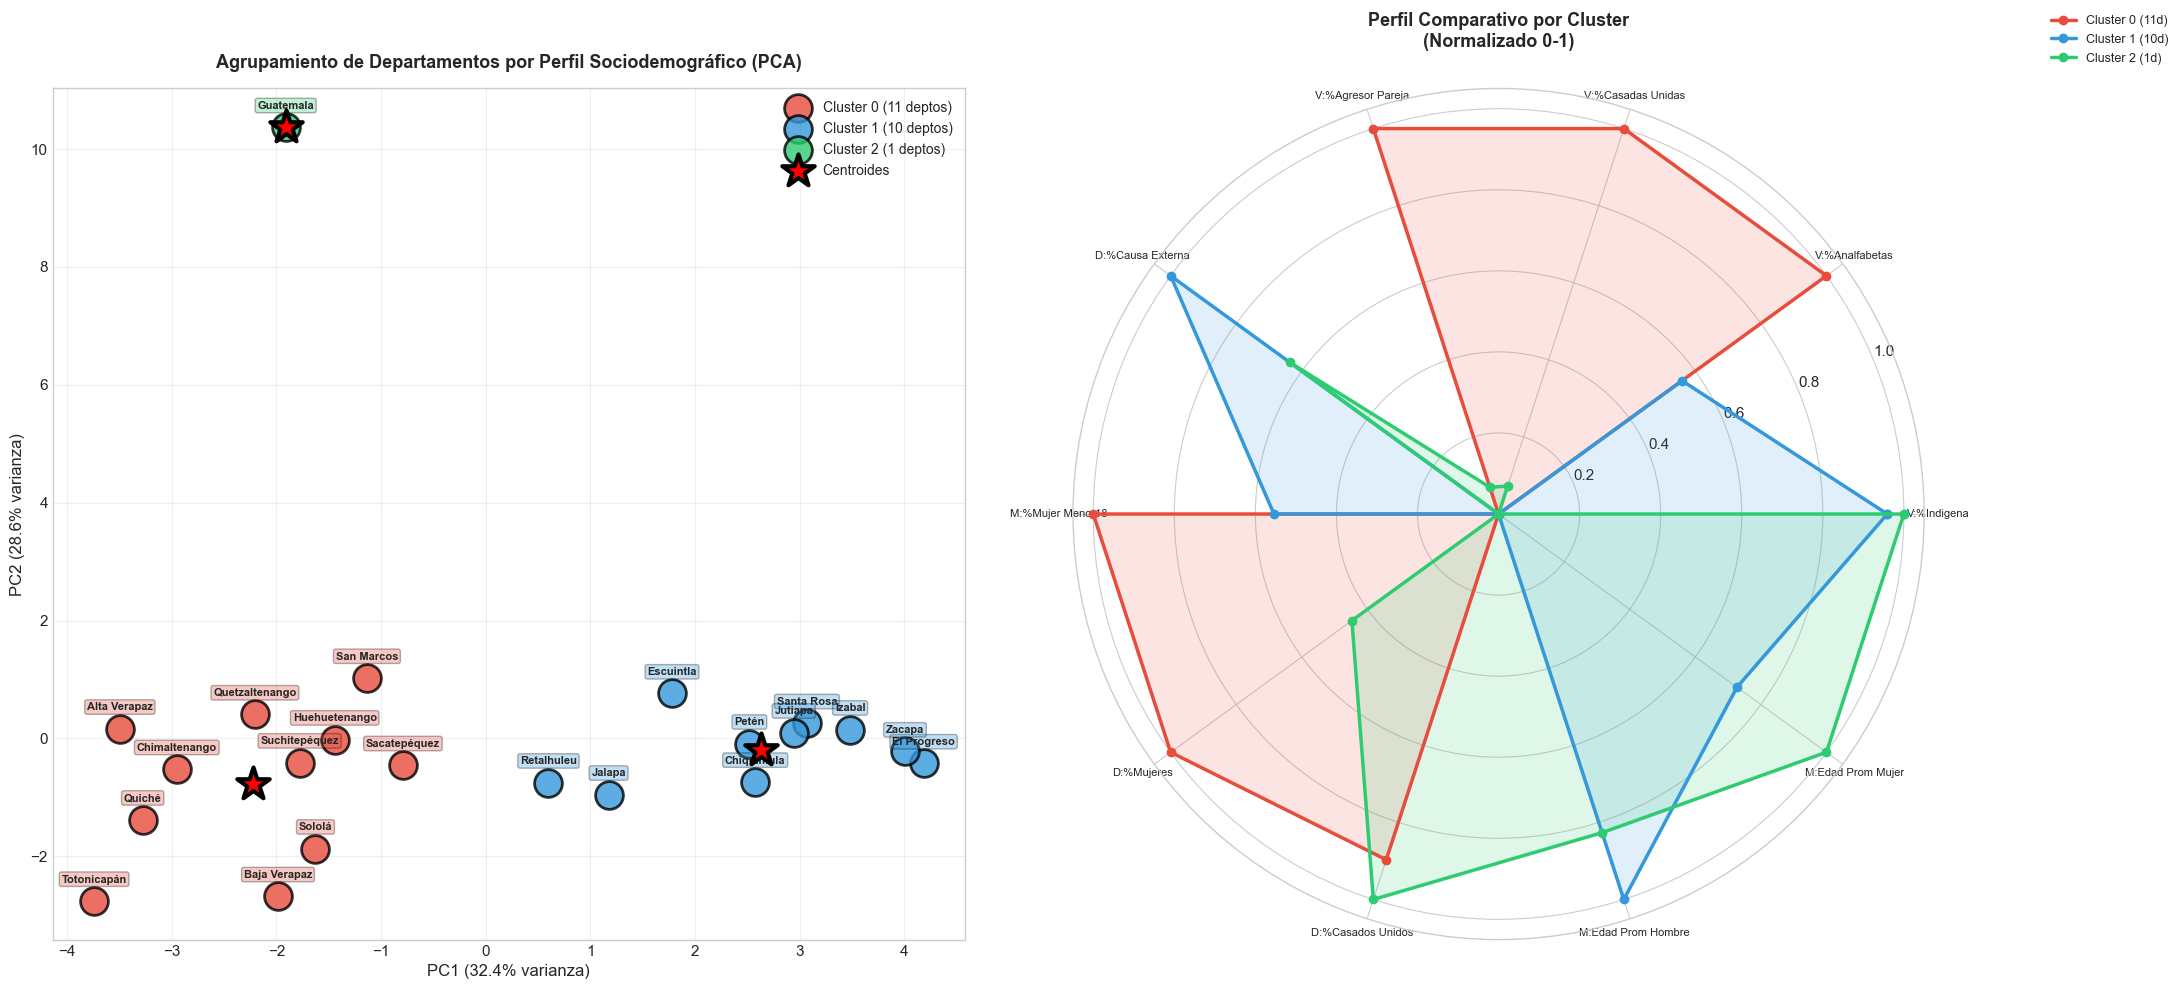


INTERPRETACIÓN:
  - En el PCA: Departamentos cercanos tienen perfiles sociodemográficos similares
  - En el Radar: Cada línea muestra el perfil de un cluster en las variables clave
  - Los clusters revelan grupos de departamentos con combinaciones similares de:
    → Características de víctimas de violencia
    → Patrones de defunción
    → Características de matrimonios


In [74]:
# ============================================================================
# F-5: VISUALIZACIÓN PCA + RADAR CHART
# ============================================================================
print("="*100)
print("F-Alt.5: VISUALIZACIÓN DE CLUSTERS")
print("="*100)

# --- GRÁFICO 1: PCA 2D ---
pca_alt = PCA(n_components=2)
datos_pca_alt = pca_alt.fit_transform(datos_std_alt)

print(f"\nVarianza explicada por PCA:")
print(f"  - PC1: {pca_alt.explained_variance_ratio_[0]*100:.2f}%")
print(f"  - PC2: {pca_alt.explained_variance_ratio_[1]*100:.2f}%")
print(f"  - Total 2D: {sum(pca_alt.explained_variance_ratio_)*100:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# PCA Scatter Plot
colores_map = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C',
               '#E67E22', '#16A085', '#8E44AD', '#2C3E50']

for i in range(k_final_alt):
    mask = df_perfil_depto['Cluster'] == i
    deptos_nombres = df_perfil_depto.loc[mask, 'Departamento'].values
    color = colores_map[i % len(colores_map)]
    
    axes[0].scatter(datos_pca_alt[mask, 0], datos_pca_alt[mask, 1],
                   c=color, s=400, alpha=0.8, edgecolors='black', linewidth=2,
                   label=f'Cluster {i} ({sum(mask)} deptos)', zorder=3)
    
    # Etiquetar cada departamento
    for j, (x, y) in enumerate(zip(datos_pca_alt[mask, 0], datos_pca_alt[mask, 1])):
        nombre = deptos_nombres[j] if j < len(deptos_nombres) else ''
        axes[0].annotate(nombre, (x, y), fontsize=8, fontweight='bold',
                        ha='center', va='bottom', xytext=(0, 12),
                        textcoords='offset points',
                        bbox=dict(boxstyle='round,pad=0.2', facecolor=color, alpha=0.3))

# Marcar centroides
centroides_pca_alt = pca_alt.transform(kmeans_alt.cluster_centers_)
axes[0].scatter(centroides_pca_alt[:, 0], centroides_pca_alt[:, 1],
               c='red', s=600, marker='*', edgecolors='black', linewidth=3,
               label='Centroides', zorder=5)

axes[0].set_title('Agrupamiento de Departamentos por Perfil Sociodemográfico (PCA)',
                  fontsize=13, fontweight='bold', pad=15)
axes[0].set_xlabel(f'PC1 ({pca_alt.explained_variance_ratio_[0]*100:.1f}% varianza)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca_alt.explained_variance_ratio_[1]*100:.1f}% varianza)', fontsize=12)
axes[0].legend(fontsize=10, loc='best')
axes[0].grid(True, alpha=0.3)

# --- GRÁFICO 2: RADAR CHART (comparación de perfiles por cluster) ---
# Seleccionar variables más representativas para el radar
vars_radar = [c for c in cols_features if 'Total' not in c and 'Promedio_Anual' not in c]
if len(vars_radar) > 10:
    # Seleccionar las 10 más relevantes (con mayor varianza entre clusters)
    varianza_inter = perfiles_cluster[vars_radar].var()
    vars_radar = varianza_inter.nlargest(10).index.tolist()

n_vars = len(vars_radar)
angles = np.linspace(0, 2 * np.pi, n_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el polígono

# Normalizar los perfiles para el radar (escala 0-1)
perfiles_norm = perfiles_cluster[vars_radar].copy()
for col in vars_radar:
    col_min = perfiles_norm[col].min()
    col_max = perfiles_norm[col].max()
    if col_max > col_min:
        perfiles_norm[col] = (perfiles_norm[col] - col_min) / (col_max - col_min)
    else:
        perfiles_norm[col] = 0.5

ax_radar = axes[1]
ax_radar.remove()
ax_radar = fig.add_subplot(122, polar=True)

# Dibujar radar para cada cluster
for cluster_id in range(k_final_alt):
    valores = perfiles_norm.loc[cluster_id, vars_radar].values.tolist()
    valores += valores[:1]  # Cerrar
    color = colores_map[cluster_id % len(colores_map)]
    n_deptos = sum(df_perfil_depto['Cluster'] == cluster_id)
    
    ax_radar.plot(angles, valores, 'o-', linewidth=2.5, label=f'Cluster {cluster_id} ({n_deptos}d)',
                 color=color, markersize=6)
    ax_radar.fill(angles, valores, alpha=0.15, color=color)

# Etiquetas del radar
etiquetas_radar = [v.replace('VIO_', 'V:').replace('DEF_', 'D:').replace('MAT_', 'M:')
                   .replace('Pct_', '%').replace('_', ' ') for v in vars_radar]
ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(etiquetas_radar, fontsize=8)
ax_radar.set_title('Perfil Comparativo por Cluster\n(Normalizado 0-1)', 
                   fontsize=13, fontweight='bold', pad=30)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)

plt.tight_layout()
guardar_figura("clustering_pca_radar_sociodemografico", "Clustering PCA y graficos radar de perfiles sociodemograficos")
plt.show()

print("\nINTERPRETACIÓN:")
print("  - En el PCA: Departamentos cercanos tienen perfiles sociodemográficos similares")
print("  - En el Radar: Cada línea muestra el perfil de un cluster en las variables clave")
print("  - Los clusters revelan grupos de departamentos con combinaciones similares de:")
print("    → Características de víctimas de violencia")
print("    → Patrones de defunción")
print("    → Características de matrimonios")

F-Alt.6: IMPORTANCIA DE VARIABLES EN EL CLUSTERING

1. CONTRIBUCIÓN DE CADA VARIABLE A LOS COMPONENTES PRINCIPALES:
--------------------------------------------------------------------------------

Variable                                       PC1       PC2   Importancia
----------------------------------------------------------------------
  MAT_Edad_Prom_Hombre                      0.337    0.137    8.1% ████████
  VIO_Pct_Indigena                          0.331    0.158    8.0% ███████
  DEF_Pct_Causa_Externa                     0.322    0.083    7.7% ███████
  MAT_Edad_Prom_Mujer                       0.300    0.199    7.2% ███████
  VIO_Pct_Casadas_Unidas                   -0.297   -0.068    7.2% ███████
  MAT_Dif_Edad_Promedio                     0.290   -0.037    7.0% ██████
  DEF_Pct_Mujeres                          -0.281   -0.092    6.8% ██████
  VIO_Pct_Agresor_Pareja                   -0.253   -0.077    6.1% ██████
  MAT_Pct_Mujer_Menor18                    -0.210   -0.215

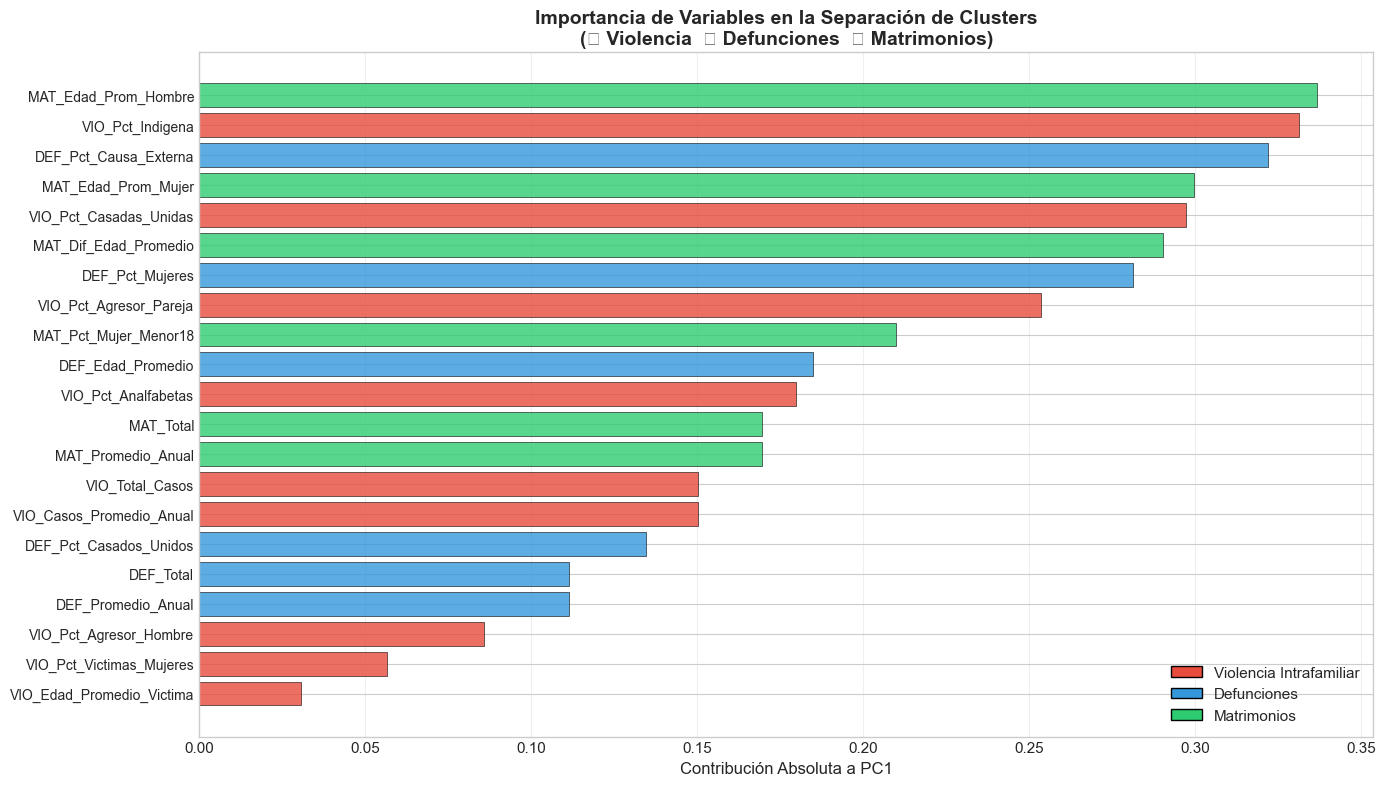


CONCLUSIONES DEL CLUSTERING POR VARIABLES CLAVE SOCIODEMOGRÁFICAS

RESUMEN DEL ANÁLISIS:
  • Se identificaron 3 clusters de departamentos con perfiles similares
  • Se usaron 21 variables clave de 3 datasets:
    - Violencia Intrafamiliar: perfil de víctimas y agresores
    - Defunciones: características demográficas de fallecidos
    - Matrimonios: edades y características de contrayentes
  • Silhouette Score: 0.2765
  • Varianza explicada por PCA (2D): 61.0%


UTILIDAD PRÁCTICA:
  • Identificar departamentos con necesidades similares para políticas públicas
  • Detectar patrones de riesgo que conectan violencia, defunciones y matrimonios
  • Focalizar intervenciones según el perfil sociodemográfico de cada grupo

RESUMEN COMPACTO:
--------------------------------------------------------------------------------

  Cluster 0: Alta Verapaz, Baja Verapaz, Chimaltenango, Huehuetenango, Quetzaltenango, Quiché, Sacatepéquez, San Marcos, Sololá, Suchitepéquez, Totonicapán

  Cluster 1: Chiq

In [75]:
# ============================================================================
# IMPORTANCIA DE VARIABLES + CONCLUSIONES
# ============================================================================
print("="*100)
print("F-Alt.6: IMPORTANCIA DE VARIABLES EN EL CLUSTERING")
print("="*100)

# Analizar qué variables contribuyen más a la separación de clusters
# Usando los componentes de PCA
print("\n1. CONTRIBUCIÓN DE CADA VARIABLE A LOS COMPONENTES PRINCIPALES:")
print("-"*80)

loadings = pd.DataFrame(
    pca_alt.components_.T,
    columns=['PC1', 'PC2'],
    index=cols_features
)

# Ordenar por contribución absoluta a PC1
loadings['Abs_PC1'] = loadings['PC1'].abs()
loadings_sorted = loadings.sort_values('Abs_PC1', ascending=False)

print(f"\n{'Variable':<40s}  {'PC1':>8s}  {'PC2':>8s}  {'Importancia':>12s}")
print(f"{'-'*70}")
for idx, row in loadings_sorted.iterrows():
    importancia = (row['Abs_PC1'] / loadings['Abs_PC1'].sum()) * 100
    barra = "█" * int(importancia)
    print(f"  {idx:<38s}  {row['PC1']:>7.3f}  {row['PC2']:>7.3f}  {importancia:>5.1f}% {barra}")

# Visualizar importancia
fig, ax = plt.subplots(figsize=(14, 8))

# Barplot horizontal de contribución a PC1 (ordena por importancia)
colores_barras = []
for col in loadings_sorted.index:
    if col.startswith('VIO_'):
        colores_barras.append('#E74C3C')  # Rojo para violencia
    elif col.startswith('DEF_'):
        colores_barras.append('#3498DB')  # Azul para defunciones
    elif col.startswith('MAT_'):
        colores_barras.append('#2ECC71')  # Verde para matrimonios
    else:
        colores_barras.append('#95A5A6')

ax.barh(range(len(loadings_sorted)), loadings_sorted['Abs_PC1'], 
        color=colores_barras, edgecolor='black', linewidth=0.5, alpha=0.8)

ax.set_yticks(range(len(loadings_sorted)))
ax.set_yticklabels(loadings_sorted.index, fontsize=10)
ax.set_xlabel('Contribución Absoluta a PC1', fontsize=12)
ax.set_title('Importancia de Variables en la Separación de Clusters\n(🔴 Violencia  🔵 Defunciones  🟢 Matrimonios)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

# Leyenda manual
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#E74C3C', edgecolor='black', label='Violencia Intrafamiliar'),
    Patch(facecolor='#3498DB', edgecolor='black', label='Defunciones'),
    Patch(facecolor='#2ECC71', edgecolor='black', label='Matrimonios')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11)

plt.tight_layout()
guardar_figura("importancia_variables_clustering", "Importancia de variables en clustering sociodemografico")
plt.show()

# ============================================================================
# CONCLUSIONES FINALES
# ============================================================================
print("\n" + "="*100)
print("CONCLUSIONES DEL CLUSTERING POR VARIABLES CLAVE SOCIODEMOGRÁFICAS")
print("="*100)

print(f"""
RESUMEN DEL ANÁLISIS:
  • Se identificaron {k_final_alt} clusters de departamentos con perfiles similares
  • Se usaron {len(cols_features)} variables clave de 3 datasets:
    - Violencia Intrafamiliar: perfil de víctimas y agresores
    - Defunciones: características demográficas de fallecidos
    - Matrimonios: edades y características de contrayentes
  • Silhouette Score: {sil_final_alt:.4f}
  • Varianza explicada por PCA (2D): {sum(pca_alt.explained_variance_ratio_)*100:.1f}%


UTILIDAD PRÁCTICA:
  • Identificar departamentos con necesidades similares para políticas públicas
  • Detectar patrones de riesgo que conectan violencia, defunciones y matrimonios
  • Focalizar intervenciones según el perfil sociodemográfico de cada grupo
""")

# Resumen compacto por cluster
print("RESUMEN COMPACTO:")
print("-"*80)
for cl in range(k_final_alt):
    deptos = sorted(df_perfil_depto[df_perfil_depto['Cluster'] == cl]['Departamento'].tolist())
    print(f"\n  Cluster {cl}: {', '.join(deptos)}")